In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [141]:
df = pd.read_excel("E:\Pandas\\flight_price.xlsx")

In [142]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [144]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [145]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [146]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [147]:
df.drop('Route',axis=1,inplace=True)

In [148]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [149]:
df['Dep_Hours'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_Minutes'] = df['Dep_Time'].str.split(':').str[1].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [150]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hours,Dep_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,16,50


In [151]:
df['Arrival_Hours'] = df['Arrival_Time'].str.split(" ").str[0].str.split(":").str[0].astype(int)
df['Arrival_Minutes'] = df['Arrival_Time'].str.split(" ").str[0].str.split(":").str[1].astype(int)
df.drop("Arrival_Time",axis=1,inplace=True)

In [152]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,No info,13302,16,50,21,35


In [153]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [154]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [155]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [156]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,0,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1,No info,13302,16,50,21,35


In [157]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Duration           object
Total_Stops         int64
Additional_Info    object
Price               int64
Dep_Hours           int32
Dep_Minutes         int32
Arrival_Hours       int32
Arrival_Minutes     int32
dtype: object

In [158]:
df['Total_Stops'].value_counts()

Total_Stops
1    5626
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [159]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Duration           object
Total_Stops         int64
Additional_Info    object
Price               int64
Dep_Hours           int32
Dep_Minutes         int32
Arrival_Hours       int32
Arrival_Minutes     int32
dtype: object

In [160]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,0,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2,No info,7662,5,50,13,15


In [161]:
df['day'] = df['Date_of_Journey'].str.split("/").str[0].astype(int)
df['month'] = df['Date_of_Journey'].str.split("/").str[1].astype(int)
df['year'] = df['Date_of_Journey'].str.split("/").str[2].astype(int)
df.drop('Date_of_Journey',axis=1,inplace=True)

In [162]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,day,month,year
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,22,20,1,10,24,3,2019
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,5,50,13,15,1,5,2019
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,25,4,25,9,6,2019
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,18,5,23,30,12,5,2019
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,16,50,21,35,1,3,2019


In [163]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [164]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [165]:
from sklearn.preprocessing import OneHotEncoder

In [166]:
encoder = OneHotEncoder()

In [167]:
df = pd.concat([df,pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination','Additional_Info']]).toarray(),columns=encoder.get_feature_names_out())],axis=1)

In [168]:
df.drop(df[['Airline','Source','Destination','Additional_Info']],axis=1,inplace=True)

In [169]:
df.head()

,Duration,Total_Stops,Price,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,day,month,year,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,2h 50m,0,3897,22,20,1,10,24,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7h 25m,2,7662,5,50,13,15,1,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,19h,2,13882,9,25,4,25,9,6,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5h 25m,1,6218,18,5,23,30,12,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4h 45m,1,13302,16,50,21,35,1,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [170]:
df.dtypes

Duration                                         object
Total_Stops                                       int64
Price                                             int64
Dep_Hours                                         int32
Dep_Minutes                                       int32
Arrival_Hours                                     int32
Arrival_Minutes                                   int32
day                                               int32
month                                             int32
year                                              int32
Airline_Air Asia                                float64
Airline_Air India                               float64
Airline_GoAir                                   float64
Airline_IndiGo                                  float64
Airline_Jet Airways                             float64
Airline_Jet Airways Business                    float64
Airline_Multiple carriers                       float64
Airline_Multiple carriers Premium economy       

In [188]:
df[df['Duration'].str.split(" ").str[0].str.split('h').str[0]!=str.isnumeric]

,Duration,Total_Stops,Price,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,day,month,year,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,2h 50m,0,3897,22,20,1,10,24,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7h 25m,2,7662,5,50,13,15,1,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,19h,2,13882,9,25,4,25,9,6,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5h 25m,1,6218,18,5,23,30,12,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4h 45m,1,13302,16,50,21,35,1,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,19,55,22,25,9,4,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,2h 35m,0,4145,20,45,23,20,27,4,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,3h,0,7229,8,20,11,20,27,4,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,2h 40m,0,12648,11,30,14,10,1,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [205]:
df['Duration'].str.split(' ').str[0].str.split("h").str[0].str.isnumeric().sum()

10682

In [196]:
df['Duration'].str.isnumeric().sum()

0

In [203]:
df

,Duration,Total_Stops,Price,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,day,month,year,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,2h 50m,0,3897,22,20,1,10,24,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7h 25m,2,7662,5,50,13,15,1,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,19h,2,13882,9,25,4,25,9,6,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5h 25m,1,6218,18,5,23,30,12,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4h 45m,1,13302,16,50,21,35,1,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,19,55,22,25,9,4,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10679,2h 35m,0,4145,20,45,23,20,27,4,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10680,3h,0,7229,8,20,11,20,27,4,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10681,2h 40m,0,12648,11,30,14,10,1,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [209]:
df['Duration'].str.split(" ").str[0].str.split('h').str[0].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [210]:
df[df['Duration']=='5m']

,Duration,Total_Stops,Price,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,day,month,year,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
6474,5m,2,17327,16,50,16,55,6,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [213]:
df.drop(df.index[6474],inplace=True)

In [216]:
df['Duration_Hours'] = df['Duration'].str.split(" ").str[0].str.split('h').str[0].astype(int)


In [227]:
df['Duration_Minutes'] = df['Duration'].str.split(' ').str[1].str.split("m").str[0].fillna(0).astype(int)

In [228]:
df.drop(df['Duration'],axis=1,inplace=True)

KeyError: "['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', '3h', '1h 25m', '16h 35m', '12h 20m', '12h 15m', '7h 30m', '24h', '2h 45m', '8h 55m', '7h 10m', '14h 30m', '30h 20m', '19h 55m', '15h', '2h 55m', '12h 45m', '10h 10m', '5h 55m', '15h 25m', '16h 5m', '10h 10m', '2h 40m', '11h 55m', '2h 40m', '1h 25m', '14h 5m', '20h 15m', '2h 25m', '23h 10m', '18h 10m', '16h', '2h 50m', '2h 20m', '8h', '16h 55m', '3h 10m', '2h 45m', '14h', '23h 50m', '21h 40m', '21h 15m', '2h 45m', '10h 50m', '8h', '8h 15m', '5h 25m', '8h 35m', '11h 50m', '27h 35m', '8h 25m', '20h 55m', '4h 50m', '8h 10m', '2h 20m', '24h 25m', '2h 50m', '12h 20m', '12h 15m', '23h 35m', '16h 35m', '2h 50m', '25h 45m', '26h 10m', '28h 50m', '2h 45m', '25h 15m', '9h 20m', '4h 30m', '15h 25m', '1h 30m', '2h 40m', '9h 10m', '2h 45m', '22h 35m', '3h 5m', '11h 30m', '9h 30m', '12h 10m', '17h 35m', '5h 5m', '25h 50m', '20h', '13h', '18h 25m', '1h 30m', '9h 30m', '16h', '2h 20m', '4h 30m', '5h 45m', '24h 10m', '2h 35m', '2h 45m', '4h 55m', '25h 35m', '6h 20m', '3h 5m', '18h 40m', '2h 15m', '12h 10m', '19h 25m', '2h 50m', '8h 25m', '9h 15m', '2h 50m', '3h 15m', '2h 50m', '12h 20m', '2h 55m', '9h 35m', '2h 35m', '9h 30m', '29h 20m', '2h 55m', '5h 15m', '9h 5m', '10h 45m', '4h 55m', '1h 30m', '11h 40m', '2h 45m', '2h 55m', '10h', '2h 45m', '10h 15m', '1h 25m', '9h 15m', '22h 55m', '28h 50m', '37h 25m', '2h 50m', '1h 30m', '1h 30m', '25h 40m', '2h 35m', '6h 15m', '17h 30m', '5h 45m', '2h 35m', '25h 30m', '13h 55m', '2h 55m', '10h 15m', '8h 40m', '5h 30m', '12h', '2h 15m', '2h 15m', '2h 50m', '9h 10m', '10h 25m', '2h 20m', '4h 30m', '3h 10m', '23h 30m', '27h 20m', '12h 35m', '24h 15m', '1h 20m', '2h 45m', '3h', '11h', '13h 30m', '2h 50m', '2h 55m', '2h 45m', '11h 15m', '14h 35m', '13h 55m', '14h 5m', '15h 5m', '2h 15m', '15h', '12h 55m', '9h', '12h 15m', '7h 40m', '27h 20m', '1h 25m', '1h 20m', '5h 30m', '11h 45m', '3h 15m', '24h 55m', '27h 20m', '2h 55m', '17h 5m', '2h 40m', '8h', '3h', '27h 35m', '7h 30m', '22h 55m', '8h 35m', '29h 55m', '22h 15m', '1h 20m', '2h 40m', '3h', '12h 10m', '2h 35m', '11h 45m', '2h 35m', '1h 30m', '2h 40m', '2h 35m', '22h 55m', '14h 40m', '15h 25m', '7h 15m', '20h 10m', '20h 45m', '2h 30m', '23h 50m', '27h', '5h 30m', '11h 50m', '2h 15m', '24h 30m', '2h 20m', '6h 30m', '20h 25m', '2h 35m', '2h 55m', '5h 35m', '2h 30m', '14h 45m', '12h 20m', '25h 30m', '5h 35m', '11h 45m', '2h 55m', '5h 40m', '4h 5m', '8h', '2h 45m', '2h 40m', '2h 55m', '15h 55m', '23h 10m', '7h 20m', '2h 50m', '7h 30m', '3h', '7h 45m', '25h 20m', '10h 25m', '30h 20m', '2h 35m', '9h', '15h 10m', '28h 20m', '3h', '2h 45m', '4h 55m', '2h 40m', '22h 10m', '10h 10m', '2h 50m', '4h 20m', '11h', '3h', '22h 35m', '3h 5m', '2h 40m', '2h 50m', '21h 5m', '11h 50m', '25h 35m', '15h 25m', '2h 25m', '3h 40m', '2h 55m', '3h 10m', '11h 50m', '2h 50m', '2h 50m', '1h 30m', '11h 30m', '8h 50m', '20h 15m', '20h 10m', '16h 5m', '12h 35m', '17h 5m', '3h', '15h 30m', '11h 30m', '2h 20m', '23h 45m', '1h 30m', '2h 35m', '24h 45m', '21h 35m', '5h 30m', '12h 15m', '8h 5m', '5h', '2h 50m', '6h 25m', '2h 20m', '2h 45m', '12h 45m', '15h 50m', '27h', '26h 25m', '2h 55m', '24h 50m', '8h 40m', '25h 45m', '2h 50m', '6h 15m', '10h 30m', '26h', '17h 5m', '21h 20m', '5h 35m', '2h 50m', '25h 50m', '12h 10m', '17h 5m', '8h 30m', '23h 5m', '9h 20m', '7h 55m', '1h 30m', '2h 50m', '2h 15m', '10h', '2h 35m', '7h 45m', '2h 55m', '26h 20m', '2h 40m', '11h', '19h 25m', '2h 55m', '2h 45m', '23h 15m', '9h', '3h 10m', '6h 25m', '8h 40m', '2h 50m', '12h 20m', '5h 20m', '4h', '9h 45m', '2h 55m', '26h 20m', '2h 15m', '9h 45m', '24h 55m', '11h 55m', '8h 20m', '17h 25m', '2h 50m', '7h 5m', '21h 15m', '5h', '2h 25m', '5h 15m', '15h 10m', '11h 45m', '3h', '4h 55m', '2h 45m', '2h 30m', '9h 45m', '2h 40m', '6h 30m', '5h 30m', '2h 40m', '34h 5m', '15h 25m', '9h 30m', '6h 5m', '2h 40m', '5h 50m', '2h 45m', '27h 20m', '3h', '5h 15m', '16h', '7h', '8h 40m', '9h', '2h 20m', '2h 20m', '6h 20m', '4h 25m', '2h 20m', '11h 5m', '16h 55m', '13h 45m', '25h 45m', '13h 55m', '5h 15m', '19h 15m', '7h 30m', '9h', '24h', '18h 10m', '2h 55m', '1h 30m', '21h 20m', '6h 15m', '14h 30m', '1h 20m', '12h 55m', '2h 25m', '22h 30m', '22h 55m', '5h 25m', '1h 25m', '7h 15m', '12h 20m', '20h 10m', '21h 15m', '2h 15m', '10h 30m', '14h 5m', '2h 50m', '16h 25m', '5h 15m', '13h 50m', '2h 15m', '7h 15m', '27h 5m', '27h 35m', '5h', '2h 50m', '2h 50m', '15h 20m', '5h 20m', '10h 10m', '27h 35m', '9h 35m', '28h 10m', '14h', '2h 35m', '2h 55m', '2h 35m', '4h 40m', '2h 30m', '11h 15m', '7h 55m', '8h 50m', '1h 25m', '15h 40m', '2h 35m', '2h 55m', '13h 25m', '4h 35m', '18h 30m', '2h 15m', '38h 15m', '3h 5m', '25h 50m', '3h 10m', '2h 50m', '11h 30m', '6h 35m', '27h 35m', '2h 35m', '7h 30m', '3h 15m', '9h 35m', '12h 30m', '11h 20m', '3h', '2h 35m', '1h 30m', '26h 10m', '4h 55m', '2h 45m', '8h 40m', '7h 5m', '2h 45m', '24h 50m', '2h 20m', '11h', '9h', '2h 55m', '3h 5m', '2h 35m', '13h', '1h 25m', '7h 35m', '2h 40m', '12h 55m', '29h 20m', '5h', '8h 40m', '3h', '3h', '2h 45m', '12h 10m', '2h 20m', '7h 55m', '29h 35m', '26h 55m', '12h 45m', '7h 35m', '2h 30m', '11h 45m', '23h 40m', '13h 50m', '12h 50m', '9h 50m', '2h 30m', '21h 55m', '26h 10m', '2h 55m', '20h 15m', '20h 10m', '10h 55m', '2h 30m', '21h 10m', '2h 35m', '20h 40m', '2h 50m', '6h 30m', '30h', '13h 10m', '2h 55m', '18h', '8h', '8h 45m', '12h 30m', '13h 20m', '6h 10m', '7h 30m', '19h 15m', '2h 35m', '12h', '3h', '2h 50m', '1h 25m', '23h 5m', '2h 50m', '22h 5m', '2h 15m', '5h 45m', '2h 50m', '9h 30m', '8h 55m', '17h 45m', '2h 50m', '21h 45m', '12h 35m', '1h 30m', '2h 15m', '3h 55m', '2h 45m', '7h 30m', '17h 20m', '1h 30m', '1h 30m', '30h 30m', '5h', '11h 15m', '2h 50m', '19h 5m', '6h 35m', '7h 30m', '2h 15m', '2h 45m', '12h 45m', '2h 50m', '26h 35m', '12h 55m', '1h 30m', '8h 40m', '14h', '23h 30m', '29h 55m', '22h 10m', '4h 50m', '2h 45m', '13h 30m', '13h 20m', '2h 20m', '11h 55m', '5h 10m', '11h 45m', '13h 50m', '3h', '6h 10m', '2h 20m', '10h 45m', '2h 15m', '2h 55m', '1h 30m', '7h 35m', '26h 35m', '4h 45m', '21h 25m', '8h 35m', '8h 30m', '2h 15m', '12h 40m', '8h 25m', '25h 40m', '2h 45m', '29h 20m', '2h 40m', '2h 50m', '2h 20m', '7h 15m', '20h 15m', '11h 45m', '2h 35m', '13h 30m', '1h 30m', '24h 35m', '20h 35m', '2h 50m', '4h 35m', '2h 20m', '11h 45m', '1h 30m', '12h 50m', '24h 30m', '11h 30m', '4h', '11h', '5h 25m', '2h 35m', '5h 10m', '10h 10m', '26h 55m', '7h 15m', '8h 10m', '2h 55m', '5h 15m', '2h 20m', '1h 25m', '4h 50m', '2h 20m', '2h 20m', '13h 15m', '19h 10m', '22h 40m', '14h 50m', '15h 10m', '7h 5m', '1h 25m', '2h 55m', '8h', '2h 45m', '14h 55m', '1h 30m', '16h 15m', '2h 50m', '5h', '22h 15m', '5h 30m', '8h 35m', '15h 25m', '21h', '13h 30m', '2h 50m', '6h 45m', '1h 30m', '8h 40m', '1h 30m', '2h 50m', '2h 35m', '16h 5m', '23h 50m', '27h 5m', '16h 15m', '15h 25m', '2h 50m', '8h 35m', '13h 50m', '2h 40m', '2h 25m', '3h 10m', '2h 55m', '28h 40m', '2h 50m', '2h 35m', '9h 40m', '16h 40m', '6h 20m', '27h', '14h 35m', '12h 10m', '7h 35m', '2h 20m', '19h 10m', '20h', '3h', '5h 10m', '2h 40m', '29h 35m', '4h 55m', '3h', '12h 30m', '12h 35m', '26h 20m', '13h 15m', '2h 50m', '12h 45m', '16h 20m', '2h 40m', '8h 15m', '12h', '2h 50m', '11h', '2h 20m', '13h 50m', '8h 10m', '12h 10m', '2h 40m', '2h 45m', '2h 50m', '24h', '3h', '12h 35m', '25h 50m', '2h 55m', '17h 5m', '29h 20m', '8h 55m', '3h 5m', '9h', '10h 25m', '16h 45m', '2h 45m', '26h 20m', '13h 15m', '10h 30m', '7h 35m', '11h', '2h 50m', '25h 45m', '6h 25m', '1h 25m', '20h 10m', '11h 55m', '2h 50m', '5h', '27h', '2h 50m', '1h 15m', '10h 15m', '24h 50m', '2h 50m', '20h', '5h 30m', '2h 45m', '6h 55m', '2h 45m', '5h 15m', '6h 15m', '2h 50m', '19h 25m', '2h 55m', '11h 25m', '14h 5m', '2h 45m', '3h 15m', '14h 20m', '12h 30m', '5h 20m', '26h 20m', '3h 5m', '1h 30m', '7h 5m', '6h 10m', '8h', '12h 5m', '12h 55m', '9h 35m', '15h 10m', '11h 40m', '2h 55m', '4h 30m', '2h 40m', '2h 30m', '24h 10m', '28h 20m', '1h 25m', '10h 10m', '11h 30m', '2h 50m', '13h 45m', '6h 25m', '12h 55m', '4h 25m', '13h 30m', '24h 5m', '16h 5m', '8h 20m', '3h 40m', '9h 30m', '28h 15m', '13h 20m', '17h 50m', '20h 20m', '28h 5m', '15h 25m', '12h 5m', '10h 20m', '12h 25m', '7h 35m', '2h 50m', '4h 35m', '11h 15m', '2h 35m', '26h', '2h 25m', '2h 35m', '14h 15m', '2h 35m', '22h 5m', '6h 35m', '8h 30m', '18h 45m', '35h 15m', '2h 15m', '2h 30m', '2h 20m', '2h 30m', '7h 35m', '35h 35m', '26h 30m', '11h 30m', '26h 40m', '3h', '1h 30m', '2h 55m', '14h 15m', '16h 55m', '12h 20m', '29h 35m', '20h 20m', '8h 25m', '13h 50m', '10h', '19h 25m', '28h', '2h 50m', '17h 20m', '2h 45m', '2h 55m', '13h 25m', '12h 55m', '9h 45m', '21h 25m', '15h 40m', '2h 20m', '14h 25m', '2h 50m', '6h 35m', '22h 10m', '14h 25m', '2h 30m', '23h 35m', '13h 5m', '1h 30m', '5h 5m', '1h 20m', '22h 55m', '1h 30m', '2h 35m', '37h 20m', '2h 50m', '2h 50m', '36h 10m', '9h 15m', '1h 25m', '5h 5m', '2h 15m', '15h 10m', '25h 55m', '5h 40m', '7h 30m', '17h 45m', '2h 20m', '8h 15m', '3h 40m', '5h 55m', '2h 30m', '17h 30m', '13h 50m', '2h 15m', '21h 35m', '9h 30m', '8h 40m', '10h 25m', '35h 5m', '14h 15m', '3h', '25h 50m', '2h 30m', '8h 40m', '10h', '11h 30m', '7h 30m', '7h', '2h 15m', '7h 5m', '8h', '5h 25m', '23h 35m', '6h 35m', '3h', '19h 5m', '2h 35m', '4h 30m', '1h 30m', '2h 40m', '26h 40m', '12h 25m', '14h 25m', '2h 50m', '3h 5m', '1h 30m', '8h', '19h 45m', '2h 45m', '9h 20m', '3h', '26h 55m', '21h 15m', '2h 50m', '2h 50m', '16h 55m', '1h 30m', '25h 45m', '1h 30m', '9h 15m', '11h 5m', '6h 20m', '28h 50m', '27h 55m', '12h 15m', '22h 55m', '2h 35m', '2h 50m', '1h 20m', '26h', '8h 45m', '18h 10m', '14h 55m', '7h 30m', '19h 10m', '7h 15m', '11h 40m', '8h 40m', '11h', '14h 25m', '4h 35m', '7h 40m', '11h 45m', '3h', '1h 30m', '10h 30m', '2h 35m', '5h 35m', '21h 15m', '11h 45m', '20h', '5h 45m', '1h 30m', '2h 35m', '47h', '3h 15m', '21h 15m', '13h 20m', '2h 45m', '2h 55m', '5h 20m', '21h 20m', '5h 30m', '3h', '2h 35m', '12h 35m', '26h 20m', '2h 55m', '6h 35m', '2h 30m', '23h 10m', '12h 55m', '26h 30m', '10h 35m', '1h 35m', '17h 5m', '1h 30m', '2h 45m', '28h 40m', '2h 15m', '1h 30m', '2h 40m', '7h 35m', '14h 25m', '25h 20m', '9h 50m', '16h 10m', '2h 40m', '5h 30m', '16h 45m', '2h 50m', '11h 30m', '9h 45m', '12h 55m', '10h', '10h 55m', '7h 40m', '15h', '2h 20m', '1h 30m', '38h 20m', '2h 45m', '21h 5m', '2h 55m', '2h 50m', '25h 55m', '2h 50m', '1h 20m', '16h 25m', '2h 55m', '13h', '7h 20m', '2h 50m', '5h 15m', '17h 25m', '11h 45m', '22h 5m', '3h 10m', '2h 45m', '5h 20m', '9h 50m', '7h 5m', '20h 45m', '14h', '6h', '4h 30m', '14h 50m', '27h 35m', '24h', '17h 5m', '16h 50m', '2h 50m', '7h 20m', '6h 55m', '2h 40m', '26h 55m', '14h 10m', '2h 20m', '11h 45m', '1h 25m', '15h 30m', '19h 55m', '11h', '2h 50m', '2h 15m', '2h 45m', '10h', '2h 15m', '6h 20m', '7h 15m', '5h 30m', '2h 25m', '1h 30m', '13h 20m', '2h 45m', '4h 30m', '5h 45m', '23h 20m', '16h 40m', '5h', '14h 25m', '13h 20m', '12h 30m', '5h 25m', '27h 35m', '2h 35m', '17h 40m', '21h 40m', '13h 20m', '2h 30m', '9h 35m', '2h 55m', '11h 35m', '2h 35m', '1h 25m', '4h 55m', '7h 30m', '16h', '24h 10m', '3h 15m', '12h 35m', '12h 5m', '12h 10m', '7h 45m', '30h 30m', '7h 15m', '14h 25m', '2h 30m', '6h 25m', '15h', '18h 20m', '19h 55m', '2h 55m', '13h 15m', '8h 45m', '1h 30m', '14h 35m', '2h 50m', '4h 30m', '13h 25m', '12h 45m', '2h 30m', '24h 10m', '5h 25m', '16h 45m', '26h 25m', '5h 20m', '10h 25m', '2h 30m', '1h 30m', '2h 45m', '13h 30m', '6h 40m', '13h 25m', '8h 10m', '15h 30m', '10h', '2h 15m', '3h', '6h 35m', '27h 20m', '5h', '2h 15m', '2h 50m', '7h 5m', '14h', '5h 45m', '2h 40m', '9h 50m', '1h 25m', '5h 20m', '15h 30m', '21h 20m', '7h 15m', '5h 50m', '14h 35m', '7h 55m', '6h 35m', '25h 45m', '10h 30m', '30h 55m', '22h 55m', '15h 10m', '25h 20m', '8h 5m', '15h 40m', '11h 50m', '2h 40m', '21h 35m', '5h 20m', '2h 55m', '2h 50m', '14h 20m', '11h', '12h 40m', '24h 40m', '2h 45m', '10h 15m', '11h', '7h 35m', '12h 30m', '2h 15m', '16h 15m', '3h', '22h', '14h 25m', '26h 35m', '3h 10m', '6h 30m', '2h 50m', '7h 30m', '22h 55m', '5h 30m', '5h 55m', '8h 10m', '6h 40m', '8h 45m', '2h 45m', '8h 40m', '2h 35m', '2h 15m', '26h 55m', '2h 45m', '16h', '16h 50m', '5h 5m', '10h 35m', '12h', '1h 15m', '11h 45m', '21h 10m', '2h 30m', '2h 25m', '2h 50m', '27h 20m', '10h 30m', '2h 55m', '3h 5m', '7h 30m', '29h 50m', '1h 20m', '12h 25m', '11h 50m', '15h 55m', '8h 10m', '35h 5m', '21h 35m', '4h 50m', '20h 20m', '1h 15m', '5h 10m', '3h', '2h 55m', '7h 5m', '4h 30m', '1h 30m', '7h 20m', '1h 30m', '2h 45m', '18h 20m', '2h 45m', '2h 20m', '1h 30m', '23h 40m', '2h 45m', '2h 50m', '8h 45m', '7h 55m', '6h 35m', '23h 35m', '21h 10m', '2h 50m', '14h 35m', '37h 20m', '6h 15m', '26h', '14h 5m', '7h 30m', '16h 45m', '7h 40m', '28h 25m', '5h', '8h 55m', '23h 20m', '14h 15m', '4h 50m', '2h 45m', '22h 55m', '5h 45m', '29h 35m', '2h 35m', '2h 50m', '17h 15m', '2h 35m', '8h 30m', '10h', '8h 15m', '6h 10m', '13h', '3h 15m', '19h 25m', '8h', '2h 35m', '2h 30m', '6h 20m', '2h 15m', '2h 25m', '19h 55m', '3h', '4h 30m', '12h 30m', '7h 45m', '2h 35m', '25h 35m', '6h 10m', '2h 30m', '9h 20m', '18h 45m', '5h 15m', '7h 45m', '14h 30m', '2h 15m', '19h 55m', '5h 25m', '16h 50m', '2h 50m', '4h 35m', '12h 25m', '9h 30m', '2h 35m', '2h 55m', '1h 25m', '2h 45m', '2h 50m', '5h 5m', '10h 15m', '8h 30m', '2h 30m', '4h 55m', '8h 25m', '4h 35m', '3h 5m', '10h 25m', '1h 15m', '13h 15m', '22h 55m', '5h 55m', '2h 55m', '2h 45m', '2h 55m', '2h 30m', '26h 30m', '25h 55m', '1h 20m', '2h 40m', '1h 35m', '2h 20m', '2h 40m', '4h 35m', '3h 5m', '15h 10m', '2h 55m', '9h 5m', '15h 25m', '4h 40m', '9h 35m', '4h 35m', '30h 55m', '2h 55m', '37h 20m', '26h', '20h 10m', '25h 20m', '11h 5m', '23h 50m', '10h', '2h 35m', '20h 35m', '14h 50m', '2h 20m', '9h 50m', '7h 30m', '7h 15m', '22h 45m', '2h 50m', '20h 10m', '2h 50m', '22h 55m', '25h 25m', '5h 5m', '2h 45m', '12h', '11h 5m', '21h 50m', '9h', '13h 30m', '8h 25m', '8h 30m', '10h', '1h 30m', '2h 20m', '1h 30m', '3h 5m', '23h 45m', '1h 30m', '6h 5m', '9h 20m', '20h 10m', '19h 45m', '13h 55m', '2h 15m', '7h 20m', '3h 10m', '3h 15m', '2h 50m', '7h 15m', '2h 55m', '7h 35m', '2h 55m', '28h 20m', '8h 40m', '9h 5m', '15h 20m', '37h 20m', '2h 55m', '11h 45m', '2h 50m', '15h 10m', '10h 15m', '16h 40m', '2h 20m', '2h 45m', '9h 5m', '2h 20m', '23h 50m', '8h', '33h 15m', '14h 45m', '27h 20m', '2h 25m', '1h 30m', '7h 5m', '1h 30m', '4h 50m', '6h 35m', '10h 15m', '11h 30m', '21h 15m', '16h 15m', '25h 50m', '24h 30m', '2h 20m', '15h 10m', '14h 5m', '12h 35m', '10h 20m', '13h 20m', '2h 45m', '3h', '2h 50m', '21h 40m', '2h 40m', '2h 50m', '9h 10m', '8h 25m', '28h 25m', '8h 10m', '12h 30m', '2h 50m', '1h 30m', '13h 30m', '2h 20m', '11h 40m', '6h 35m', '2h 50m', '5h 15m', '2h 15m', '11h', '37h 25m', '2h 50m', '21h 10m', '2h 45m', '6h 25m', '15h 10m', '7h 45m', '4h 55m', '5h 15m', '3h 10m', '22h 35m', '30h 15m', '5h 15m', '2h 35m', '21h 40m', '28h 25m', '12h 45m', '1h 30m', '14h 30m', '2h 35m', '25h 55m', '2h 35m', '9h 15m', '3h 35m', '9h 10m', '7h 20m', '14h 25m', '12h 30m', '27h 5m', '1h 30m', '13h 30m', '13h 20m', '12h 55m', '23h 45m', '27h 40m', '4h 35m', '3h', '9h 15m', '7h 20m', '1h 30m', '22h', '2h 45m', '22h 55m', '4h 50m', '12h 45m', '8h 40m', '2h 45m', '16h 55m', '9h 10m', '8h 30m', '20h 25m', '8h 25m', '7h 15m', '9h 50m', '16h 10m', '13h 55m', '8h', '21h 15m', '3h 10m', '26h 35m', '28h 50m', '2h 45m', '1h 30m', '27h', '4h 35m', '23h 40m', '2h 45m', '2h 30m', '3h', '3h', '2h 50m', '2h 50m', '5h 35m', '3h', '20h 10m', '19h 5m', '28h 20m', '29h 55m', '25h 45m', '2h 15m', '2h 55m', '18h 10m', '8h 55m', '19h', '2h 50m', '2h 50m', '2h 45m', '15h 10m', '29h 20m', '1h 30m', '2h 15m', '15h 40m', '24h 40m', '13h 55m', '2h 50m', '23h 20m', '9h', '2h 50m', '6h 10m', '15h', '15h 5m', '1h 30m', '2h 30m', '12h 20m', '7h 40m', '14h 25m', '38h 15m', '12h 10m', '2h 50m', '9h 35m', '2h 40m', '6h 10m', '6h 30m', '25h 50m', '30h 25m', '3h', '13h 50m', '17h 30m', '2h 30m', '2h 35m', '2h 20m', '13h 15m', '9h 50m', '2h 55m', '12h 25m', '24h 35m', '5h 30m', '15h 10m', '23h 40m', '2h 35m', '10h', '13h 50m', '14h 35m', '7h 35m', '13h 30m', '13h 30m', '8h 15m', '12h 40m', '14h 55m', '27h 35m', '14h 35m', '9h 30m', '15h 10m', '2h 35m', '3h 5m', '4h 55m', '4h 50m', '2h 55m', '1h 30m', '10h 30m', '12h 30m', '6h', '2h 50m', '2h 55m', '7h 35m', '2h 55m', '2h 35m', '29h 35m', '7h 30m', '2h 35m', '3h 15m', '16h 20m', '18h 50m', '28h 20m', '23h 15m', '22h 5m', '2h 35m', '1h 30m', '2h 35m', '4h 45m', '28h 50m', '27h 45m', '17h 5m', '6h 20m', '16h 5m', '9h 10m', '22h 45m', '2h 35m', '5h', '15h 15m', '13h 20m', '17h 5m', '17h 45m', '5h 25m', '5h 20m', '14h 25m', '2h 20m', '15h 55m', '22h 55m', '2h 55m', '1h 30m', '15h 30m', '3h', '26h', '2h 50m', '6h 55m', '23h 35m', '2h 30m', '10h 10m', '11h 30m', '27h', '6h 35m', '2h 50m', '8h 20m', '3h 5m', '20h 20m', '2h 20m', '2h 45m', '7h 35m', '2h 40m', '12h 55m', '11h 15m', '2h 30m', '2h 50m', '4h 50m', '18h 20m', '8h 55m', '13h', '10h 40m', '13h 15m', '13h 20m', '2h 35m', '2h 55m', '12h 30m', '7h 5m', '6h 10m', '2h 45m', '2h 50m', '14h 45m', '5h 45m', '2h 15m', '8h 55m', '1h 25m', '33h 15m', '6h 45m', '23h 30m', '2h 45m', '26h 15m', '7h 30m', '1h 30m', '36h 25m', '28h 5m', '12h 20m', '6h 25m', '17h 5m', '1h 30m', '10h 10m', '8h 40m', '13h 30m', '17h 5m', '5h 15m', '5h', '14h 35m', '38h 15m', '11h 15m', '7h 20m', '21h 40m', '2h 40m', '3h 15m', '13h 30m', '2h 50m', '8h 40m', '6h 35m', '23h 45m', '5h 40m', '2h 55m', '24h 35m', '8h 40m', '2h 55m', '2h 50m', '25h 30m', '8h 15m', '12h 20m', '14h 5m', '8h 40m', '2h 45m', '3h 15m', '24h 35m', '16h 55m', '14h 35m', '2h 50m', '14h 5m', '9h 45m', '11h', '10h 20m', '2h 20m', '23h 40m', '12h 15m', '5h 35m', '27h 35m', '3h 15m', '23h 5m', '9h 30m', '1h 25m', '2h 55m', '17h 15m', '22h 30m', '11h 45m', '2h 45m', '28h 50m', '29h 20m', '12h', '1h 25m', '26h 50m', '1h 30m', '2h 50m', '2h 30m', '16h 5m', '10h 55m', '15h 45m', '14h 25m', '23h 40m', '19h 40m', '10h 25m', '2h 35m', '24h 50m', '14h', '9h 5m', '20h', '3h', '22h 25m', '2h 50m', '9h 5m', '19h 35m', '26h 35m', '20h 10m', '1h 30m', '2h 45m', '26h 55m', '15h 10m', '2h 25m', '13h', '10h 30m', '2h 45m', '3h 15m', '22h 35m', '2h 55m', '24h 45m', '11h 55m', '23h', '26h 55m', '7h 40m', '2h 50m', '8h 20m', '9h 20m', '2h 30m', '10h 10m', '9h', '7h 30m', '7h 40m', '23h 10m', '5h 30m', '2h 45m', '2h 55m', '16h 15m', '4h 30m', '6h 15m', '7h 5m', '3h', '2h 20m', '24h 55m', '6h 10m', '12h 55m', '11h 25m', '13h 30m', '2h 50m', '16h 45m', '15h 20m', '6h 15m', '3h', '12h 15m', '17h 5m', '2h 35m', '22h 10m', '9h 30m', '2h 55m', '9h 50m', '2h 30m', '23h 15m', '13h 50m', '15h 10m', '13h', '15h', '6h 35m', '22h 30m', '14h 40m', '28h 50m', '24h', '11h 45m', '15h 40m', '13h 45m', '1h 25m', '2h 45m', '24h 45m', '15h 30m', '1h 30m', '1h 30m', '7h 40m', '4h 30m', '6h 40m', '26h 55m', '2h 50m', '20h 15m', '25h 45m', '2h 45m', '29h 55m', '10h 15m', '2h 45m', '2h 55m', '3h', '3h', '10h 35m', '8h 40m', '7h 45m', '14h 35m', '4h 30m', '11h 30m', '19h 40m', '7h 15m', '9h 30m', '29h 20m', '10h 25m', '24h 35m', '27h', '2h 35m', '2h 20m', '7h 15m', '14h', '2h 45m', '25h 55m', '1h 25m', '23h 30m', '2h 50m', '13h 30m', '28h 50m', '2h 25m', '26h 35m', '8h', '3h', '1h 30m', '14h 55m', '1h 30m', '8h', '1h 30m', '3h', '12h', '11h 5m', '26h 10m', '7h 55m', '8h 15m', '3h', '2h 55m', '12h 15m', '4h 40m', '13h 45m', '15h 30m', '2h 50m', '6h 45m', '6h 10m', '12h 5m', '10h 30m', '21h 25m', '26h 40m', '21h 35m', '3h 10m', '11h 20m', '9h 30m', '16h 45m', '12h 30m', '9h 35m', '25h', '10h 15m', '8h 40m', '8h 40m', '12h 30m', '1h 30m', '24h 55m', '19h 45m', '11h 5m', '2h 30m', '26h 50m', '7h 35m', '10h 30m', '24h 40m', '22h 30m', '11h 35m', '25h 55m', '5h 20m', '15h 25m', '21h 15m', '25h 30m', '2h 20m', '6h 35m', '2h 50m', '7h 35m', '1h 30m', '11h', '3h', '20h 25m', '2h 35m', '2h 50m', '18h 45m', '12h 35m', '1h 20m', '24h 35m', '1h 20m', '7h 15m', '16h 45m', '7h 25m', '26h 45m', '11h 45m', '21h 40m', '28h', '8h', '10h 15m', '15h 10m', '1h 30m', '2h 55m', '20h 20m', '14h', '7h 35m', '2h 30m', '14h 35m', '8h 40m', '9h 50m', '11h 25m', '2h 55m', '3h', '20h', '28h 20m', '3h 15m', '8h 25m', '1h 15m', '12h 35m', '2h 50m', '6h 35m', '28h 50m', '1h 30m', '20h', '23h 50m', '2h 50m', '13h 30m', '22h 55m', '11h', '22h 45m', '21h 15m', '14h 50m', '11h', '5h 5m', '1h 30m', '2h 20m', '1h 30m', '9h', '3h 15m', '2h 45m', '6h 35m', '25h 25m', '7h 40m', '2h 30m', '13h', '12h', '7h 15m', '2h 50m', '2h 45m', '2h 40m', '6h 55m', '6h 5m', '19h 55m', '7h', '23h 45m', '4h 50m', '5h 30m', '9h 5m', '24h 55m', '23h 50m', '6h 10m', '24h 15m', '2h 40m', '2h 25m', '3h 15m', '5h 30m', '1h 30m', '3h', '13h 30m', '10h 55m', '12h', '14h', '24h 50m', '12h 40m', '2h 45m', '1h 30m', '4h 55m', '30h 55m', '2h 55m', '1h 30m', '2h 50m', '7h 35m', '3h 10m', '2h 45m', '24h 15m', '4h 30m', '9h 30m', '22h 5m', '29h 20m', '7h 30m', '5h', '3h', '1h 25m', '2h 40m', '2h 35m', '4h 45m', '7h 30m', '1h 25m', '23h 10m', '16h 50m', '1h 25m', '2h 45m', '3h', '3h', '9h', '23h 10m', '38h', '9h 50m', '6h 10m', '9h 30m', '12h 30m', '3h 15m', '4h 15m', '23h 40m', '3h', '13h 30m', '2h 20m', '25h 10m', '2h 30m', '5h 5m', '5h 40m', '5h 50m', '9h', '2h 25m', '7h 10m', '18h 15m', '1h 30m', '24h 50m', '2h 45m', '4h 25m', '11h 45m', '7h 30m', '6h 15m', '1h 30m', '1h 25m', '2h 50m', '28h 20m', '2h 20m', '13h 55m', '5h 5m', '10h 30m', '12h 20m', '1h 25m', '16h 10m', '2h 45m', '18h 45m', '4h 20m', '5h 15m', '2h 45m', '9h 30m', '1h 30m', '10h 35m', '10h 45m', '9h 5m', '2h 20m', '8h', '20h 40m', '3h', '13h 45m', '3h 5m', '5h 15m', '13h 30m', '8h 25m', '19h 25m', '13h 30m', '14h 35m', '20h 25m', '12h 10m', '15h 25m', '7h 50m', '15h 15m', '2h 55m', '6h 50m', '24h 10m', '23h 55m', '23h 35m', '14h', '28h 50m', '3h 10m', '27h 35m', '7h 30m', '4h 55m', '11h 35m', '15h 10m', '23h 55m', '18h 20m', '22h 5m', '1h 30m', '22h 15m', '2h 55m', '24h 10m', '22h', '7h 15m', '5h 15m', '23h 50m', '5h 20m', '14h 25m', '8h', '17h 20m', '2h 55m', '2h 50m', '13h 55m', '10h 30m', '2h 50m', '2h 50m', '2h 50m', '13h 25m', '2h 45m', '12h 25m', '8h 15m', '27h 45m', '17h 55m', '2h 55m', '3h 40m', '15h 15m', '2h 45m', '12h 5m', '22h', '12h 15m', '2h 20m', '10h 40m', '23h 25m', '6h 10m', '3h', '7h 35m', '28h', '5h 25m', '7h 15m', '12h 30m', '9h', '15h 25m', '2h 35m', '8h 25m', '7h 15m', '15h 20m', '9h 50m', '1h 30m', '16h 45m', '2h 45m', '15h 20m', '2h 35m', '14h 30m', '2h 50m', '9h 10m', '18h 20m', '22h 55m', '1h 30m', '2h 45m', '15h 30m', '15h 20m', '3h', '7h 40m', '10h 35m', '10h 45m', '10h 15m', '17h 10m', '12h 30m', '8h', '11h 5m', '2h 55m', '1h 30m', '10h 55m', '2h 30m', '24h 20m', '2h 55m', '1h 30m', '13h 15m', '4h 40m', '13h', '16h', '17h 25m', '12h 10m', '9h 30m', '10h', '1h 20m', '8h', '5h 55m', '23h 40m', '24h 55m', '7h 30m', '26h 55m', '12h 10m', '6h 40m', '14h 20m', '5h 35m', '1h 30m', '2h 50m', '18h 30m', '9h 20m', '18h 10m', '2h 55m', '2h 50m', '8h 50m', '13h 20m', '29h 50m', '23h 50m', '5h 55m', '10h 25m', '10h 40m', '2h 50m', '7h 20m', '12h 15m', '9h 30m', '2h 35m', '13h 20m', '9h 30m', '10h', '10h 30m', '28h 30m', '5h 35m', '3h 5m', '24h 40m', '13h 30m', '5h 50m', '12h 35m', '19h 40m', '27h 35m', '4h 35m', '10h 25m', '2h 40m', '1h 30m', '6h 30m', '2h 35m', '12h 10m', '2h 35m', '11h 5m', '9h 35m', '2h 35m', '1h 30m', '11h', '6h 35m', '3h 15m', '26h 10m', '7h 40m', '27h 10m', '12h 30m', '12h 45m', '9h 40m', '26h 10m', '17h 35m', '24h 40m', '13h 10m', '15h 20m', '2h 35m', '11h 5m', '19h 20m', '2h 50m', '12h', '23h', '1h 30m', '8h', '2h 50m', '4h 50m', '2h 50m', '2h 35m', '3h', '2h 50m', '2h 20m', '17h 5m', '2h 50m', '1h 25m', '9h 50m', '1h 30m', '13h 20m', '15h 40m', '27h', '3h', '23h 55m', '9h 50m', '13h 20m', '8h 45m', '4h 55m', '7h 45m', '11h 5m', '2h 35m', '1h 30m', '12h', '2h 50m', '15h 25m', '13h 15m', '1h 30m', '22h 5m', '11h 45m', '7h 30m', '15h 35m', '11h', '9h 15m', '2h 30m', '22h', '2h 40m', '14h 30m', '2h 50m', '2h 45m', '8h', '2h 55m', '2h 35m', '25h 30m', '2h 35m', '7h 30m', '1h 30m', '2h 15m', '1h 30m', '7h 20m', '23h 35m', '9h 35m', '22h 55m', '3h', '5h', '27h', '2h 35m', '20h 20m', '14h 55m', '19h 40m', '27h 20m', '5h', '23h 25m', '14h 5m', '5h 35m', '1h 30m', '1h 25m', '17h 20m', '2h 30m', '25h', '20h 25m', '2h 55m', '1h 25m', '7h 30m', '22h 55m', '9h 10m', '14h 45m', '2h 30m', '12h 25m', '2h 50m', '10h 50m', '17h 15m', '2h 20m', '5h 30m', '11h 30m', '2h 55m', '10h 40m', '14h 20m', '2h 50m', '1h 30m', '10h', '2h 50m', '27h 20m', '23h 50m', '14h 35m', '17h 35m', '2h 45m', '2h 30m', '10h 25m', '8h 55m', '6h 5m', '13h 15m', '22h 30m', '2h 35m', '25h 30m', '2h 55m', '11h 55m', '2h 40m', '22h 30m', '2h 30m', '7h 40m', '2h 30m', '27h 5m', '8h', '18h 20m', '6h 35m', '2h 55m', '11h 15m', '9h 25m', '26h 20m', '26h 55m', '24h 55m', '1h 30m', '10h 55m', '10h 55m', '2h 45m', '2h 25m', '8h', '9h 35m', '29h 20m', '5h 30m', '22h', '2h 15m', '12h 40m', '37h 25m', '23h 40m', '22h 15m', '17h 30m', '3h', '10h', '12h 10m', '9h 10m', '3h 15m', '12h 5m', '9h 35m', '14h 20m', '19h 15m', '15h 15m', '15h 20m', '21h 30m', '2h 30m', '2h 15m', '34h 25m', '1h 35m', '12h 15m', '12h 10m', '16h 55m', '22h 5m', '25h 45m', '7h 20m', '18h 35m', '12h 20m', '2h 45m', '15h 10m', '11h 25m', '26h 50m', '18h 10m', '7h 35m', '2h 25m', '21h 20m', '23h 30m', '2h 50m', '20h', '2h 35m', '5h 35m', '12h 20m', '23h 30m', '16h', '25h 50m', '2h 35m', '11h 30m', '3h 10m', '12h 40m', '2h 55m', '2h 45m', '26h 55m', '2h 50m', '23h 15m', '4h 55m', '29h 40m', '5h 20m', '3h', '26h 20m', '13h 20m', '13h 30m', '2h 25m', '2h 35m', '2h 40m', '21h 10m', '6h 15m', '8h 5m', '26h 10m', '12h 45m', '2h 55m', '29h 35m', '2h 45m', '26h 5m', '2h 45m', '13h', '2h 45m', '14h 25m', '2h 35m', '7h 30m', '2h 30m', '9h 25m', '2h 40m', '9h 10m', '8h 15m', '10h 50m', '11h 25m', '2h 55m', '29h 20m', '37h 20m', '10h 55m', '8h 10m', '20h', '2h 45m', '29h 5m', '12h 5m', '9h 50m', '2h 50m', '2h 20m', '2h 50m', '9h 10m', '15h 45m', '38h 15m', '2h 50m', '12h 30m', '2h 45m', '22h 55m', '24h', '27h', '23h 50m', '23h 15m', '2h 35m', '14h 50m', '16h 50m', '27h 25m', '2h 35m', '20h 10m', '2h 50m', '5h 35m', '18h 20m', '7h', '5h 30m', '18h', '2h 20m', '13h 15m', '22h 55m', '27h 20m', '21h 35m', '27h 35m', '1h 25m', '21h 55m', '2h 50m', '2h 20m', '15h 55m', '12h 20m', '8h', '11h 15m', '3h 15m', '16h 5m', '26h 20m', '2h 50m', '6h 5m', '3h 40m', '7h 55m', '1h 30m', '5h 35m', '28h 20m', '19h 5m', '13h 50m', '25h 40m', '27h 40m', '2h 55m', '21h 10m', '5h 25m', '2h 20m', '7h 40m', '8h 25m', '2h 30m', '1h 20m', '19h 25m', '2h 50m', '3h', '6h 35m', '16h 35m', '21h 15m', '2h 55m', '38h', '11h 15m', '22h 5m', '6h 30m', '1h 30m', '20h 45m', '1h 30m', '6h 40m', '5h 5m', '7h 5m', '11h 55m', '1h 30m', '14h 50m', '8h 40m', '27h 10m', '2h 20m', '2h 55m', '9h 50m', '2h 45m', '14h 5m', '12h', '9h 30m', '2h 50m', '11h 45m', '6h', '11h 55m', '12h 10m', '2h 50m', '10h 25m', '12h 45m', '21h 5m', '9h 30m', '8h 40m', '9h 15m', '21h 55m', '23h 50m', '9h', '23h 15m', '9h 15m', '5h 35m', '2h 15m', '9h 30m', '8h 40m', '2h 45m', '25h 20m', '2h 50m', '3h', '3h', '2h 45m', '16h 35m', '26h 20m', '16h 15m', '6h 5m', '16h 10m', '2h 25m', '2h 50m', '11h 30m', '2h 50m', '23h 40m', '27h', '3h 15m', '11h 30m', '2h 30m', '2h 45m', '10h', '5h 15m', '23h 5m', '2h 50m', '12h 20m', '9h 45m', '8h 35m', '2h 45m', '1h 30m', '18h 25m', '2h 45m', '2h 30m', '6h 35m', '13h 30m', '11h 5m', '26h 10m', '5h 45m', '7h 35m', '6h 45m', '2h 45m', '12h 40m', '7h 15m', '11h 40m', '2h 15m', '12h 45m', '2h 50m', '1h 25m', '18h', '2h 45m', '12h 55m', '15h', '1h 15m', '24h 40m', '1h 30m', '13h 30m', '2h 55m', '2h 25m', '20h 10m', '12h 10m', '12h 15m', '24h 30m', '8h 30m', '1h 30m', '3h 15m', '2h 35m', '2h 30m', '13h 20m', '15h 35m', '5h', '2h 50m', '2h 35m', '12h', '2h 50m', '14h 20m', '9h 5m', '12h 25m', '25h', '12h 10m', '12h', '12h 5m', '12h 45m', '2h 35m', '2h 25m', '22h 55m', '5h 10m', '9h 45m', '3h 5m', '10h', '10h 20m', '26h 10m', '12h 5m', '23h 10m', '2h 35m', '17h 5m', '2h 50m', '16h 30m', '11h 25m', '10h', '13h 20m', '7h 30m', '16h 5m', '8h 20m', '27h', '8h 25m', '2h 35m', '11h 30m', '2h 55m', '2h 55m', '2h 50m', '25h 50m', '1h 30m', '27h 5m', '24h 40m', '12h 30m', '26h 10m', '3h 5m', '3h 15m', '2h 55m', '21h 15m', '17h 25m', '21h 55m', '25h 20m', '14h 25m', '16h 50m', '3h 15m', '12h 15m', '1h 30m', '3h', '2h 55m', '2h 30m', '24h 45m', '2h 20m', '8h 25m', '14h 50m', '2h 35m', '1h 25m', '2h 35m', '14h 5m', '25h 15m', '20h 20m', '8h 20m', '29h 20m', '9h 45m', '1h 20m', '27h', '15h 40m', '5h 30m', '7h 30m', '2h 35m', '19h 25m', '2h 50m', '14h 35m', '8h 40m', '15h 25m', '28h 20m', '1h 30m', '13h 25m', '23h 30m', '10h 35m', '1h 25m', '18h 30m', '24h 50m', '5h 40m', '1h 30m', '15h', '27h 20m', '12h 40m', '23h', '2h 45m', '2h 45m', '2h 45m', '2h 50m', '6h 30m', '2h 45m', '2h 55m', '23h 55m', '25h 25m', '2h 50m', '14h 30m', '7h 15m', '22h 45m', '26h 55m', '2h 45m', '4h 45m', '10h 20m', '7h 45m', '7h 15m', '22h 30m', '7h 45m', '1h 20m', '2h 35m', '7h 55m', '12h 20m', '13h', '17h 45m', '17h 5m', '2h 40m', '2h 45m', '5h 35m', '5h 40m', '9h 30m', '2h 15m', '17h 5m', '8h 25m', '16h 35m', '15h 10m', '26h 5m', '2h 55m', '5h 30m', '3h 5m', '1h 30m', '11h 10m', '2h 30m', '8h 10m', '24h 55m', '2h 40m', '12h 10m', '21h 35m', '34h 25m', '2h 55m', '14h 55m', '3h', '6h 15m', '23h 30m', '2h 55m', '10h 25m', '2h 50m', '4h 40m', '6h 5m', '2h 25m', '14h 25m', '2h 45m', '27h 40m', '10h', '22h 45m', '14h 20m', '15h 25m', '15h', '16h 5m', '2h 55m', '15h 40m', '21h 15m', '1h 35m', '2h 45m', '6h', '13h 20m', '4h 55m', '2h 40m', '9h 30m', '1h 20m', '3h', '24h 35m', '2h 35m', '12h 10m', '15h 10m', '2h 40m', '1h 30m', '24h 55m', '7h 35m', '18h 45m', '6h 5m', '11h 5m', '9h 40m', '13h 30m', '14h 25m', '6h 25m', '2h 50m', '5h 55m', '14h 25m', '13h 20m', '6h 30m', '22h 35m', '11h', '7h 45m', '2h 50m', '2h 20m', '6h 20m', '2h 30m', '10h', '12h 5m', '2h 40m', '7h 45m', '17h 5m', '8h 40m', '2h 20m', '7h 20m', '18h', '13h 20m', '11h 45m', '2h 40m', '12h 30m', '12h 35m', '3h', '10h 15m', '2h 50m', '7h 55m', '10h 15m', '15h 30m', '3h 5m', '2h 25m', '2h 35m', '11h 30m', '13h 25m', '2h 35m', '14h 30m', '23h 25m', '2h 25m', '5h 30m', '17h 25m', '7h 50m', '26h 50m', '16h 45m', '2h 45m', '28h 5m', '14h 20m', '9h 45m', '2h 20m', '14h 25m', '3h 15m', '3h', '5h 5m', '8h 5m', '10h', '1h 30m', '20h 10m', '14h 25m', '26h', '19h', '18h 25m', '15h 30m', '5h 30m', '9h 30m', '14h 35m', '21h 25m', '9h 25m', '14h 25m', '5h 55m', '1h 30m', '2h 45m', '20h 45m', '13h 30m', '28h 55m', '4h 30m', '29h 5m', '12h 45m', '5h 5m', '18h 20m', '22h 35m', '4h 25m', '9h 40m', '10h', '16h 50m', '5h 40m', '2h 50m', '2h 30m', '11h 30m', '10h 30m', '15h 20m', '9h 50m', '13h 20m', '23h 10m', '2h 20m', '25h 5m', '2h 35m', '2h 55m', '13h 10m', '2h 20m', '8h 35m', '14h 20m', '8h', '2h 50m', '29h 10m', '1h 25m', '2h 55m', '5h 25m', '2h 50m', '2h 50m', '2h 20m', '8h 55m', '5h 15m', '11h 25m', '2h 55m', '2h 50m', '8h 30m', '3h 40m', '23h 45m', '13h 30m', '1h 30m', '26h 35m', '22h 55m', '34h', '8h', '14h 25m', '15h 25m', '2h 35m', '9h 25m', '2h 35m', '2h 50m', '2h 50m', '28h 25m', '1h 30m', '25h 5m', '14h 30m', '22h 30m', '7h 5m', '1h 30m', '18h 15m', '7h 15m', '17h 30m', '8h 55m', '2h 50m', '20h 35m', '20h', '8h 10m', '17h 5m', '9h 15m', '2h 25m', '8h 25m', '13h 30m', '2h 50m', '6h', '18h 25m', '14h 5m', '22h 30m', '25h 30m', '1h 30m', '2h 25m', '15h 35m', '2h 20m', '26h 15m', '3h 5m', '2h 35m', '13h', '18h 45m', '3h', '11h 25m', '11h 45m', '1h 30m', '22h 5m', '27h 45m', '15h 40m', '2h 30m', '24h 35m', '1h 30m', '5h 10m', '5h 25m', '13h 20m', '8h 35m', '1h 25m', '3h', '10h 30m', '3h', '2h 30m', '12h 5m', '22h 10m', '22h 10m', '3h 15m', '6h 20m', '24h 30m', '4h 15m', '6h 35m', '14h 50m', '2h 50m', '8h 25m', '2h 35m', '12h', '18h 45m', '25h 25m', '8h 30m', '2h 55m', '20h', '24h 45m', '8h 40m', '6h 5m', '10h 55m', '14h 5m', '18h 50m', '2h 30m', '7h 40m', '7h 15m', '3h 5m', '10h 25m', '2h 50m', '9h 10m', '11h 40m', '13h 50m', '2h 15m', '2h 30m', '5h 40m', '16h 15m', '2h 55m', '2h 45m', '9h', '14h 25m', '15h 20m', '9h 30m', '2h 30m', '25h 50m', '30h 20m', '2h 55m', '1h 30m', '15h 40m', '20h 25m', '22h 5m', '3h 5m', '20h 15m', '21h 40m', '7h 35m', '6h 35m', '3h', '23h 40m', '1h 30m', '9h 5m', '5h 25m', '9h 5m', '1h 30m', '21h 10m', '2h 30m', '24h 45m', '2h 45m', '16h', '21h 40m', '2h 45m', '7h 5m', '15h 5m', '7h 20m', '2h 40m', '2h 35m', '25h 45m', '2h 20m', '2h 25m', '2h 45m', '27h 45m', '16h 15m', '2h 35m', '28h 50m', '9h 50m', '5h 15m', '25h 45m', '21h 20m', '2h 20m', '17h 5m', '10h 55m', '9h 10m', '16h 35m', '22h 5m', '2h 45m', '2h 40m', '8h 10m', '26h', '12h 55m', '1h 25m', '2h 55m', '10h 55m', '2h 30m', '9h 25m', '13h', '29h 20m', '11h', '2h 55m', '11h 20m', '8h 20m', '27h 20m', '30h 40m', '25h 15m', '8h 35m', '15h 10m', '2h 20m', '1h 30m', '15h 5m', '7h 40m', '29h 5m', '12h 15m', '23h 50m', '28h 50m', '7h 35m', '10h 30m', '2h 50m', '21h 25m', '16h 5m', '3h', '13h 45m', '9h 20m', '27h 20m', '12h', '2h 55m', '12h 15m', '2h 55m', '24h', '2h 45m', '2h 55m', '4h 55m', '7h 20m', '4h 55m', '23h 35m', '7h 15m', '1h 30m', '2h 30m', '4h 35m', '16h 20m', '2h 50m', '28h 55m', '15h 5m', '3h', '2h 55m', '27h 10m', '2h 45m', '1h 25m', '5h 45m', '12h 15m', '3h 35m', '7h 30m', '15h 25m', '25h 20m', '2h 50m', '4h 50m', '16h 55m', '15h 25m', '10h 25m', '6h 15m', '8h', '7h 5m', '1h 30m', '5h 55m', '9h 30m', '8h 40m', '18h 20m', '19h 40m', '22h 10m', '12h 45m', '23h 15m', '11h', '2h 55m', '1h 30m', '15h 25m', '2h 15m', '2h 35m', '2h 45m', '21h 30m', '22h 55m', '18h 10m', '2h 20m', '14h 5m', '2h 45m', '25h 50m', '2h 30m', '2h 30m', '2h 50m', '14h 30m', '8h 55m', '2h 40m', '2h 25m', '2h 50m', '6h 25m', '10h 20m', '15h 40m', '11h 25m', '15h 10m', '23h 35m', '2h 20m', '2h 40m', '20h 20m', '8h 30m', '2h 15m', '6h 15m', '26h 50m', '30h 45m', '5h', '27h 20m', '6h 25m', '2h 45m', '2h 50m', '5h 15m', '22h 55m', '14h 45m', '16h 45m', '18h 25m', '16h 35m', '2h 35m', '7h 50m', '12h 40m', '1h 25m', '19h 45m', '16h 55m', '2h 50m', '14h 15m', '27h 35m', '1h 30m', '22h 55m', '12h 20m', '2h 45m', '8h 40m', '2h 35m', '22h 5m', '24h', '36h 10m', '14h', '16h 50m', '27h 5m', '7h 15m', '20h 55m', '5h', '7h', '2h 30m', '5h 15m', '10h 50m', '5h 15m', '20h 55m', '8h 40m', '2h 15m', '12h', '6h 15m', '8h 40m', '14h 10m', '32h 55m', '2h 50m', '6h 25m', '2h 30m', '2h 30m', '10h 40m', '19h 55m', '8h 40m', '11h', '10h 5m', '4h 55m', '30h 55m', '11h 25m', '26h 35m', '3h 5m', '14h 35m', '2h 25m', '4h 50m', '3h', '11h 30m', '35h 20m', '2h 40m', '28h 50m', '2h 35m', '2h 55m', '17h 25m', '14h 50m', '10h 30m', '5h 35m', '1h 30m', '2h 30m', '8h 55m', '1h 30m', '4h 30m', '12h 15m', '9h 30m', '14h 25m', '27h 20m', '26h 55m', '13h 30m', '12h 5m', '2h 30m', '22h 55m', '15h 40m', '5h', '14h 5m', '2h 55m', '23h 15m', '21h 15m', '2h 55m', '2h 55m', '25h 50m', '5h 25m', '3h', '3h', '2h 40m', '17h 20m', '3h 10m', '8h 30m', '12h 5m', '8h 20m', '15h', '13h 10m', '8h 30m', '26h 55m', '1h 30m', '25h', '2h 55m', '9h', '26h 20m', '1h 20m', '13h 30m', '9h 30m', '2h 30m', '1h 30m', '17h 45m', '11h 25m', '23h 35m', '2h 50m', '2h 55m', '2h 25m', '3h 15m', '5h 55m', '6h 10m', '18h 20m', '26h 10m', '21h 35m', '21h 15m', '23h 20m', '5h 30m', '3h 15m', '5h 55m', '13h 25m', '2h 35m', '26h 35m', '13h 15m', '2h 15m', '2h 30m', '2h 35m', '7h 40m', '2h 40m', '1h 30m', '2h 35m', '23h 30m', '6h 10m', '5h 30m', '1h 30m', '3h 10m', '13h 55m', '2h 50m', '7h 35m', '7h 55m', '2h 25m', '1h 30m', '9h', '14h 35m', '11h 15m', '3h', '2h 35m', '23h 40m', '4h 40m', '21h 15m', '23h 5m', '2h 55m', '8h 45m', '19h 55m', '2h 45m', '12h 35m', '2h 45m', '16h 10m', '30h 30m', '4h 40m', '27h 35m', '12h 45m', '11h 5m', '3h', '11h 30m', '2h 50m', '20h', '10h 10m', '2h 30m', '13h 10m', '2h 45m', '6h 40m', '27h', '23h 45m', '5h 20m', '12h 30m', '27h 35m', '7h 35m', '11h 45m', '13h 30m', '3h', '27h 40m', '7h 30m', '9h 30m', '13h 30m', '3h 5m', '20h 10m', '10h 15m', '9h 15m', '14h 25m', '8h 25m', '14h 50m', '2h 40m', '8h 30m', '2h 50m', '2h 45m', '23h 15m', '16h 50m', '2h 30m', '1h 25m', '6h 35m', '14h 25m', '12h 25m', '2h 20m', '1h 30m', '10h 40m', '1h 30m', '27h 10m', '12h 25m', '8h 50m', '2h 50m', '24h', '20h 55m', '6h 5m', '12h 15m', '2h 30m', '2h 35m', '12h 30m', '12h 35m', '16h 5m', '21h 15m', '2h 20m', '2h 30m', '12h 15m', '23h 50m', '2h 50m', '23h 10m', '8h 5m', '10h 40m', '2h 30m', '7h 15m', '1h 30m', '10h 30m', '23h 15m', '2h 30m', '5h', '25h 5m', '9h 45m', '2h 25m', '15h 25m', '13h 30m', '20h 15m', '15h 30m', '15h', '21h 30m', '7h 5m', '2h 55m', '28h 20m', '2h 30m', '18h 10m', '21h 15m', '11h 5m', '10h 40m', '10h', '4h 50m', '5h 30m', '13h 20m', '9h 30m', '26h 45m', '9h 15m', '1h 15m', '7h 35m', '1h 30m', '2h 50m', '5h 10m', '1h 30m', '2h 55m', '16h 45m', '2h 20m', '19h 55m', '3h 5m', '2h 55m', '2h 55m', '26h', '2h 55m', '15h 25m', '11h 5m', '1h 30m', '16h 15m', '6h 20m', '26h 55m', '20h 45m', '24h 45m', '5h 45m', '9h 45m', '2h 40m', '5h 35m', '2h 45m', '3h', '2h 35m', '24h 35m', '2h 35m', '2h 40m', '20h 20m', '2h 35m', '3h', '6h 15m', '2h 20m', '2h 20m', '10h 40m', '8h 30m', '1h 30m', '15h 50m', '2h 30m', '12h', '1h 30m', '21h 35m', '2h 45m', '26h 15m', '2h 50m', '1h 25m', '3h', '2h 30m', '7h 30m', '2h 20m', '10h 30m', '2h 50m', '2h 45m', '14h', '2h 50m', '1h 30m', '27h 35m', '6h 35m', '11h 40m', '2h 55m', '11h 50m', '9h 50m', '26h 50m', '2h 45m', '4h 55m', '2h 45m', '13h 10m', '27h 10m', '2h 45m', '15h 50m', '8h 25m', '2h 20m', '14h 5m', '2h 50m', '16h 20m', '25h 10m', '2h 50m', '38h 20m', '11h 5m', '2h 55m', '19h 55m', '15h 45m', '9h 15m', '2h 35m', '4h 55m', '13h 15m', '26h', '18h 30m', '9h', '27h 35m', '19h 15m', '11h 45m', '22h 55m', '8h 10m', '6h 55m', '12h 45m', '2h 35m', '2h 50m', '10h 15m', '3h', '12h 30m', '4h 50m', '38h', '13h 20m', '12h 45m', '26h 35m', '16h 40m', '2h 50m', '4h 15m', '2h 45m', '1h 30m', '2h 35m', '7h 30m', '29h 20m', '23h', '2h 45m', '12h 10m', '7h 5m', '2h 40m', '15h 40m', '7h 45m', '5h 45m', '2h 30m', '10h 10m', '12h 10m', '1h 30m', '2h 50m', '12h 15m', '1h 30m', '9h 10m', '22h 5m', '10h', '6h 15m', '2h 55m', '2h 35m', '9h 50m', '23h 50m', '5h 45m', '8h 15m', '10h 25m', '14h 15m', '13h 20m', '2h 45m', '34h', '7h 5m', '8h 55m', '15h 30m', '11h 50m', '1h 30m', '9h 15m', '15h 30m', '3h', '7h 30m', '2h 35m', '2h 35m', '14h 30m', '6h 15m', '10h 30m', '2h 50m', '7h 5m', '13h 10m', '13h 15m', '7h 15m', '26h', '11h', '24h 45m', '2h 35m', '27h 35m', '14h 25m', '20h 10m', '2h 45m', '12h 20m', '2h 15m', '8h 50m', '26h 10m', '2h 45m', '1h 25m', '10h', '1h 30m', '5h 15m', '2h 50m', '20h 20m', '6h 35m', '12h 35m', '2h 35m', '2h 20m', '11h 45m', '2h 50m', '2h 20m', '1h 30m', '2h 20m', '1h 30m', '22h 5m', '7h 15m', '9h 15m', '27h 10m', '12h 45m', '4h 30m', '2h 55m', '14h 30m', '12h 10m', '22h 25m', '9h 10m', '10h', '1h 30m', '2h 30m', '5h 30m', '12h 45m', '15h 10m', '23h 20m', '2h 20m', '8h', '11h 15m', '19h', '10h', '2h 35m', '5h 15m', '8h 5m', '2h 15m', '11h 30m', '33h 15m', '1h 30m', '13h 5m', '2h 55m', '2h 55m', '2h 35m', '22h 55m', '21h 5m', '5h 10m', '13h 30m', '12h 15m', '2h 40m', '19h 35m', '28h 50m', '2h 35m', '18h 20m', '24h 10m', '2h 50m', '26h 50m', '2h 15m', '2h 55m', '24h 30m', '14h 10m', '22h 45m', '16h 35m', '5h 20m', '8h 30m', '9h 50m', '8h 40m', '21h 40m', '7h 30m', '13h 45m', '1h 30m', '38h 15m', '1h 30m', '16h 5m', '15h 10m', '20h 10m', '10h 55m', '5h 40m', '2h 45m', '2h 45m', '18h 20m', '13h 50m', '7h 35m', '23h 15m', '13h 20m', '23h 20m', '19h 25m', '13h 30m', '2h 30m', '23h 15m', '2h 20m', '1h 15m', '3h 10m', '11h 30m', '4h 50m', '22h', '20h 15m', '11h 15m', '12h 45m', '12h 30m', '11h 30m', '17h 15m', '5h', '1h 30m', '7h 35m', '2h 55m', '7h 25m', '5h 55m', '15h 45m', '11h 30m', '9h 45m', '12h 30m', '5h', '22h', '22h 5m', '16h 55m', '1h 25m', '2h 45m', '10h', '1h 20m', '14h 25m', '18h', '4h 55m', '7h 30m', '7h 55m', '2h 30m', '9h 45m', '2h 45m', '7h 5m', '9h 30m', '1h 30m', '15h', '17h 5m', '24h 20m', '12h 30m', '24h 40m', '3h 5m', '2h 25m', '2h 45m', '7h 30m', '1h 30m', '4h 55m', '2h 45m', '8h 40m', '28h 50m', '7h 15m', '20h 15m', '2h 50m', '12h 45m', '30h 40m', '4h 5m', '10h 15m', '38h 15m', '21h 35m', '15h 25m', '2h 20m', '5h 20m', '2h 50m', '22h 45m', '2h 50m', '25h 50m', '6h 30m', '2h 25m', '14h 35m', '2h 55m', '12h 40m', '2h 15m', '9h 35m', '17h 20m', '11h 50m', '2h 55m', '1h 25m', '16h 55m', '2h 20m', '2h 55m', '9h 30m', '2h 40m', '7h 15m', '4h 55m', '19h 10m', '10h 45m', '22h 15m', '13h 20m', '10h 35m', '7h 15m', '18h 25m', '15h 40m', '7h 35m', '2h 40m', '16h 45m', '5h 35m', '11h', '2h 45m', '7h 55m', '9h 30m', '5h 45m', '29h 20m', '1h 30m', '7h 5m', '4h 40m', '1h 25m', '26h 55m', '26h 30m', '1h 30m', '2h 45m', '3h', '3h', '2h 50m', '30h 30m', '2h 50m', '20h 45m', '22h 30m', '2h 50m', '26h', '16h 25m', '9h 20m', '7h 5m', '24h 35m', '2h 20m', '22h 10m', '7h 35m', '26h', '16h 5m', '38h', '13h 15m', '10h 40m', '2h 50m', '16h 10m', '13h 20m', '6h 30m', '1h 30m', '10h 25m', '12h 45m', '32h 5m', '8h 15m', '3h', '18h 45m', '29h 20m', '31h 40m', '2h 50m', '2h 55m', '28h 50m', '1h 15m', '18h 20m', '12h 15m', '2h 25m', '3h', '33h 15m', '2h 50m', '14h', '7h 50m', '7h 35m', '21h 15m', '2h 50m', '2h 40m', '25h 5m', '7h 35m', '7h 30m', '9h 15m', '2h 35m', '1h 30m', '8h', '2h 30m', '15h 20m', '5h 50m', '2h 25m', '26h 10m', '2h 40m', '21h 20m', '2h 50m', '3h', '4h 50m', '7h 45m', '10h 45m', '3h', '9h 50m', '10h', '6h 55m', '18h 30m', '2h 40m', '20h 10m', '2h 25m', '23h 15m', '11h 15m', '5h 30m', '10h 15m', '22h 55m', '1h 30m', '9h', '16h 20m', '12h 15m', '6h 20m', '7h 20m', '1h 30m', '15h 15m', '1h 20m', '5h 30m', '9h 35m', '8h 55m', '2h 50m', '12h 20m', '23h 50m', '16h 55m', '2h 55m', '16h 5m', '23h 15m', '14h 25m', '1h 30m', '13h 20m', '3h 5m', '28h 50m', '14h 40m', '2h 45m', '5h 50m', '9h 5m', '1h 30m', '23h 30m', '8h 40m', '14h 20m', '2h 15m', '2h 45m', '5h 20m', '3h', '5h 20m', '2h 50m', '2h 15m', '2h 55m', '8h', '25h 40m', '23h 45m', '22h 35m', '8h 40m', '23h 40m', '7h 50m', '4h 50m', '2h 55m', '30h 40m', '14h 55m', '27h 20m', '23h 35m', '9h', '20h 55m', '20h 10m', '14h 25m', '7h 35m', '7h', '2h 55m', '1h 30m', '1h 25m', '9h 50m', '7h 20m', '14h 30m', '9h 50m', '2h 35m', '8h', '2h 30m', '5h 20m', '2h 25m', '14h 55m', '25h 45m', '23h 50m', '10h 30m', '2h 55m', '6h 15m', '16h 10m', '23h', '23h 20m', '7h 30m', '1h 30m', '14h', '7h 5m', '2h 55m', '12h 15m', '2h 45m', '20h 15m', '27h 5m', '20h 15m', '2h 45m', '11h 45m', '1h 25m', '2h 45m', '3h', '11h', '24h 55m', '26h 35m', '23h 40m', '23h 35m', '25h 45m', '2h 45m', '1h 25m', '19h 15m', '15h 30m', '24h 30m', '13h 20m', '7h 35m', '2h 45m', '2h 50m', '10h 10m', '30h 30m', '2h 50m', '8h 25m', '1h 30m', '12h 25m', '24h 55m', '2h 35m', '21h 15m', '22h 55m', '2h 35m', '3h', '8h 55m', '22h 30m', '1h 30m', '9h 5m', '21h 25m', '2h 40m', '13h 30m', '6h 25m', '20h 55m', '10h 10m', '26h 30m', '10h 15m', '7h 20m', '10h 45m', '7h 5m', '2h 20m', '12h', '20h 20m', '11h', '13h 50m', '9h', '7h 50m', '16h 5m', '9h', '12h 40m', '3h 5m', '1h 30m', '11h 15m', '12h 25m', '12h 20m', '2h 25m', '15h 35m', '2h 50m', '5h 5m', '6h 35m', '7h 5m', '2h 50m', '13h 30m', '2h 50m', '3h', '33h 15m', '23h 10m', '2h 55m', '6h 30m', '2h 30m', '2h 55m', '10h 45m', '23h 40m', '2h 35m', '9h', '1h 30m', '1h 35m', '11h 45m', '2h 55m', '15h 30m', '27h 35m', '2h 50m', '5h 15m', '14h 35m', '2h 40m', '7h 30m', '2h 50m', '1h 30m', '6h 35m', '2h 35m', '11h 40m', '2h 50m', '2h 45m', '5h', '7h 15m', '8h 35m', '3h', '17h 5m', '11h', '3h 10m', '5h 20m', '9h', '6h 30m', '15h 25m', '2h 45m', '6h 30m', '16h 5m', '12h 15m', '25h 30m', '12h 35m', '27h 45m', '6h 15m', '2h 55m', '6h 10m', '2h 40m', '7h 30m', '5h 20m', '22h 25m', '26h 30m', '3h', '2h 40m', '7h 45m', '25h 5m', '9h 20m', '3h 5m', '9h 45m', '25h 35m', '2h 40m', '5h 15m', '24h 55m', '1h 30m', '2h 50m', '2h 15m', '26h 55m', '2h 15m', '24h 30m', '10h 15m', '5h 25m', '10h 20m', '7h 5m', '3h', '23h 5m', '24h 50m', '12h 45m', '22h 10m', '8h 10m', '2h 30m', '9h 20m', '6h 5m', '24h 35m', '3h', '11h 15m', '8h 25m', '2h 40m', '20h 20m', '1h 30m', '30h 20m', '15h 30m', '2h 45m', '7h', '3h 5m', '7h 35m', '2h 50m', '13h 55m', '23h 45m', '2h 45m', '10h 15m', '10h 5m', '12h 45m', '2h 35m', '2h 50m', '14h 45m', '7h 20m', '23h 10m', '2h 20m', '5h 30m', '13h 45m', '2h 20m', '1h 30m', '2h 20m', '2h 55m', '12h 45m', '2h 20m', '24h 45m', '38h', '4h 55m', '11h 45m', '11h 45m', '3h 10m', '2h 50m', '2h 35m', '6h 35m', '1h 20m', '2h 15m', '23h 40m', '5h', '2h 40m', '23h 40m', '12h 10m', '7h 35m', '29h 20m', '2h 55m', '13h 20m', '12h 25m', '1h 20m', '28h 15m', '5h 20m', '1h 20m', '7h 5m', '1h 30m', '23h 20m', '2h 50m', '11h 30m', '2h 45m', '2h 35m', '7h 5m', '3h 15m', '2h 45m', '14h 30m', '28h 20m', '2h 50m', '2h 30m', '9h 50m', '6h 20m', '7h', '2h 35m', '2h 40m', '8h 40m', '2h 40m', '10h 25m', '2h 25m', '13h 55m', '2h 35m', '2h 30m', '2h 30m', '25h 20m', '13h', '5h 10m', '13h 20m', '4h 55m', '10h 35m', '18h 20m', '16h 5m', '7h 30m', '25h 5m', '11h', '14h 35m', '1h 25m', '19h 55m', '2h 25m', '2h 55m', '5h 40m', '12h 10m', '11h 45m', '10h 15m', '1h 30m', '11h 35m', '2h 20m', '7h 20m', '6h 25m', '3h', '11h', '14h 30m', '12h 20m', '13h 15m', '11h', '2h 45m', '25h 30m', '12h', '15h 25m', '1h 25m', '7h 15m', '2h 35m', '16h 35m', '2h 55m', '1h 30m', '10h 45m', '7h 45m', '4h 45m', '12h 15m', '19h 25m', '2h 35m', '27h 20m', '2h 20m', '10h 30m', '25h 5m', '11h 15m', '24h 50m', '19h 50m', '2h 15m', '5h 10m', '29h 5m', '26h', '9h 30m', '2h 35m', '2h 15m', '15h 55m', '2h 15m', '16h 5m', '23h 50m', '4h 50m', '16h 45m', '2h 20m', '15h', '14h 5m', '13h 20m', '12h 30m', '7h 15m', '3h 5m', '2h 50m', '2h 55m', '2h 35m', '27h 35m', '1h 20m', '19h 55m', '3h', '1h 30m', '14h 45m', '8h 35m', '19h 25m', '26h 35m', '5h', '4h 50m', '7h 20m', '27h 45m', '3h', '2h 50m', '2h 45m', '8h 35m', '3h', '8h 5m', '2h 50m', '8h 30m', '11h 5m', '4h 30m', '2h 50m', '33h 45m', '2h 50m', '24h 45m', '30h 10m', '27h 5m', '15h 20m', '26h 10m', '21h 15m', '1h 30m', '17h 25m', '16h 45m', '3h 15m', '10h 20m', '10h 20m', '2h 35m', '2h 55m', '9h 35m', '7h 15m', '8h 55m', '2h 55m', '14h 5m', '18h 45m', '2h 35m', '2h 45m', '14h 10m', '1h 30m', '2h 35m', '2h 55m', '7h 20m', '11h 50m', '1h 20m', '7h 30m', '9h 20m', '24h 50m', '21h 15m', '24h 50m', '18h 20m', '2h 20m', '7h 25m', '2h 50m', '38h', '1h 25m', '2h 40m', '3h 5m', '29h 55m', '2h 30m', '8h', '14h 35m', '5h 15m', '1h 30m', '2h 45m', '2h 55m', '15h 55m', '2h 55m', '8h 25m', '7h', '2h 50m', '21h 45m', '3h 5m', '11h 5m', '4h 55m', '23h 35m', '5h 15m', '22h 55m', '3h 15m', '21h 20m', '7h 30m', '1h 25m', '28h 50m', '10h 20m', '16h 40m', '7h 5m', '7h 20m', '2h 55m', '24h 35m', '24h 50m', '7h 35m', '11h', '16h 15m', '14h 50m', '9h 50m', '13h 20m', '8h 25m', '27h 35m', '1h 30m', '2h 50m', '13h 15m', '25h 55m', '2h 35m', '22h 15m', '13h 40m', '10h 25m', '2h 50m', '15h 25m', '2h 50m', '22h', '8h 25m', '25h 55m', '9h 30m', '12h', '9h 45m', '23h 45m', '3h 15m', '15h', '21h 25m', '8h 35m', '25h 20m', '21h', '17h 35m', '1h 30m', '10h 50m', '23h 45m', '11h 25m', '2h 30m', '6h 35m', '2h 40m', '2h 25m', '13h 10m', '26h 35m', '1h 25m', '15h 30m', '14h 15m', '22h', '10h 25m', '10h 25m', '14h 25m', '27h', '8h 35m', '8h', '12h 20m', '26h 35m', '3h 10m', '23h 50m', '25h 15m', '2h 20m', '28h 25m', '21h 30m', '12h 10m', '2h 50m', '22h 35m', '6h 15m', '2h 30m', '10h 55m', '13h 10m', '11h 45m', '9h 25m', '14h 15m', '12h 25m', '13h 30m', '20h 20m', '8h 10m', '16h 45m', '1h 30m', '2h 30m', '12h 10m', '6h 55m', '12h 40m', '3h 40m', '2h 40m', '21h 55m', '9h 50m', '2h 35m', '2h 45m', '1h 25m', '11h 45m', '6h 30m', '12h 5m', '16h 15m', '15h 10m', '19h 30m', '35h 5m', '29h 50m', '9h 40m', '11h 15m', '5h 45m', '21h 45m', '8h 55m', '13h 25m', '5h 30m', '2h 50m', '3h', '9h 30m', '2h 45m', '24h 30m', '2h 50m', '2h 55m', '19h 5m', '2h 50m', '2h 30m', '7h 55m', '2h 50m', '1h 15m', '7h 45m', '3h', '2h 45m', '19h 25m', '24h 10m', '4h 55m', '25h', '2h 15m', '14h 10m', '8h', '7h 50m', '2h 45m', '2h 30m', '16h 15m', '15h 40m', '18h 20m', '16h 15m', '19h 5m', '9h 30m', '5h', '19h 15m', '27h 35m', '14h 35m', '4h 40m', '13h 25m', '7h 35m', '14h', '2h 45m', '18h 25m', '21h 25m', '6h 35m', '11h', '1h 30m', '5h 20m', '3h', '28h 5m', '2h 40m', '2h 15m', '1h 15m', '24h 15m', '9h 20m', '2h 40m', '3h', '3h', '2h 45m', '5h 45m', '15h', '23h 50m', '2h 50m', '16h 5m', '9h 5m', '23h 15m', '21h 15m', '11h 5m', '22h', '2h 45m', '31h 30m', '1h 25m', '19h 55m', '5h 5m', '6h 15m', '5h 55m', '2h 55m', '21h 35m', '15h 10m', '25h 30m', '17h 5m', '2h 35m', '25h 40m', '5h 45m', '3h 5m', '9h 5m', '8h', '5h 50m', '13h 25m', '2h 20m', '9h 30m', '27h 10m', '2h 40m', '20h 10m', '21h 10m', '2h 50m', '24h', '15h 15m', '10h 30m', '4h 50m', '6h 5m', '2h 55m', '21h 35m', '9h 20m', '27h 20m', '2h 35m', '5h 15m', '4h 35m', '7h 30m', '2h 45m', '24h 30m', '7h 15m', '11h 55m', '8h 10m', '15h 40m', '10h 30m', '1h 25m', '10h 35m', '4h 55m', '21h 45m', '24h 5m', '2h 35m', '2h 35m', '10h 55m', '6h 20m', '7h 30m', '2h 45m', '22h 55m', '2h 50m', '2h 55m', '2h 45m', '3h', '11h 40m', '26h 15m', '27h', '11h 5m', '25h 45m', '1h 25m', '21h 25m', '1h 25m', '12h 20m', '5h 30m', '20h 35m', '9h 15m', '6h 30m', '2h 55m', '13h 50m', '22h 45m', '14h 35m', '3h 5m', '2h 20m', '6h 55m', '19h 55m', '18h 45m', '2h 50m', '13h 25m', '2h 55m', '2h 55m', '2h 45m', '5h 45m', '14h 45m', '2h 20m', '18h 20m', '13h', '2h 45m', '8h', '29h 5m', '10h 10m', '2h 35m', '15h 40m', '13h 20m', '2h 50m', '25h 45m', '2h 20m', '13h', '4h 25m', '2h 50m', '22h 10m', '4h 30m', '13h 20m', '20h 20m', '3h 15m', '2h 35m', '2h 35m', '4h 50m', '10h', '2h 50m', '11h 45m', '2h 35m', '2h 40m', '22h 10m', '25h 15m', '8h 55m', '6h 25m', '3h', '19h 25m', '28h 5m', '2h 50m', '2h 50m', '25h 5m', '21h 35m', '21h 35m', '13h', '7h 15m', '15h 55m', '7h 35m', '13h 20m', '2h 50m', '7h', '12h 30m', '10h 50m', '1h 30m', '2h 35m', '2h 45m', '5h 40m', '2h 55m', '12h 25m', '2h 20m', '1h 20m', '20h 15m', '11h 35m', '27h 45m', '26h 10m', '5h 5m', '2h 55m', '23h 35m', '24h 10m', '3h', '7h', '21h 35m', '10h 25m', '15h 55m', '28h 20m', '2h 50m', '7h 20m', '2h 25m', '2h 35m', '3h 5m', '1h 30m', '2h 20m', '8h 40m', '30h', '3h', '25h 40m', '2h 55m', '2h 55m', '20h 10m', '6h 25m', '2h 50m', '27h 45m', '2h 45m', '13h 25m', '3h 40m', '18h 20m', '2h 25m', '11h 25m', '21h 40m', '30h 30m', '11h', '7h 30m', '22h 40m', '1h 30m', '2h 45m', '13h 15m', '13h 55m', '9h 30m', '30h 20m', '1h 15m', '34h 30m', '3h 5m', '13h 45m', '23h', '1h 25m', '14h 55m', '16h 45m', '26h 50m', '13h 20m', '8h', '8h', '21h 20m', '18h 20m', '2h 40m', '9h 35m', '15h 10m', '9h 50m', '20h 25m', '23h 50m', '10h 35m', '13h 20m', '14h 15m', '14h 20m', '24h 35m', '3h', '1h 20m', '8h', '2h 55m', '5h 5m', '7h 20m', '6h 30m', '21h 45m', '13h 20m', '18h 25m', '22h', '25h 30m', '17h 25m', '2h 20m', '1h 30m', '15h 30m', '14h 25m', '2h 55m', '14h 35m', '4h 55m', '7h 35m', '9h 50m', '14h 40m', '8h 30m', '2h 50m', '14h 35m', '2h 35m', '2h 55m', '9h 35m', '13h', '25h 55m', '25h 35m', '2h 15m', '24h 30m', '1h 25m', '10h', '2h 50m', '2h 50m', '1h 30m', '12h', '1h 30m', '21h 20m', '1h 30m', '12h 35m', '16h 45m', '13h', '28h', '2h 50m', '17h 10m', '9h 30m', '10h 20m', '7h 55m', '14h', '2h 20m', '14h 25m', '2h 35m', '23h 30m', '16h 40m', '2h 45m', '2h 50m', '26h 35m', '12h 15m', '10h 20m', '15h 25m', '9h', '2h 50m', '11h 20m', '2h 55m', '7h 40m', '11h', '2h 35m', '5h 50m', '3h 10m', '25h 35m', '6h 15m', '2h 15m', '14h 5m', '2h 55m', '8h 20m', '19h 55m', '21h 25m', '4h 55m', '3h', '3h', '2h 55m', '5h 15m', '23h', '18h 20m', '2h 50m', '2h 55m', '9h 30m', '1h 25m', '7h 45m', '12h 55m', '2h 40m', '2h 35m', '2h 50m', '15h 20m', '2h 55m', '9h', '20h 25m', '13h', '2h 50m', '15h 55m', '12h 45m', '19h 25m', '6h 40m', '24h 10m', '10h 20m', '2h 55m', '11h 5m', '19h 30m', '8h 20m', '7h 5m', '24h 40m', '3h 40m', '23h', '14h 5m', '7h 20m', '1h 25m', '7h 30m', '2h 20m', '16h', '2h 35m', '12h 10m', '1h 30m', '3h 5m', '8h 5m', '2h 55m', '21h 20m', '11h 45m', '1h 30m', '3h', '4h 40m', '15h 20m', '2h 40m', '21h 35m', '25h 25m', '2h 30m', '1h 25m', '8h 40m', '19h 55m', '17h 5m', '1h 30m', '14h 25m', '26h 10m', '2h 30m', '10h 15m', '6h 25m', '11h 15m', '2h 35m', '27h 45m', '7h 35m', '10h 40m', '1h 25m', '2h 55m', '1h 20m', '2h 50m', '2h 45m', '5h 15m', '8h 45m', '18h 45m', '14h 20m', '1h 30m', '2h 30m', '26h 35m', '9h 30m', '7h 30m', '20h 10m', '5h 30m', '12h 45m', '2h 20m', '8h 40m', '7h 5m', '14h 50m', '19h 40m', '1h 30m', '13h 55m', '3h 5m', '5h 20m', '2h 35m', '14h 25m', '5h', '14h 5m', '9h', '2h 20m', '2h 20m', '1h 30m', '2h 50m', '11h 5m', '11h 25m', '2h 40m', '11h 45m', '2h 20m', '9h', '22h 30m', '10h 35m', '11h 45m', '2h 20m', '1h 20m', '7h 15m', '21h 35m', '9h 5m', '11h 15m', '23h 20m', '2h 35m', '13h 30m', '8h 10m', '7h 15m', '2h 50m', '19h 25m', '21h 25m', '12h 20m', '2h 25m', '28h 15m', '2h 50m', '2h 55m', '2h 25m', '20h 55m', '6h', '8h 20m', '3h', '9h 20m', '2h 40m', '4h 15m', '18h 35m', '8h 40m', '2h 55m', '24h 45m', '24h 45m', '2h 20m', '1h 30m', '2h 35m', '23h', '15h 30m', '2h 15m', '3h 5m', '2h 50m', '20h', '17h 5m', '12h 45m', '24h 10m', '1h 30m', '26h 50m', '12h 25m', '9h 30m', '6h 25m', '1h 30m', '16h 15m', '24h 45m', '6h 20m', '21h 40m', '5h 15m', '27h', '19h 40m', '14h 35m', '3h 40m', '2h 50m', '7h 5m', '2h 55m', '10h', '33h 15m', '7h 45m', '2h 45m', '1h 20m', '12h 45m', '4h 30m', '8h 40m', '1h 20m', '1h 25m', '17h 20m', '12h 10m', '13h 30m', '1h 30m', '22h', '25h', '2h 15m', '1h 30m', '23h 30m', '13h 50m', '13h 30m', '2h 35m', '11h 30m', '3h', '2h 55m', '2h 45m', '9h 45m', '6h 40m', '10h 55m', '2h 15m', '27h 10m', '7h 15m', '8h 20m', '15h 40m', '13h 45m', '21h 25m', '1h 30m', '7h', '6h 10m', '14h 55m', '1h 30m', '19h 30m', '2h 55m', '1h 30m', '2h 55m', '12h 40m', '19h 55m', '2h 35m', '21h 35m', '5h 30m', '25h 30m', '26h 20m', '9h 10m', '8h 10m', '2h 25m', '8h 10m', '2h 30m', '23h 30m', '10h 40m', '2h 55m', '9h 50m', '2h 15m', '28h 5m', '17h 50m', '16h 30m', '25h 45m', '22h 45m', '2h 50m', '11h 45m', '1h 30m', '16h 45m', '9h 5m', '5h 30m', '7h 15m', '17h 25m', '13h 30m', '6h 30m', '2h 50m', '2h 55m', '2h 50m', '2h 20m', '2h 30m', '12h 10m', '8h 30m', '2h 50m', '2h 45m', '3h', '16h', '2h 35m', '2h 25m', '23h 35m', '22h 55m', '2h 15m', '3h 15m', '6h 5m', '5h 5m', '2h 20m', '26h 35m', '1h 30m', '2h 45m', '2h 50m', '11h 25m', '18h 50m', '2h 35m', '14h 20m', '2h 45m', '12h 10m', '5h', '11h', '2h 20m', '3h', '19h 40m', '9h 30m', '2h 30m', '2h 50m', '2h 20m', '2h 45m', '16h 55m', '4h 30m', '25h 20m', '22h', '22h 45m', '9h 20m', '2h 55m', '2h 45m', '2h 40m', '2h 35m', '21h 10m', '8h 20m', '23h 30m', '16h 55m', '5h 30m', '2h 25m', '24h 55m', '2h 55m', '27h 5m', '11h 45m', '2h 50m', '21h 15m', '5h 20m', '5h 45m', '11h 15m', '12h 55m', '21h 15m', '9h 30m', '12h 30m', '6h 35m', '3h', '14h 10m', '2h 35m', '2h 35m', '14h 40m', '7h 45m', '2h 50m', '13h 30m', '1h 25m', '25h 45m', '21h 35m', '11h', '7h 30m', '3h 15m', '2h 35m', '5h 50m', '2h 20m', '22h 55m', '11h 40m', '2h 35m', '2h 25m', '24h', '3h', '10h 35m', '36h 10m', '2h 25m', '2h 35m', '11h 30m', '2h 55m', '2h 50m', '8h 55m', '5h 15m', '12h 15m', '26h 40m', '8h 55m', '1h 20m', '23h 5m', '2h 15m', '8h 40m', '2h 30m', '5h 5m', '16h 55m', '15h 15m', '18h 45m', '20h 55m', '10h', '10h 15m', '5h 40m', '28h 20m', '6h 30m', '15h 55m', '10h 40m', '26h 35m', '25h 45m', '5h 55m', '19h 45m', '9h 15m', '2h 40m', '11h 5m', '10h 15m', '2h 30m', '7h 30m', '6h 10m', '8h 30m', '2h 45m', '2h 35m', '4h 55m', '9h 20m', '12h 45m', '24h 50m', '9h 20m', '2h 55m', '2h 30m', '17h 55m', '2h 50m', '2h 30m', '3h', '16h 50m', '1h 30m', '6h', '2h 45m', '14h 15m', '11h 5m', '2h 40m', '20h 10m', '24h 55m', '3h', '9h 50m', '12h 30m', '2h 50m', '9h 35m', '12h', '2h 15m', '2h 50m', '1h 25m', '2h 35m', '9h 50m', '14h 45m', '12h 10m', '23h 45m', '21h 35m', '17h 55m', '2h 40m', '2h 25m', '2h 50m', '5h 30m', '14h 10m', '14h 5m', '14h 5m', '2h 45m', '5h 25m', '3h 40m', '9h 30m', '8h 40m', '9h 10m', '15h 20m', '3h 15m', '9h 50m', '23h 20m', '21h 5m', '10h 30m', '6h 35m', '1h 30m', '5h 15m', '10h 25m', '5h 5m', '9h', '2h 55m', '7h 15m', '15h 30m', '11h', '23h 30m', '15h', '3h', '29h 35m', '4h 25m', '11h', '2h 35m', '8h 20m', '2h 45m', '11h', '1h 30m', '10h 30m', '2h 45m', '13h 30m', '2h 50m', '25h 20m', '22h 5m', '9h 5m', '25h 30m', '13h 30m', '2h 50m', '5h 5m', '6h 15m', '2h 45m', '2h 35m', '5h 20m', '17h 30m', '14h 30m', '6h 15m', '22h 5m', '1h 30m', '3h', '3h 10m', '5h 45m', '9h 15m', '2h 20m', '14h 55m', '2h 50m', '10h 5m', '14h 50m', '7h 15m', '25h 55m', '27h 35m', '3h 15m', '25h 30m', '2h 35m', '2h 45m', '1h 20m', '11h 45m', '9h', '12h 50m', '2h 55m', '6h 15m', '23h 10m', '14h 20m', '10h 15m', '27h 50m', '3h 5m', '2h 30m', '26h 35m', '11h 50m', '7h 20m', '1h 25m', '2h 50m', '2h 15m', '2h 55m', '3h', '16h 50m', '24h 50m', '16h 5m', '2h 20m', '13h 20m', '7h 30m', '18h 20m', '2h 50m', '25h 35m', '1h 35m', '21h 25m', '38h 35m', '2h 55m', '27h 40m', '27h 35m', '11h 15m', '1h 25m', '12h', '1h 30m', '1h 30m', '15h 50m', '37h 25m', '8h 25m', '26h 20m', '10h 25m', '10h 25m', '2h 15m', '8h 55m', '14h 45m', '7h 15m', '12h 35m', '3h', '2h 35m', '2h 55m', '9h 30m', '7h 35m', '2h 25m', '7h 20m', '6h 25m', '26h 10m', '9h 15m', '8h 25m', '11h', '3h', '19h 25m', '5h 25m', '2h 50m', '2h 45m', '8h 20m', '2h 15m', '8h', '2h 40m', '1h 30m', '12h 35m', '1h 15m', '10h 25m', '3h', '23h 55m', '16h 5m', '5h 20m', '24h 35m', '4h 55m', '6h 10m', '1h 30m', '2h 20m', '5h 15m', '7h 5m', '12h 30m', '2h 45m', '6h 15m', '20h', '3h 15m', '8h', '7h 40m', '13h 30m', '22h 45m', '2h 35m', '22h 45m', '10h 15m', '13h 30m', '2h 30m', '5h 15m', '6h 35m', '16h 5m', '3h', '9h 50m', '23h', '2h 50m', '5h 20m', '11h', '14h 50m', '23h 30m', '36h 10m', '20h 55m', '3h 15m', '3h 15m', '9h 20m', '5h 15m', '1h 30m', '7h 30m', '2h 35m', '14h 20m', '21h 20m', '10h 30m', '24h 45m', '3h 15m', '22h 15m', '27h 20m', '6h', '2h 50m', '7h 50m', '5h', '3h 15m', '2h 50m', '2h 40m', '21h 55m', '8h 40m', '1h 30m', '15h 30m', '8h 40m', '6h 20m', '5h 35m', '12h 30m', '2h 50m', '11h 35m', '3h 5m', '26h 30m', '9h', '2h 45m', '13h 20m', '20h 15m', '8h 15m', '1h 25m', '10h 30m', '20h', '22h 25m', '9h', '1h 30m', '5h 20m', '17h 5m', '13h 30m', '13h 25m', '2h 15m', '11h 50m', '2h 30m', '8h', '11h 20m', '13h 30m', '13h 55m', '20h 55m', '10h 40m', '27h 5m', '3h', '18h 50m', '22h 55m', '11h 15m', '2h 40m', '20h 10m', '15h 10m', '25h 55m', '5h', '29h 50m', '7h 35m', '2h 50m', '28h 20m', '21h 40m', '22h 45m', '24h 10m', '7h 5m', '12h 40m', '2h 25m', '2h 45m', '24h 35m', '19h', '2h 40m', '3h', '23h 55m', '11h 5m', '1h 30m', '2h 50m', '2h 40m', '5h 10m', '27h 5m', '14h', '2h 55m', '4h 50m', '10h', '5h 55m', '12h 45m', '15h 15m', '12h 25m', '10h', '3h', '2h 30m', '10h 20m', '27h 5m', '1h 30m', '16h 15m', '13h 50m', '2h 35m', '23h', '3h 5m', '3h', '3h', '2h 30m', '1h 30m', '20h', '2h 40m', '2h 20m', '2h 40m', '8h 30m', '2h 45m', '7h 15m', '2h 25m', '2h 20m', '7h 30m', '4h 25m', '2h 50m', '14h', '2h 55m', '13h 50m', '2h 55m', '20h 25m', '23h 40m', '9h', '7h 15m', '2h 55m', '17h 55m', '8h 15m', '9h 15m', '16h 5m', '2h 45m', '2h 50m', '11h 35m', '5h 20m', '1h 25m', '15h', '2h 35m', '20h 10m', '2h 50m', '2h 35m', '2h 50m', '5h 20m', '38h 15m', '4h 25m', '15h 15m', '12h 45m', '25h 5m', '12h 30m', '9h 35m', '1h 30m', '9h 20m', '11h 50m', '6h 25m', '5h 15m', '7h 30m', '1h 30m', '11h 55m', '7h 20m', '22h 45m', '2h 45m', '11h 30m', '26h 20m', '42h 5m', '13h 20m', '4h 25m', '2h 30m', '13h 50m', '4h 50m', '7h', '3h 15m', '20h 20m', '2h 45m', '2h 20m', '2h 50m', '2h 30m', '3h 5m', '24h 35m', '30h 40m', '13h 20m', '2h 35m', '2h 35m', '7h 50m', '26h 35m', '29h 35m', '5h 30m', '16h 5m', '11h 50m', '12h 30m', '15h 5m', '30h 20m', '2h 50m', '26h 20m', '27h 5m', '28h', '21h 15m', '27h 40m', '26h 10m', '4h 50m', '2h 25m', '1h 25m', '4h 35m', '1h 30m', '4h 50m', '27h 35m', '5h', '17h 20m', '10h', '8h', '3h 5m', '2h 35m', '7h 20m', '23h 30m', '26h 55m', '9h 30m', '23h 35m', '28h 50m', '13h 20m', '16h 5m', '13h 55m', '2h 50m', '6h 30m', '12h 55m', '2h 25m', '2h 55m', '2h 55m', '7h 5m', '2h 30m', '2h 40m', '7h 15m', '12h', '2h 50m', '2h 25m', '2h 30m', '21h 5m', '13h 30m', '15h 20m', '2h 55m', '3h', '15h 10m', '7h 35m', '2h 20m', '2h 20m', '13h 50m', '1h 30m', '15h 55m', '6h', '2h 35m', '22h 25m', '7h 40m', '23h 5m', '2h 20m', '2h 30m', '2h 45m', '21h 35m', '2h 15m', '2h 40m', '6h 15m', '23h 5m', '9h 50m', '3h', '11h 5m', '21h 40m', '10h 30m', '3h 5m', '5h 5m', '2h 25m', '6h', '4h 5m', '38h 35m', '2h 15m', '11h 30m', '16h 35m', '14h 25m', '2h 55m', '3h', '6h 20m', '16h 5m', '5h 45m', '2h 50m', '9h', '12h 45m', '2h 55m', '15h 20m', '7h 15m', '10h 25m', '12h 30m', '2h 30m', '2h 30m', '19h 30m', '2h 50m', '22h', '2h 50m', '29h 55m', '13h 5m', '37h 20m', '13h 15m', '3h', '9h 30m', '30h 45m', '12h 10m', '14h 5m', '4h 40m', '8h 5m', '15h 10m', '5h 45m', '1h 30m', '13h 10m', '2h 30m', '8h 55m', '2h 55m', '2h 55m', '7h 5m', '1h 20m', '18h', '28h 40m', '7h 35m', '10h 40m', '24h 50m', '2h 50m', '22h 10m', '11h 40m', '5h 15m', '11h 25m', '13h 30m', '9h', '6h 35m', '2h 55m', '2h 30m', '12h 30m', '2h 40m', '2h 35m', '5h 45m', '22h 10m', '25h 20m', '2h 15m', '33h 15m', '22h 45m', '8h', '7h 40m', '2h 35m', '13h 20m', '3h 5m', '25h', '21h 35m', '26h 55m', '6h', '9h', '2h 50m', '15h', '12h 25m', '2h 50m', '1h 30m', '14h 10m', '2h 45m', '8h 35m', '21h 15m', '1h 20m', '25h 30m', '25h 50m', '25h 40m', '6h 35m', '3h', '2h 50m', '11h 5m', '2h 50m', '2h 25m', '17h 40m', '3h', '3h', '9h 35m', '5h 30m', '17h 55m', '16h 15m', '2h 50m', '9h 40m', '15h 55m', '1h 25m', '5h 20m', '13h 5m', '22h 55m', '2h 25m', '8h 30m', '23h 40m', '2h 45m', '2h 55m', '7h 30m', '13h 55m', '19h 25m', '15h 10m', '10h 10m', '11h 30m', '2h 50m', '6h 15m', '21h 55m', '11h 45m', '8h', '11h 30m', '18h 20m', '2h 25m', '8h 55m', '2h 30m', '17h 40m', '11h 35m', '5h 15m', '1h 30m', '3h', '9h', '2h 45m', '25h 45m', '3h', '10h 35m', '15h', '2h 45m', '2h 15m', '16h 55m', '25h 45m', '14h 55m', '9h 5m', '14h 5m', '8h', '4h 10m', '10h 30m', '16h 45m', '8h 30m', '3h 40m', '23h 50m', '2h 30m', '21h 50m', '10h 15m', '2h 25m', '6h 40m', '10h 15m', '25h 15m', '2h 50m', '11h 10m', '2h 50m', '13h 20m', '12h 45m', '10h 30m', '2h 40m', '7h 35m', '12h', '26h 10m', '14h 45m', '23h 15m', '5h 30m', '2h 35m', '1h 35m', '10h 10m', '10h 50m', '3h 5m', '2h 20m', '11h 45m', '10h 10m', '11h 40m', '28h 15m', '9h', '24h 45m', '19h 10m', '1h 30m', '26h 35m', '12h 15m', '7h 50m', '12h 45m', '2h 40m', '2h 50m', '2h 30m', '1h 20m', '24h 45m', '7h 30m', '9h', '2h 50m', '8h', '14h 40m', '17h 25m', '14h 45m', '2h 45m', '26h 55m', '12h 10m', '2h 50m', '12h 30m', '6h 30m', '14h 25m', '16h 55m', '3h 15m', '2h 30m', '14h 25m', '1h 30m', '25h 45m', '19h 30m', '22h 55m', '11h 5m', '20h 55m', '6h 35m', '21h 20m', '3h 55m', '2h 50m', '12h 45m', '2h 50m', '6h 35m', '2h 20m', '2h 55m', '2h 20m', '12h', '14h 25m', '2h 15m', '13h 30m', '25h 45m', '2h 50m', '24h 50m', '12h 35m', '11h 50m', '26h 55m', '8h 50m', '19h 25m', '12h 15m', '7h 35m', '19h 30m', '5h 20m', '8h 20m', '2h 45m', '28h 50m', '13h 20m', '23h 45m', '19h', '22h 30m', '2h 35m', '2h 15m', '5h 30m', '2h 35m', '39h 5m', '9h', '12h 30m', '4h 25m', '8h 55m', '12h', '9h 15m', '2h 35m', '16h', '27h 40m', '6h 30m', '12h 10m', '5h 15m', '2h 50m', '12h 45m', '8h 5m', '26h 55m', '19h 25m', '6h 30m', '1h 25m', '11h 45m', '10h 40m', '16h 25m', '2h 50m', '13h 30m', '5h 40m', '3h 50m', '1h 30m', '10h 30m', '2h 45m', '2h 35m', '1h 30m', '12h 35m', '5h 45m', '3h 5m', '2h 55m', '5h 50m', '4h 45m', '2h 55m', '12h 15m', '8h 25m', '27h 35m', '2h 30m', '8h 40m', '2h 55m', '3h', '17h 20m', '2h 35m', '4h 55m', '2h 50m', '16h 15m', '5h 45m', '7h 50m', '2h 50m', '27h 35m', '14h 25m', '27h 45m', '6h 25m', '15h 10m', '3h 35m', '12h 15m', '5h 5m', '4h 55m', '3h 5m', '3h 40m', '22h 15m', '10h 30m', '2h 35m', '12h 55m', '2h 35m', '2h 50m', '7h 45m', '28h 5m', '12h 25m', '2h 45m', '25h 5m', '2h 35m', '13h', '20h 35m', '21h 35m', '9h 50m', '12h 45m', '24h 45m', '1h 30m', '13h 45m', '4h 20m', '22h 30m', '2h 55m', '1h 20m', '14h 25m', '7h 15m', '3h', '3h 10m', '3h 5m', '17h 25m', '14h 45m', '6h 10m', '2h 30m', '2h 55m', '2h 55m', '18h 25m', '22h 30m', '8h', '28h 5m', '13h 45m', '2h 55m', '2h 55m', '2h 20m', '8h 25m', '28h 40m', '24h 55m', '1h 30m', '11h 15m', '5h 5m', '1h 30m', '24h 35m', '26h 50m', '9h 20m', '1h 30m', '24h 45m', '10h 30m', '13h 30m', '5h 45m', '26h 25m', '6h 5m', '11h 30m', '16h', '13h 20m', '22h 55m', '3h 10m', '13h 20m', '9h 50m', '1h 30m', '3h 50m', '7h 50m', '5h 55m', '1h 15m', '4h 55m', '9h 30m', '7h 30m', '2h 15m', '2h 30m', '17h 20m', '14h', '2h 20m', '20h 25m', '1h 30m', '2h 45m', '23h 50m', '12h 5m', '2h 45m', '11h 30m', '9h 30m', '2h 50m', '38h 35m', '5h 30m', '26h 30m', '2h 55m', '1h 30m', '4h 25m', '1h 25m', '1h 25m', '4h', '2h 55m', '5h 5m', '2h 40m', '8h 25m', '2h 50m', '13h', '9h 30m', '20h 25m', '2h 40m', '30h', '14h 50m', '2h 40m', '2h 50m', '2h 35m', '24h', '13h 20m', '9h 35m', '1h 25m', '9h 45m', '16h 45m', '2h 45m', '11h', '8h 15m', '2h 20m', '4h 25m', '24h 35m', '3h', '21h 40m', '1h 35m', '2h 40m', '16h 15m', '12h 55m', '2h 40m', '11h 45m', '2h 20m', '2h 45m', '2h 50m', '3h 15m', '3h 15m', '2h 45m', '17h 5m', '2h 40m', '3h 15m', '2h 50m', '11h 55m', '14h 10m', '2h 35m', '23h 35m', '11h 45m', '2h 55m', '1h 30m', '7h 5m', '2h 20m', '14h', '1h 25m', '10h 40m', '9h 30m', '25h 45m', '12h', '2h 50m', '2h 50m', '21h 20m', '13h 20m', '6h 35m', '3h 15m', '1h 30m', '5h 35m', '8h', '2h 45m', '2h 55m', '9h 50m', '5h 45m', '25h 45m', '2h 50m', '22h 25m', '11h 55m', '7h 30m', '3h 5m', '2h 35m', '7h 30m', '7h 30m', '14h 5m', '14h 45m', '22h 15m', '6h 15m', '6h 30m', '2h 55m', '2h 30m', '1h 15m', '4h 5m', '8h 25m', '14h 50m', '17h 35m', '3h', '2h 50m', '18h 45m', '2h 35m', '1h 25m', '27h 10m', '2h 35m', '5h 45m', '6h 25m', '9h 30m', '8h 50m', '5h 55m', '5h 5m', '6h 35m', '2h 35m', '2h 55m', '2h 50m', '11h 15m', '7h 55m', '9h', '23h 20m', '13h 55m', '10h 25m', '6h 35m', '7h 20m', '10h 25m', '12h 25m', '14h 20m', '12h 5m', '3h', '3h', '17h 25m', '27h 10m', '8h 55m', '15h', '2h 45m', '2h 50m', '11h', '15h 40m', '4h', '23h 45m', '14h 5m', '14h 25m', '2h 55m', '2h 35m', '11h 45m', '13h 30m', '2h 30m', '12h 30m', '5h 55m', '15h 55m', '2h 50m', '2h 35m', '3h', '8h 40m', '3h', '15h 40m', '7h 20m', '2h 50m', '2h 45m', '8h 25m', '4h 25m', '7h 40m', '20h 35m', '7h', '25h 30m', '2h 40m', '13h 45m', '13h', '3h', '26h 10m', '13h 30m', '10h 15m', '14h 55m', '4h 50m', '14h 55m', '2h 55m', '13h 50m', '2h 15m', '2h 45m', '21h 15m', '16h 30m', '3h', '14h 30m', '16h', '10h 55m', '5h', '1h 25m', '6h 30m', '16h 5m', '23h 10m', '27h 40m', '26h 55m', '25h 55m', '16h 5m', '2h 45m', '2h 55m', '13h 10m', '2h 55m', '13h', '10h 40m', '9h 15m', '10h 30m', '23h 35m', '16h 50m', '13h 40m', '22h', '17h 45m', '10h 20m', '1h 30m', '17h 5m', '21h 35m', '12h 10m', '13h', '1h 20m', '8h 55m', '14h 10m', '2h 25m', '3h', '7h 55m', '2h 20m', '16h 5m', '2h 25m', '9h 15m', '13h 10m', '2h 55m', '2h 35m', '3h', '2h 45m', '4h', '5h', '1h 30m', '19h 5m', '2h 30m', '7h 20m', '4h 30m', '1h 30m', '10h 35m', '2h 15m', '1h 30m', '14h 35m', '3h', '2h 20m', '10h 55m', '7h 55m', '27h 35m', '1h 30m', '12h 40m', '13h 50m', '1h 30m', '3h 15m', '6h 35m', '19h 55m', '2h 50m', '5h 45m', '2h 30m', '10h 20m', '8h 55m', '2h 50m', '2h 20m', '3h', '6h 35m', '15h', '4h 50m', '13h 50m', '26h 5m', '2h 50m', '14h 45m', '6h 55m', '26h 30m', '24h 30m', '10h 25m', '9h 35m', '2h 20m', '2h 50m', '2h 30m', '15h 30m', '16h 10m', '2h 20m', '17h 5m', '18h 45m', '5h', '14h 20m', '8h 25m', '5h 10m', '12h 15m', '9h 15m', '9h 50m', '2h 35m', '20h 15m', '16h 50m', '17h 45m', '2h 45m', '1h 30m', '16h 20m', '2h 50m', '9h 50m', '15h', '15h 10m', '8h 20m', '25h 35m', '2h 15m', '14h', '2h 50m', '24h 55m', '14h 30m', '13h', '1h 15m', '7h 35m', '27h 40m', '2h 50m', '7h 20m', '1h 30m', '2h 55m', '2h 30m', '26h 20m', '2h 40m', '3h', '2h 35m', '25h 55m', '6h 30m', '12h 25m', '5h 15m', '21h 10m', '2h 45m', '3h', '29h 5m', '2h 55m', '15h 30m', '7h 5m', '18h 45m', '2h 15m', '2h 40m', '7h 50m', '27h 40m', '24h 40m', '7h 15m', '12h 25m', '6h 15m', '8h', '6h 10m', '21h 40m', '15h 20m', '9h 45m', '23h 50m', '13h 25m', '14h 5m', '13h', '2h 35m', '3h 15m', '9h 30m', '32h 5m', '2h 30m', '2h 30m', '23h', '15h 30m', '11h 35m', '23h', '2h 35m', '1h 30m', '8h 35m', '2h 55m', '2h 45m', '17h 15m', '2h 50m', '3h', '20h 20m', '15h 40m', '2h 50m', '1h 30m', '2h 15m', '32h 30m', '14h 10m', '9h 35m', '20h 10m', '7h 30m', '4h 5m', '11h 15m', '2h 45m', '2h 35m', '9h 20m', '2h 35m', '8h 10m', '2h 55m', '8h 20m', '2h 35m', '3h', '4h 55m', '5h', '8h 55m', '6h 25m', '5h', '24h 5m', '3h', '2h 30m', '20h 10m', '15h 30m', '1h 30m', '1h 20m', '1h 20m', '2h 35m', '1h 30m', '3h 5m', '2h 55m', '4h 25m', '2h 50m', '38h', '12h 55m', '9h 20m', '11h 25m', '2h 55m', '6h 5m', '2h 35m', '2h 50m', '20h 45m', '7h 5m', '15h', '14h 5m', '23h 15m', '14h 50m', '26h 35m', '9h', '2h 45m', '18h 10m', '2h 15m', '13h 20m', '9h 20m', '26h 45m', '3h 5m', '2h 35m', '2h 30m', '9h 40m', '5h 15m', '2h 40m', '12h 45m', '2h 45m', '19h 55m', '11h 15m', '25h 20m', '2h 50m', '2h 55m', '2h 20m', '15h 10m', '26h 20m', '9h 5m', '2h 50m', '10h 25m', '6h 25m', '15h 5m', '13h 30m', '27h 35m', '4h 25m', '14h 30m', '23h 40m', '24h', '13h 20m', '2h 45m', '1h 30m', '2h 50m', '25h 30m', '11h 50m', '28h', '17h 15m', '10h', '2h 20m', '2h 50m', '12h 45m', '12h 25m', '2h 35m', '8h 20m', '2h 25m', '15h 10m', '5h 30m', '13h 30m', '5h 20m', '10h 40m', '17h 5m', '9h 15m', '11h 25m', '2h 30m', '12h 30m', '28h 50m', '2h 55m', '9h 15m', '24h 55m', '3h 40m', '9h 30m', '11h', '2h 45m', '25h 5m', '23h 35m', '1h 30m', '19h 5m', '3h 15m', '29h 35m', '22h 45m', '28h 20m', '2h 35m', '2h 20m', '2h 30m', '2h 35m', '2h 50m', '24h', '2h 50m', '8h 40m', '2h 50m', '16h', '18h 50m', '22h', '32h 5m', '20h 55m', '4h 50m', '2h 50m', '12h 40m', '23h 50m', '14h 55m', '1h 20m', '17h 5m', '1h 25m', '26h 50m', '2h 35m', '3h', '21h 15m', '35h 15m', '7h 30m', '2h 55m', '2h 50m', '7h 5m', '12h 15m', '2h 50m', '2h 20m', '1h 30m', '22h 30m', '8h 20m', '2h 20m', '6h 25m', '18h 25m', '15h 25m', '21h 20m', '9h 15m', '2h 20m', '6h 15m', '2h 35m', '10h 40m', '13h 55m', '1h 25m', '2h 45m', '2h 25m', '2h 45m', '3h', '2h 30m', '26h 30m', '14h 20m', '13h 25m', '8h 45m', '5h 20m', '5h 5m', '2h 45m', '3h 15m', '26h 50m', '12h 45m', '1h 30m', '2h 35m', '2h 55m', '2h 30m', '9h 20m', '26h 10m', '1h 20m', '7h 15m', '2h 35m', '5h 10m', '6h 15m', '8h 5m', '9h 20m', '7h 30m', '7h 45m', '2h 50m', '5h 45m', '12h 10m', '6h 40m', '2h 50m', '27h 10m', '7h 15m', '5h 40m', '13h 45m', '21h 5m', '7h 5m', '3h 15m', '2h 50m', '19h 10m', '14h', '24h 30m', '2h 35m', '15h 15m', '2h 20m', '2h 50m', '11h 55m', '19h 30m', '8h 55m', '12h 10m', '2h 45m', '24h 25m', '2h 50m', '19h 45m', '9h 15m', '1h 30m', '2h 50m', '2h 40m', '20h 10m', '9h 50m', '18h 45m', '2h 20m', '2h 45m', '5h 35m', '2h 35m', '7h 35m', '7h 20m', '5h 30m', '1h 25m', '2h 45m', '2h 25m', '5h 20m', '31h 55m', '7h 40m', '28h 20m', '7h 25m', '21h 15m', '16h 5m', '2h 40m', '9h 50m', '2h 45m', '21h 40m', '2h 55m', '11h', '21h 25m', '2h 50m', '28h 40m', '14h 20m', '20h 15m', '12h 10m', '10h 25m', '13h 30m', '5h 10m', '9h', '2h 55m', '11h', '30h 20m', '2h 50m', '4h 40m', '27h 35m', '3h 10m', '2h 50m', '28h 20m', '23h 50m', '12h 45m', '22h', '5h 20m', '2h 55m', '8h 55m', '2h 55m', '4h 45m', '8h 5m', '2h 50m', '9h', '2h 50m', '23h 40m', '2h 20m', '2h 30m', '17h 30m', '11h 30m', '2h 40m', '16h 20m', '15h 20m', '1h 25m', '15h 25m', '2h 50m', '3h', '16h 45m', '18h 10m', '11h 15m', '12h', '11h 30m', '3h', '3h 40m', '2h 35m', '21h 15m', '10h 50m', '3h', '16h 15m', '17h 35m', '9h 35m', '9h', '10h 20m', '2h 35m', '17h 15m', '2h 55m', '2h 15m', '19h 25m', '16h 15m', '5h 5m', '2h 35m', '16h 55m', '8h 40m', '21h 35m', '5h 55m', '13h 30m', '9h 30m', '19h 55m', '2h 45m', '23h 50m', '20h 35m', '37h 25m', '2h 30m', '2h 50m', '15h 45m', '14h 5m', '2h 30m', '8h 25m', '7h 5m', '11h 30m', '23h 15m', '5h 45m', '1h 30m', '5h 30m', '2h 35m', '5h 55m', '11h 5m', '11h 40m', '3h 15m', '3h 5m', '24h', '17h 35m', '22h 55m', '2h 40m', '15h', '1h 20m', '4h 40m', '8h 55m', '16h 5m', '24h 30m', '2h 20m', '8h 40m', '4h 55m', '12h 55m', '1h 30m', '12h 30m', '2h 35m', '17h 55m', '24h 35m', '7h 30m', '2h 55m', '21h 15m', '2h 30m', '3h', '37h 20m', '23h 30m', '13h 15m', '2h 55m', '9h 50m', '2h 50m', '1h 30m', '1h 15m', '21h 35m', '2h 50m', '6h 40m', '13h 25m', '10h 15m', '15h 10m', '18h 20m', '2h 15m', '26h 35m', '26h 25m', '6h 15m', '2h 55m', '13h 20m', '2h 50m', '7h 30m', '1h 30m', '15h 25m', '1h 25m', '7h 30m', '22h 55m', '20h 10m', '3h 15m', '11h 45m', '2h 30m', '9h 10m', '2h 45m', '15h 45m', '18h 25m', '11h 25m', '27h 45m', '15h 25m', '1h 30m', '5h 15m', '7h 15m', '9h 15m', '16h 5m', '25h 40m', '23h 30m', '2h 50m', '9h', '3h', '16h 15m', '2h 50m', '29h 20m', '2h 25m', '2h 30m', '16h 5m', '23h 10m', '2h 45m', '6h 20m', '15h 30m', '12h 10m', '1h 30m', '10h 25m', '12h 40m', '8h 35m', '7h 20m', '23h 40m', '1h 25m', '15h 30m', '16h 50m', '2h 50m', '18h', '7h 20m', '17h 55m', '2h 50m', '38h 15m', '16h 45m', '9h 50m', '6h 35m', '13h 45m', '27h 45m', '6h 20m', '5h 45m', '2h 55m', '5h 20m', '1h 30m', '12h', '15h 10m', '5h 5m', '2h 50m', '7h 20m', '14h 25m', '2h 35m', '3h', '2h 55m', '25h 50m', '16h 50m', '2h 35m', '38h 20m', '14h', '16h 10m', '11h 15m', '13h 15m', '1h 30m', '2h 50m', '7h 30m', '9h 25m', '3h', '5h 15m', '24h 25m', '3h', '5h 30m', '8h 55m', '18h 30m', '22h 55m', '2h 15m', '2h 30m', '10h 25m', '18h 25m', '2h 50m', '8h 20m', '27h', '3h 40m', '14h 25m', '2h 50m', '13h', '2h 20m', '16h 40m', '2h 40m', '2h 35m', '1h 30m', '1h 30m', '2h 50m', '2h 35m', '26h 40m', '7h 30m', '2h 15m', '18h 45m', '20h 15m', '2h 40m', '2h 45m', '5h 25m', '12h', '12h', '5h 15m', '2h 55m', '9h 30m', '2h 30m', '19h 15m', '2h 55m', '5h 50m', '8h 15m', '3h', '26h 55m', '2h 25m', '12h 55m', '14h 5m', '14h 25m', '2h 50m', '2h 55m', '10h 10m', '1h 15m', '23h 25m', '3h 5m', '2h 50m', '8h 40m', '11h 30m', '4h 50m', '29h 55m', '7h 5m', '18h 45m', '30h 20m', '8h 10m', '2h 35m', '2h 30m', '5h 10m', '11h', '10h 15m', '28h 10m', '3h 40m', '2h 50m', '1h 20m', '2h 50m', '2h 30m', '12h 15m', '8h 35m', '1h 35m', '27h', '12h 45m', '13h 30m', '1h 30m', '26h 55m', '5h 25m', '1h 25m', '28h 50m', '11h 45m', '4h 35m', '20h', '14h 55m', '2h 35m', '2h 15m', '2h 50m', '28h 20m', '16h', '23h 15m', '2h 40m', '5h 35m', '2h 20m', '30h 20m', '6h', '16h 50m', '7h', '5h 45m', '2h 50m', '33h 20m', '13h 30m', '21h 35m', '16h 50m', '12h 10m', '2h 40m', '16h 10m', '6h 25m', '19h 55m', '6h 30m', '14h 30m', '11h 50m', '10h 30m', '7h 35m', '23h 30m', '2h 50m', '27h 45m', '9h 30m', '7h 20m', '2h 35m', '3h', '7h 30m', '2h 35m', '27h', '12h', '8h', '26h 35m', '9h 15m', '8h 30m', '16h 50m', '28h 10m', '2h 55m', '2h 50m', '12h 30m', '15h 10m', '1h 30m', '8h 35m', '23h 50m', '16h 50m', '9h 30m', '27h', '2h 20m', '9h 30m', '2h 50m', '2h 50m', '2h 55m', '4h', '22h 5m', '3h', '19h 30m', '21h 35m', '2h 45m', '21h 5m', '27h 10m', '2h 30m', '5h 45m', '2h 45m', '2h 50m', '19h 30m', '2h 55m', '3h 10m', '2h 45m', '11h 35m', '1h 25m', '2h 55m', '2h 55m', '11h', '13h 55m', '2h 45m', '6h 35m', '16h 10m', '2h 20m', '22h 55m', '2h 15m', '1h 30m', '2h 50m', '27h', '3h 40m', '23h 45m', '12h 45m', '7h 20m', '24h 55m', '25h 10m', '10h', '5h 55m', '25h 20m', '10h 20m', '6h 40m', '3h', '25h 30m', '23h', '2h 25m', '12h 40m', '20h 45m', '26h 15m', '2h 25m', '7h 55m', '3h', '2h 55m', '11h 45m', '2h 55m', '7h 50m', '1h 30m', '14h', '2h 50m', '13h 15m', '26h 20m', '12h', '37h 25m', '10h 40m', '9h 35m', '5h 30m', '25h 30m', '1h 30m', '2h 20m', '2h 35m', '7h 5m', '9h 15m', '2h 30m', '1h 30m', '1h 20m', '5h 45m', '8h 25m', '6h', '3h', '2h 20m', '2h 55m', '8h 25m', '2h 35m', '7h 5m', '9h 5m', '6h 20m', '2h 55m', '20h 10m', '2h 25m', '10h 15m', '26h 50m', '14h 20m', '10h 20m', '13h', '5h', '27h 30m', '8h 55m', '24h', '26h 55m', '16h 5m', '18h 55m', '28h 15m', '24h 50m', '3h 10m', '7h 20m', '2h 55m', '2h 25m', '2h 30m', '23h 55m', '11h 5m', '6h 15m', '16h 5m', '1h 25m', '20h 25m', '7h 35m', '5h 10m', '23h 10m', '1h 30m', '12h 45m', '8h 40m', '36h 10m', '38h 35m', '21h 25m', '12h 15m', '12h 40m', '8h', '10h 30m', '26h 20m', '13h 25m', '24h', '9h 5m', '8h 55m', '2h 50m', '13h 20m', '24h', '34h 5m', '15h 25m', '23h 15m', '25h 45m', '10h 25m', '10h', '4h 35m', '2h 55m', '27h 35m', '2h 50m', '1h 30m', '3h 15m', '8h 55m', '6h 55m', '12h 10m', '6h 5m', '16h 25m', '5h 15m', '13h 30m', '13h 20m', '2h 55m', '23h', '20h', '25h 55m', '23h', '7h 15m', '23h 20m', '26h 55m', '8h 10m', '12h 45m', '5h', '2h 15m', '10h 15m', '8h 45m', '7h 15m', '5h 55m', '4h 30m', '2h 20m', '11h 20m', '9h 15m', '13h 30m', '3h', '2h 50m', '2h 20m', '2h 50m', '2h 50m', '27h 20m', '5h 5m', '14h', '12h 20m', '26h 40m', '9h 35m', '2h 35m', '1h 25m', '2h 35m', '23h 40m', '28h 5m', '2h 50m', '16h 5m', '3h 15m', '20h 10m', '12h 35m', '3h', '11h 5m', '16h 5m', '22h 30m', '24h 30m', '15h 30m', '12h 15m', '14h 20m', '22h', '22h 40m', '14h 10m', '15h 45m', '2h 20m', '3h', '14h 35m', '24h 50m', '2h 50m', '5h 15m', '4h 50m', '13h 30m', '12h', '2h 30m', '7h 15m', '10h 25m', '5h 15m', '11h 25m', '9h', '25h 45m', '26h 15m', '8h 40m', '2h 50m', '3h', '2h 30m', '2h 35m', '2h 35m', '2h 15m', '12h 25m', '13h 30m', '2h 40m', '7h 20m', '3h', '5h 40m', '2h 25m', '3h', '4h', '2h 35m', '9h 15m', '2h 55m', '3h', '4h 30m', '17h 35m', '13h 15m', '24h 55m', '7h 15m', '2h 30m', '22h', '2h 50m', '11h 30m', '2h 55m', '12h 25m', '2h 20m', '14h', '30h 30m', '21h 20m', '9h 25m', '19h 30m', '29h 20m', '7h 15m', '8h 15m', '2h 55m', '13h 25m', '1h 15m', '24h 15m', '10h 20m', '20h 55m', '5h 15m', '1h 30m', '2h 50m', '9h', '13h 30m', '2h 45m', '14h 25m', '2h 50m', '21h 5m', '18h 45m', '2h 50m', '6h 55m', '6h 35m', '2h 50m', '5h 30m', '13h 20m', '9h', '10h 15m', '13h 20m', '2h 45m', '2h 45m', '13h 45m', '9h 20m', '2h 20m', '2h 40m', '8h 55m', '2h 50m', '2h 15m', '2h 55m', '24h 30m', '23h 10m', '22h 55m', '9h 20m', '23h 10m', '3h 5m', '18h', '10h 15m', '2h 35m', '25h 25m', '16h 15m', '2h 45m', '2h 55m', '27h 35m', '9h 55m', '2h 40m', '1h 30m', '18h 30m', '21h 25m', '1h 20m', '3h 5m', '2h 30m', '3h', '2h 30m', '25h 35m', '13h 25m', '2h 15m', '2h 15m', '7h 55m', '2h 50m', '10h', '1h 30m', '17h 45m', '2h 45m', '3h', '5h 5m', '15h', '11h 30m', '4h 50m', '11h 50m', '2h 20m', '2h 40m', '1h 25m', '2h 55m', '1h 30m', '3h 10m', '2h 20m', '2h 40m', '2h 45m', '1h 30m', '25h 55m', '2h 45m', '17h 5m', '17h 20m', '23h', '19h 5m', '2h 55m', '8h 25m', '2h 35m', '26h 20m', '2h 25m', '9h 30m', '2h 35m', '24h 40m', '18h 25m', '8h', '2h 20m', '2h 45m', '1h 30m', '2h 20m', '16h', '16h 10m', '2h 55m', '4h 30m', '16h 15m', '5h 30m', '2h 20m', '21h 15m', '5h', '24h 30m', '2h 55m', '11h 45m', '5h 55m', '26h 25m', '38h', '13h 55m', '6h 15m', '17h 25m', '2h 20m', '14h 30m', '2h 20m', '1h 25m', '8h 10m', '7h 55m', '23h 10m', '6h 45m', '2h 50m', '2h 30m', '27h 20m', '2h 45m', '3h', '27h 25m', '10h 15m', '6h 5m', '23h 40m', '9h 40m', '23h 40m', '5h 30m', '2h 45m', '9h 30m', '7h 50m', '22h 30m', '25h 35m', '6h 5m', '41h 20m', '26h', '9h', '22h 10m', '7h 50m', '2h 45m', '13h 30m', '6h 5m', '8h 40m', '11h 20m', '2h 45m', '8h 25m', '5h 30m', '13h 30m', '8h 40m', '7h 30m', '6h 15m', '30h 30m', '15h 55m', '26h 55m', '2h 30m', '14h 35m', '26h 50m', '2h 45m', '2h 50m', '1h 25m', '2h 20m', '16h 50m', '2h 50m', '3h', '4h 40m', '2h 45m', '10h 50m', '4h 55m', '1h 25m', '16h 50m', '27h', '6h', '7h 30m', '11h 25m', '24h 50m', '24h 45m', '8h 5m', '9h 30m', '15h 55m', '13h 20m', '1h 30m', '18h 20m', '2h 20m', '2h 45m', '2h 15m', '5h 30m', '12h 20m', '5h 35m', '26h', '2h 20m', '19h 30m', '2h 50m', '11h', '13h 50m', '3h 15m', '3h', '10h 30m', '2h 50m', '26h 50m', '26h 40m', '23h 45m', '4h 40m', '1h 25m', '5h 20m', '32h 30m', '5h', '27h 5m', '7h 55m', '25h 45m', '5h', '27h 35m', '4h 55m', '18h 20m', '14h 30m', '23h 15m', '2h 35m', '9h 30m', '23h 30m', '2h 20m', '10h 20m', '1h 30m', '8h 25m', '15h 25m', '6h 20m', '2h 55m', '3h 5m', '5h 30m', '5h 30m', '22h 45m', '12h 5m', '2h 30m', '16h 5m', '23h 45m', '4h 35m', '26h', '7h 15m', '24h', '16h 5m', '14h 5m', '23h 15m', '10h', '3h 50m', '20h 10m', '2h 40m', '9h 25m', '2h 15m', '2h 45m', '27h 20m', '15h 10m', '2h 35m', '12h 40m', '25h 15m', '18h 20m', '20h 5m', '2h 40m', '5h 45m', '12h 20m', '26h 25m', '5h 45m', '3h', '18h 50m', '27h 10m', '1h 20m', '15h 40m', '6h 30m', '12h 55m', '5h 45m', '6h 55m', '10h 30m', '20h 25m', '20h 10m', '9h 35m', '2h 35m', '1h 25m', '5h 30m', '16h 50m', '2h 45m', '26h 40m', '11h', '13h 30m', '28h 5m', '11h', '2h 50m', '9h', '15h 15m', '2h 50m', '2h 50m', '5h', '3h', '1h 30m', '2h 45m', '5h 30m', '5h 10m', '33h 15m', '7h 35m', '12h 30m', '21h 50m', '18h 45m', '2h 45m', '24h 45m', '2h 50m', '2h 35m', '5h 5m', '2h 45m', '29h 5m', '14h 25m', '13h 15m', '2h 55m', '7h 45m', '16h 5m', '13h 55m', '11h 30m', '23h 55m', '1h 30m', '21h 35m', '19h 40m', '1h 30m', '10h 20m', '2h 20m', '1h 25m', '2h 50m', '4h 40m', '2h 20m', '24h 55m', '2h 40m', '10h 20m', '9h 30m', '26h', '18h 45m', '1h 30m', '2h 15m', '14h', '8h 45m', '23h 50m', '2h 50m', '19h 5m', '18h 45m', '15h 20m', '1h 30m', '10h 20m', '26h', '2h 20m', '8h', '10h 30m', '1h 25m', '2h 20m', '2h 50m', '9h 30m', '5h 15m', '14h 45m', '2h 45m', '10h 20m', '2h 50m', '9h 25m', '26h 35m', '38h 15m', '13h 25m', '7h 35m', '11h 15m', '1h 25m', '2h 50m', '8h 20m', '3h 5m', '23h 40m', '2h 20m', '22h 55m', '23h 40m', '5h 40m', '2h 30m', '20h 55m', '3h 5m', '13h 20m', '2h 20m', '1h 25m', '2h 35m', '3h 40m', '26h 55m', '7h 30m', '11h', '27h 20m', '2h 50m', '38h', '19h 25m', '13h 30m', '3h', '27h', '4h 55m', '6h', '10h 25m', '12h 30m', '3h', '8h 5m', '2h 20m', '13h 20m', '5h 25m', '19h 5m', '2h 45m', '14h 30m', '24h 5m', '1h 30m', '26h 55m', '2h 20m', '23h 40m', '8h 30m', '23h 30m', '8h', '30h 20m', '2h 50m', '23h 30m', '22h 55m', '29h 55m', '5h 15m', '15h 20m', '6h 25m', '10h 40m', '2h 45m', '23h 40m', '16h', '10h', '4h 50m', '5h 5m', '20h 10m', '14h 55m', '30h 30m', '2h 30m', '2h 55m', '1h 25m', '2h 50m', '11h 5m', '5h 5m', '30h 30m', '2h 50m', '13h 25m', '3h', '10h 15m', '20h 55m', '10h 45m', '8h', '12h 10m', '21h 25m', '8h 25m', '9h 10m', '8h 10m', '4h 55m', '21h 15m', '3h', '14h 20m', '2h 35m', '6h 35m', '9h 30m', '10h 20m', '1h 30m', '8h 10m', '2h 45m', '14h 5m', '16h 15m', '21h 20m', '5h 20m', '6h 20m', '6h 25m', '2h 30m', '13h 55m', '2h 35m', '8h 55m', '22h 30m', '13h 30m', '13h 30m', '2h 20m', '3h 5m', '5h', '5h', '10h 25m', '11h 55m', '14h 5m', '18h 45m', '30h 20m', '26h 40m', '6h 20m', '8h 40m', '24h 20m', '2h 55m', '6h 40m', '16h 20m', '2h 45m', '19h 55m', '6h 5m', '3h', '2h 55m', '33h 15m', '2h 35m', '2h 35m', '3h', '2h 30m', '15h 20m', '2h 30m', '18h 15m', '9h 20m', '2h 30m', '2h 20m', '7h 15m', '6h 25m', '27h 20m', '8h 55m', '26h 20m', '13h 30m', '7h 30m', '11h 50m', '4h 25m', '6h 35m', '22h 15m', '1h 30m', '1h 35m', '2h 20m', '14h 25m', '2h 30m', '22h 55m', '2h 20m', '9h 50m', '26h 10m', '18h', '16h 5m', '2h 45m', '14h 55m', '5h 25m', '8h 40m', '2h 45m', '22h 25m', '13h 20m', '3h 15m', '2h 30m', '1h 25m', '6h 20m', '7h 35m', '23h 35m', '2h 20m', '19h 15m', '2h 55m', '9h 35m', '22h 55m', '3h', '2h 30m', '1h 30m', '1h 30m', '30h 30m', '12h 30m', '25h 5m', '6h', '21h 15m', '10h 30m', '2h 20m', '15h 10m', '2h 50m', '7h 5m', '5h 30m', '2h 40m', '7h 40m', '2h 45m', '2h 35m', '2h 35m', '2h 20m', '2h 35m', '1h 30m', '2h 25m', '13h 25m', '1h 30m', '6h 5m', '10h 50m', '18h 20m', '14h 35m', '2h 50m', '11h 5m', '2h 30m', '23h 50m', '26h 55m', '3h', '7h 35m', '31h 50m', '3h 15m', '7h 15m', '15h 10m', '18h 45m', '18h 20m', '25h 55m', '1h 30m', '23h 30m', '5h', '2h 45m', '7h 50m', '38h 20m', '3h 10m', '5h 10m', '8h', '3h 5m', '7h 35m', '9h 50m', '20h 10m', '21h 35m', '2h 20m', '2h 55m', '2h 50m', '4h 40m', '12h 30m', '10h 40m', '22h 45m', '16h 45m', '2h 35m', '24h 55m', '5h 30m', '2h 35m', '26h 35m', '5h', '21h 15m', '1h 30m', '9h 40m', '12h 25m', '2h 50m', '9h 45m', '5h 30m', '9h 50m', '4h 5m', '18h 45m', '2h 50m', '2h 35m', '2h 30m', '10h 5m', '16h 5m', '1h 30m', '5h', '4h 55m', '2h 45m', '2h 45m', '14h', '9h 15m', '12h', '1h 30m', '2h 45m', '21h 25m', '42h 45m', '2h 55m', '2h 45m', '38h 20m', '1h 30m', '1h 30m', '2h 45m', '23h 40m', '2h 55m', '2h 40m', '12h 15m', '8h 15m', '2h 50m', '1h 25m', '11h', '3h 15m', '9h 30m', '4h 55m', '6h', '1h 30m', '10h 10m', '1h 30m', '6h 40m', '2h 35m', '16h 25m', '22h 45m', '7h 50m', '26h 20m', '2h 50m', '19h 30m', '3h 5m', '3h 15m', '2h 20m', '9h 10m', '2h 15m', '6h', '9h 50m', '29h 50m', '6h 25m', '2h 20m', '6h 15m', '2h 40m', '6h 15m', '24h 35m', '5h 45m', '3h 15m', '14h 55m', '3h 40m', '8h 5m', '13h 25m', '1h 25m', '2h 50m', '15h 35m', '7h 20m', '13h 55m', '2h 30m', '2h 50m', '3h 15m', '2h 40m', '26h 15m', '2h 50m', '6h 15m', '3h', '4h 40m', '1h 25m', '12h', '13h 10m', '9h', '6h 10m', '3h 25m', '1h 30m', '2h 30m', '3h 15m', '1h 30m', '10h 15m', '8h 45m', '2h 45m', '5h', '2h 45m', '5h 55m', '3h 35m', '3h', '17h 40m', '2h 50m', '9h 10m', '9h 45m', '2h 55m', '26h 55m', '11h 55m', '11h 30m', '20h 55m', '5h 5m', '19h 45m', '17h 55m', '26h', '11h 45m', '12h 55m', '13h 20m', '13h 30m', '7h 35m', '3h 15m', '18h 25m', '24h 15m', '2h 50m', '2h 40m', '2h 20m', '1h 30m', '2h 50m', '1h 30m', '10h 20m', '12h 25m', '8h 40m', '5h 25m', '2h 55m', '20h 55m', '21h 25m', '1h 30m', '24h 40m', '2h 50m', '2h 15m', '23h 30m', '29h 20m', '5h 15m', '7h 5m', '7h', '1h 30m', '7h 5m', '19h 25m', '29h 35m', '17h 5m', '12h', '2h 45m', '8h 40m', '6h 5m', '13h 20m', '2h 25m', '9h 50m', '13h 40m', '18h', '6h 30m', '8h 30m', '10h 40m', '9h 30m', '4h 30m', '2h 30m', '10h 25m', '2h 45m', '12h 35m', '27h 45m', '21h 45m', '29h 20m', '2h 30m', '15h 30m', '23h', '16h 45m', '4h 40m', '7h 30m', '13h 30m', '10h 35m', '17h 5m', '27h 50m', '13h 25m', '13h', '11h', '15h 5m', '14h 55m', '23h 35m', '23h 35m', '13h 20m', '2h 25m', '2h 30m', '8h 20m', '1h 30m', '14h 10m', '2h 20m', '7h 15m', '5h 25m', '9h', '14h 50m', '1h 25m', '3h', '12h 55m', '2h 35m', '6h 15m', '26h', '1h 30m', '14h 5m', '8h', '12h 10m', '10h 30m', '3h', '5h 15m', '38h', '23h 30m', '27h 50m', '2h 45m', '6h 35m', '8h', '16h 45m', '7h 50m', '10h 30m', '2h 50m', '4h 50m', '3h', '26h 35m', '9h 50m', '2h 50m', '1h 30m', '6h 35m', '12h 10m', '9h 50m', '25h 20m', '37h 10m', '11h 40m', '1h 30m', '2h 35m', '7h 5m', '2h 35m', '19h 55m', '1h 25m', '11h 5m', '4h 40m', '13h 30m', '7h 35m', '1h 25m', '1h 30m', '13h 50m', '8h 35m', '3h 15m', '10h 25m', '2h 20m', '23h 30m', '11h', '18h', '2h 15m', '2h 15m', '12h 35m', '14h 20m', '2h 45m', '15h 40m', '2h 45m', '2h 30m', '2h 20m', '9h 15m', '18h 40m', '2h 50m', '25h 25m', '1h 20m', '2h 30m', '2h 50m', '3h 15m', '25h 45m', '2h 35m', '2h 35m', '8h 10m', '23h 40m', '11h 45m', '9h 20m', '14h 35m', '21h 35m', '6h 25m', '5h 35m', '25h 55m', '10h 15m', '1h 20m', '10h 20m', '2h 15m', '3h', '23h 45m', '13h 15m', '3h 15m', '9h 50m', '18h 20m', '29h 20m', '7h 45m', '2h 25m', '7h 35m', '2h 20m', '3h 10m', '6h 25m', '16h 45m', '10h 25m', '13h', '2h 55m', '2h 35m', '2h 50m', '13h 30m', '13h 15m', '13h 30m', '36h 10m', '2h 25m', '2h 25m', '2h 50m', '12h 10m', '8h 25m', '22h 15m', '3h 5m', '2h 35m', '22h 55m', '2h 15m', '26h 20m', '27h 40m', '16h 45m', '2h 50m', '12h 30m', '5h 15m', '2h 50m', '7h 30m', '11h 55m', '13h 5m', '7h 20m', '2h 20m', '18h', '8h 40m', '2h 50m', '20h 10m', '8h', '27h 20m', '2h 20m', '2h 20m', '38h', '7h 35m', '5h 45m', '2h 50m', '2h 45m', '27h 35m', '3h', '14h 25m', '9h 20m', '9h 50m', '2h 20m', '6h 30m', '7h 35m', '2h 55m', '2h 50m', '17h 55m', '1h 20m', '21h 25m', '1h 30m', '1h 30m', '5h 20m', '10h', '12h 10m', '16h 45m', '2h 50m', '10h 40m', '27h 35m', '25h 50m', '16h 10m', '30h 30m', '20h 10m', '2h 50m', '30h 30m', '26h 55m', '3h 15m', '6h 40m', '3h', '8h', '27h 35m', '2h 50m', '25h 40m', '9h 35m', '2h 30m', '2h 20m', '10h 15m', '7h 5m', '1h 30m', '11h 30m', '2h 45m', '13h 15m', '14h 30m', '7h 5m', '12h 45m', '2h 50m', '2h 50m', '1h 30m', '25h 45m', '2h 30m', '27h 40m', '22h 35m', '2h 55m', '3h 5m', '2h 55m', '6h 30m', '14h 20m', '20h', '7h 45m', '18h 45m', '6h 40m', '2h 55m', '14h 20m', '13h', '2h 20m', '16h 55m', '5h 45m', '19h 20m', '3h 5m', '27h 45m', '2h 45m', '2h 20m', '12h 45m', '17h 45m', '3h', '16h 35m', '26h 10m', '7h 35m', '13h', '2h 40m', '3h', '4h 40m', '23h 50m', '8h 10m', '29h 20m', '2h 45m', '2h 50m', '2h 35m', '19h 5m', '9h 30m', '8h 40m', '22h 5m', '26h', '2h 35m', '7h 50m', '10h 45m', '10h 30m', '14h 5m', '13h 20m', '2h 50m', '1h 30m', '19h 40m', '2h 55m', '23h 20m', '2h 40m', '16h 15m', '1h 30m', '9h 15m', '20h 35m', '2h 15m', '2h 25m', '3h 5m', '2h 50m', '5h 40m', '18h 40m', '25h', '13h 15m', '2h 30m', '8h 20m', '7h', '25h 50m', '2h 55m', '9h 10m', '8h 40m', '2h 50m', '21h 45m', '6h 40m', '1h 30m', '7h 20m', '4h', '14h 5m', '12h 15m', '30h 30m', '27h', '16h 10m', '9h', '5h 55m', '1h 25m', '3h', '7h 5m', '2h 50m', '6h 5m', '2h 45m', '15h 20m', '23h 35m', '23h 50m', '13h 50m', '2h 35m', '4h 5m', '7h 40m', '2h 20m', '9h 35m', '9h 35m', '11h 25m', '12h 10m', '2h 55m', '1h 30m', '3h 10m', '12h 25m', '11h 45m', '11h 5m', '9h 45m', '17h 25m', '15h', '6h 20m', '12h 45m', '1h 30m', '25h 45m', '21h', '9h 20m', '22h 15m', '8h 15m', '12h 30m', '8h 30m', '11h 50m', '10h 30m', '12h 10m', '5h', '2h 35m', '17h 25m', '5h 10m', '9h 30m', '10h 40m', '8h 40m', '9h 40m', '2h 15m', '11h 15m', '23h 30m', '8h 40m', '6h 20m', '23h 50m', '12h 55m', '5h', '13h 15m', '2h 30m', '7h', '6h 35m', '18h 10m', '21h 25m', '24h 55m', '2h 50m', '13h 15m', '22h 10m', '2h 45m', '14h 25m', '2h 20m', '2h 30m', '7h 30m', '5h 45m', '21h 25m', '1h 30m', '7h 15m', '12h 30m', '23h 15m', '12h 5m', '10h 55m', '25h 20m', '1h 30m', '2h 55m', '4h', '20h 10m', '13h', '2h 30m', '7h 5m', '19h', '26h 55m', '12h 20m', '10h 50m', '9h 45m', '9h 35m', '18h 45m', '13h', '2h 40m', '2h 30m', '2h 30m', '5h 55m', '8h 30m', '21h', '2h 50m', '3h 15m', '14h 20m', '8h 40m', '21h 55m', '8h 40m', '2h 50m', '11h 45m', '7h 15m', '5h', '6h 40m', '24h', '5h 25m', '27h', '7h', '10h 5m', '3h', '9h 10m', '15h', '2h 35m', '5h', '1h 20m', '1h 30m', '24h 40m', '2h 45m', '18h 45m', '2h 50m', '2h 40m', '12h', '11h 5m', '26h 20m', '21h 25m', '5h 45m', '14h', '1h 30m', '2h 50m', '22h 35m', '2h 55m', '17h 5m', '1h 30m', '14h 35m', '2h 35m', '12h 45m', '3h', '12h 35m', '2h 20m', '17h 50m', '12h 20m', '14h 25m', '29h 20m', '2h 50m', '25h 50m', '22h 55m', '13h', '22h 35m', '7h 20m', '2h 20m', '13h 20m', '8h 40m', '12h 25m', '2h 50m', '2h 45m', '2h 35m', '3h 15m', '23h 40m', '30h 55m', '9h 30m', '13h 20m', '15h 20m', '23h 40m', '5h 45m', '8h 20m', '1h 25m', '2h 20m', '20h 55m', '3h', '9h 20m', '1h 25m', '20h 5m', '22h 25m', '22h 30m', '9h 50m', '18h 10m', '2h 20m', '11h 45m', '11h', '1h 25m', '26h 10m', '23h 40m', '15h 20m', '11h', '2h 50m', '5h 25m', '19h 40m', '15h 10m', '1h 30m', '27h 5m', '32h 5m', '13h 30m', '26h 10m', '23h 40m', '6h 55m', '3h', '2h 30m', '15h 25m', '2h 35m', '2h 50m', '6h 30m', '25h 40m', '2h 50m', '2h 35m', '8h 30m', '12h 15m', '7h 35m', '10h 30m', '2h 30m', '9h 30m', '8h 35m', '16h 15m', '3h 15m', '5h 15m', '2h 50m', '2h 50m', '16h', '22h 55m', '6h 55m', '2h 35m', '2h 35m', '9h 15m', '26h 10m', '12h', '21h 40m', '2h 45m', '12h', '27h 20m', '23h 50m', '12h 30m', '9h 10m', '12h 20m', '1h 30m', '5h 30m', '28h', '3h', '1h 30m', '2h 45m', '5h 20m', '26h 30m', '26h 55m', '11h 5m', '2h 30m', '1h 30m', '7h 30m', '29h 5m', '17h 35m', '24h 55m', '29h 20m', '3h', '2h 40m', '5h 25m', '23h 50m', '30h 40m', '2h 45m', '11h 50m', '2h 35m', '20h 25m', '27h', '2h 40m', '1h 30m', '1h 30m', '2h 30m', '2h 35m', '2h 50m', '2h 20m', '2h 45m', '2h 25m', '5h 40m', '27h 40m', '2h 20m', '5h', '2h 35m', '11h 30m', '26h 15m', '16h 45m', '18h 10m', '1h 30m', '13h 25m', '12h', '2h 15m', '15h 10m', '6h', '23h 15m', '7h 15m', '11h 30m', '12h 35m', '10h', '3h', '23h 50m', '2h 40m', '19h', '1h 30m', '2h 50m', '2h 50m', '14h 40m', '2h 45m', '1h 30m', '30h 30m', '6h', '29h 30m', '2h 30m', '15h 10m', '26h 50m', '28h 5m', '10h 10m', '7h 30m', '8h 40m', '34h 30m', '26h 55m', '2h 55m', '13h 15m', '1h 35m', '2h 45m', '2h 40m', '2h 35m', '27h 5m', '20h 35m', '3h', '3h 15m', '4h 30m', '3h 5m', '11h', '27h 5m', '6h 35m', '26h 10m', '23h 55m', '2h 30m', '13h 30m', '6h 30m', '2h 35m', '5h 30m', '12h 10m', '18h 20m', '22h 55m', '2h 45m', '11h 30m', '8h 20m', '4h 45m', '28h', '2h 20m', '3h', '9h 20m', '22h 10m', '2h 45m', '8h 25m', '15h 20m', '2h 45m', '5h 20m', '19h 30m', '3h', '2h 35m', '13h 30m', '26h', '2h 45m', '2h 30m', '25h 45m', '24h 10m', '15h 55m', '5h 40m', '26h 25m', '2h 20m', '9h 50m', '8h', '29h 35m', '37h 25m', '7h 35m', '6h 35m', '9h 30m', '14h 15m', '7h 5m', '8h', '1h 30m', '1h 25m', '13h 15m', '1h 25m', '2h 45m', '18h 10m', '25h 40m', '22h', '5h 10m', '5h 15m', '2h 55m', '24h', '6h 40m', '17h 40m', '26h 35m', '2h 35m', '17h 5m', '3h 15m', '3h 15m', '2h 35m', '12h 15m', '3h 35m', '11h 40m', '7h 5m', '1h 30m', '16h 5m', '13h 20m', '1h 25m', '24h 15m', '2h 55m', '19h 5m', '1h 30m', '26h 10m', '11h 45m', '27h 35m', '3h', '1h 25m', '12h 45m', '24h', '15h 55m', '28h 50m', '14h', '2h 35m', '14h 35m', '2h 30m', '22h 30m', '3h', '27h', '27h 20m', '2h 40m', '11h 45m', '22h 25m', '2h 50m', '2h 40m', '2h 25m', '8h 25m', '3h 5m', '10h 40m', '20h', '14h 50m', '21h 25m', '6h', '4h 30m', '27h 10m', '2h 55m', '4h 50m', '2h 25m', '20h', '2h 35m', '23h 10m', '10h 10m', '1h 30m', '10h 25m', '5h 35m', '9h', '17h 45m', '11h 15m', '6h 15m', '13h 30m', '26h 35m', '9h', '2h 40m', '7h 35m', '14h 45m', '6h 10m', '2h 45m', '7h 40m', '1h 30m', '14h 25m', '11h 30m', '3h 15m', '8h 30m', '2h 15m', '2h 45m', '4h 30m', '3h 40m', '14h', '1h 30m', '9h 25m', '2h 15m', '2h 55m', '13h 20m', '2h 20m', '6h 40m', '11h 45m', '4h 55m', '8h 35m', '16h 5m', '5h 5m', '6h 5m', '6h 25m', '9h 50m', '1h 20m', '19h 25m', '9h 20m', '16h 45m', '8h 5m', '2h 50m', '17h 25m', '2h 15m', '19h 55m', '14h 20m', '6h 15m', '12h', '5h 15m', '22h 55m', '3h', '13h 15m', '26h', '26h', '15h 30m', '3h', '2h 30m', '24h', '20h 55m', '22h', '2h 40m', '9h 35m', '3h', '2h 45m', '8h', '15h', '37h 25m', '13h 20m', '11h 50m', '9h 45m', '2h 20m', '2h 50m', '2h 50m', '33h 15m', '17h 45m', '13h 50m', '4h 30m', '2h 50m', '13h 50m', '2h 25m', '2h 40m', '13h 55m', '9h 10m', '13h 25m', '14h 35m', '2h 55m', '18h 45m', '5h 55m', '26h 30m', '8h 40m', '12h 10m', '2h 40m', '23h 15m', '12h 25m', '3h', '13h 55m', '14h 5m', '3h', '3h 10m', '2h 50m', '4h 35m', '11h 55m', '5h 40m', '11h 45m', '6h 10m', '13h 50m', '11h 25m', '20h 20m', '3h', '3h 10m', '23h 40m', '9h 35m', '13h 45m', '12h 45m', '6h 25m', '13h 50m', '2h 35m', '2h 20m', '2h 45m', '6h 35m', '1h 15m', '3h', '13h 25m', '12h 35m', '24h 30m', '29h 20m', '1h 25m', '9h 30m', '2h 30m', '8h 30m', '2h 50m', '2h 20m', '10h 15m', '2h 30m', '7h 5m', '10h 15m', '3h 15m', '2h 50m', '10h 25m', '10h 30m', '10h 55m', '2h 50m', '11h 40m', '18h 45m', '6h 25m', '1h 30m', '2h 20m', '7h 5m', '4h 25m', '10h 30m', '5h 10m', '2h 50m', '22h 25m', '10h', '38h', '1h 30m', '26h 35m', '12h 10m', '9h 30m', '2h 55m', '24h 40m', '4h 35m', '16h 5m', '2h 15m', '10h 15m', '2h 45m', '8h', '13h 55m', '12h 25m', '18h 25m', '17h 45m', '1h 20m', '2h 55m', '2h 50m', '15h 20m', '14h 5m', '1h 30m', '18h 25m', '2h 50m', '6h', '2h 50m', '12h 25m', '2h 50m', '1h 20m', '1h 30m', '11h 35m', '9h 20m', '27h 5m', '2h 55m', '15h 10m', '23h 15m', '8h 10m', '2h 35m', '12h 10m', '9h 30m', '6h 35m', '7h 5m', '9h 50m', '32h 5m', '14h 55m', '29h 20m', '9h 20m', '25h', '25h 25m', '7h 45m', '2h 30m', '2h 50m', '6h 25m', '28h 10m', '26h 40m', '6h 10m', '23h 15m', '6h 35m', '3h 10m', '15h 25m', '20h 10m', '2h 50m', '25h 35m', '1h 25m', '2h 40m', '11h 5m', '38h 15m', '2h 50m', '9h 50m', '8h', '9h 30m', '5h 50m', '6h', '2h 35m', '5h', '8h 15m', '3h', '9h', '2h 15m', '7h', '2h 35m', '7h 30m', '8h 40m', '13h 20m', '27h', '27h 10m', '1h 30m', '9h', '27h 10m', '3h 5m', '4h', '5h 55m', '2h 15m', '22h 55m', '6h 40m', '5h 30m', '23h', '15h 10m', '7h 30m', '14h', '3h', '18h 45m', '2h 50m', '18h 50m', '17h 5m', '21h 25m', '2h 55m', '12h 15m', '2h 35m', '14h 20m', '1h 30m', '3h', '2h 50m', '2h 45m', '3h 40m', '6h', '1h 30m', '25h 15m', '2h 55m', '4h 25m', '5h', '7h 5m', '26h 55m', '9h 20m', '13h', '6h', '29h 20m', '2h 15m', '24h 45m', '26h 25m', '19h 15m', '22h 55m', '2h 50m', '15h 20m', '16h', '14h 45m', '6h 25m', '22h 55m', '5h', '1h 30m', '2h 15m', '2h 30m', '26h 55m', '5h 45m', '1h 30m', '5h 5m', '2h 50m', '15h 35m', '25h', '2h 50m', '13h 20m', '28h 50m', '7h 20m', '2h 30m', '2h 20m', '9h 30m', '2h 20m', '9h 15m', '2h 40m', '1h 30m', '1h 25m', '13h 20m', '8h 55m', '11h 40m', '27h', '13h 15m', '1h 30m', '12h 30m', '11h 40m', '6h 55m', '7h 50m', '2h 55m', '15h 50m', '14h 35m', '13h 30m', '8h 40m', '22h 45m', '1h 30m', '24h 45m', '15h 55m', '2h 50m', '7h 15m', '5h 50m', '15h 20m', '14h 25m', '21h 25m', '2h 20m', '8h 40m', '38h 15m', '3h 15m', '14h 40m', '4h 55m', '12h 25m', '22h', '15h 40m', '13h', '23h 5m', '2h 20m', '16h 50m', '3h', '3h', '2h 35m', '3h', '2h 35m', '6h 5m', '9h 35m', '5h 30m', '16h 5m', '11h 15m', '2h 40m', '13h 45m', '7h 45m', '2h 50m', '22h 35m', '5h 15m', '1h 30m', '10h 30m', '5h 20m', '37h 20m', '15h 25m', '19h 45m', '14h 55m', '25h 30m', '3h', '15h 20m', '24h 40m', '2h 15m', '21h 35m', '2h 45m', '11h 45m', '8h 20m', '11h 30m', '23h 40m', '15h 35m', '27h 20m', '15h 10m', '8h 40m', '8h', '14h 5m', '2h 55m', '8h 20m', '7h 35m', '13h 20m', '3h', '18h 35m', '21h 10m', '13h 30m', '12h 35m', '15h 45m', '18h 10m', '21h 45m', '22h 5m', '6h 20m', '22h', '15h 30m', '24h', '19h 25m', '4h 55m', '22h 30m', '16h 45m', '20h 25m', '26h 35m', '25h 15m', '2h 55m', '9h', '5h 10m', '2h 55m', '7h 30m', '24h 45m', '2h 50m', '16h 20m', '14h 35m', '14h 20m', '2h 50m', '13h 30m', '2h 50m', '2h 35m', '2h 20m', '2h 35m', '3h 10m', '25h', '14h 30m', '5h 5m', '26h 15m', '8h 10m', '1h 25m', '24h 50m', '28h', '8h 25m', '7h 5m', '5h', '2h 20m', '28h 20m', '14h 10m', '7h 45m', '14h', '25h', '11h 30m', '4h 35m', '2h 45m', '10h 15m', '15h 10m', '12h 10m', '21h 35m', '25h 50m', '6h 30m', '6h 35m', '9h', '2h 55m', '3h', '18h 45m', '6h 5m', '13h', '9h 5m', '2h 20m', '2h 30m', '5h 10m', '7h 5m', '1h 15m', '2h 50m', '7h 5m', '14h 30m', '18h 25m', '13h 30m', '30h 20m', '29h 35m', '6h 35m', '26h 40m', '6h 5m', '14h 5m', '2h 30m', '7h 30m', '16h 5m', '2h 55m', '27h 20m', '20h 15m', '10h 35m', '6h 20m', '4h', '2h 45m', '2h 20m', '2h 55m', '9h 30m', '6h 20m', '2h 55m', '8h 35m', '3h', '13h 50m', '21h', '24h 25m', '23h', '27h 20m', '5h 25m', '2h 25m', '16h 5m', '11h 30m', '24h 10m', '17h 55m', '5h 45m', '2h 55m', '25h 5m', '8h 15m', '2h 20m', '39h 5m', '5h', '2h 50m', '2h 50m', '24h 10m', '2h 50m', '12h', '2h 45m', '23h 30m', '15h', '2h 35m', '21h 50m', '2h 55m', '2h 15m', '22h 15m', '4h 30m', '2h 15m', '21h 35m', '16h 5m', '14h 50m', '16h 55m', '7h 15m', '19h 30m', '2h 30m', '7h', '9h 45m', '23h 45m', '8h 40m', '14h 25m', '7h 15m', '13h 50m', '6h 25m', '3h', '10h 30m', '14h 40m', '2h 45m', '14h 25m', '14h 35m', '9h 10m', '21h 15m', '18h 10m', '2h 35m', '13h 25m', '26h 35m', '8h 20m', '1h 30m', '11h 30m', '3h 15m', '12h', '1h 30m', '11h 5m', '1h 25m', '7h 15m', '2h 50m', '24h', '25h 35m', '1h 35m', '2h 55m', '18h 45m', '6h 50m', '2h 45m', '9h 20m', '12h 30m', '5h 15m', '3h', '15h 20m', '24h 30m', '2h 25m', '13h 20m', '13h 50m', '7h 35m', '13h 20m', '8h 20m', '8h 55m', '23h 50m', '9h 5m', '26h 30m', '1h 30m', '10h 10m', '2h 25m', '22h 35m', '1h 30m', '7h 50m', '2h 30m', '3h 10m', '1h 15m', '1h 30m', '2h 20m', '2h 25m', '25h 45m', '26h 20m', '28h', '2h 55m', '1h 20m', '25h 25m', '27h 5m', '2h 35m', '2h 50m', '5h 30m', '3h 10m', '5h 45m', '9h 45m', '9h 50m', '22h 5m', '8h 25m', '26h 30m', '13h 45m', '7h 45m', '1h 30m', '11h', '7h 50m', '33h 15m', '14h 55m', '6h', '19h 10m', '25h 45m', '9h 35m', '21h 20m', '26h 20m', '24h 35m', '3h', '5h 30m', '2h 25m', '2h 45m', '2h 55m', '21h 15m', '23h 40m', '32h 20m', '16h 5m', '9h 35m', '13h 50m', '10h 25m', '3h', '10h 30m', '9h 50m', '2h 25m', '2h 20m', '12h 45m', '26h 50m', '4h 55m', '10h 30m', '18h 20m', '8h 25m', '7h 15m', '7h 15m', '2h 15m', '10h 45m', '1h 30m', '10h 25m', '11h 45m', '2h 50m', '2h 50m', '13h 30m', '11h 55m', '5h 20m', '13h 15m', '2h 55m', '10h 45m', '2h 35m', '9h', '9h 35m', '2h 50m', '4h 30m', '2h 20m', '2h 20m', '11h 40m', '3h 40m', '2h 20m', '12h 15m', '9h 5m', '23h 15m', '13h 30m', '38h 15m', '1h 30m', '24h 45m', '1h 25m', '18h 20m', '8h 40m', '6h 45m', '5h 30m', '14h 5m', '26h 55m', '1h 30m', '2h 35m', '2h 50m', '28h 5m', '27h', '2h 50m', '9h 45m', '12h 10m', '5h', '2h 15m', '21h 10m', '17h 35m', '1h 25m', '22h 15m', '2h 35m', '14h 55m', '9h 50m', '2h 20m', '1h 30m', '15h 55m', '11h 55m', '7h 15m', '2h 35m', '17h 5m', '7h 5m', '12h 35m', '26h 35m', '1h 30m', '20h 25m', '3h 5m', '19h 40m', '22h 55m', '7h 20m', '14h 30m', '2h 50m', '2h 50m', '5h', '13h 30m', '2h 50m', '20h 35m', '13h 20m', '11h 15m', '22h 40m', '2h 50m', '2h 35m', '9h 50m', '2h 20m', '10h 30m', '8h 55m', '6h 15m', '2h 35m', '2h 20m', '13h 25m', '10h 30m', '2h 50m', '11h 5m', '13h 45m', '25h 40m', '8h 20m', '14h 35m', '2h 55m', '5h 5m', '8h 55m', '2h 50m', '1h 35m', '2h 40m', '2h 20m', '29h 5m', '5h 30m', '17h 25m', '12h', '6h 30m', '2h 45m', '2h 55m', '26h 50m', '24h 40m', '27h 5m', '4h 55m', '20h 50m', '2h 15m', '14h 20m', '2h 40m', '22h 55m', '6h 15m', '3h 15m', '2h 55m', '6h 40m', '11h', '4h 35m', '2h 45m', '28h', '31h 40m', '27h 20m', '2h 45m', '8h 45m', '14h 55m', '2h 15m', '16h 25m', '11h 5m', '5h', '11h 5m', '5h 45m', '14h 45m', '2h 30m', '1h 30m', '1h 30m', '28h 15m', '23h 20m', '7h 35m', '21h 25m', '10h 45m', '2h 35m', '12h 15m', '2h 50m', '25h 50m', '23h', '26h', '10h 55m', '5h 45m', '7h 15m', '12h 15m', '15h 20m', '2h 35m', '11h 55m', '7h 5m', '14h 55m', '10h 50m', '27h 35m', '11h 50m', '5h 30m', '8h 35m', '11h', '2h 50m', '4h 45m', '9h 15m', '13h 25m', '6h 30m', '1h 25m', '7h 45m', '18h 20m', '10h', '20h 10m', '8h 10m', '11h 40m', '10h 50m', '12h 10m', '9h 20m', '2h 45m', '8h', '9h 5m', '2h 30m', '1h 30m', '5h 30m', '23h 5m', '1h 25m', '16h 5m', '3h', '13h 25m', '1h 30m', '13h 20m', '3h', '21h 25m', '5h 10m', '22h', '2h 30m', '24h 40m', '9h', '1h 30m', '2h 50m', '24h 45m', '30h 40m', '12h 5m', '3h 5m', '16h 55m', '2h 50m', '2h 50m', '25h 35m', '22h', '9h 55m', '20h 20m', '28h 20m', '7h 15m', '2h 20m', '22h 25m', '16h 45m', '6h 55m', '5h 10m', '2h 35m', '9h 50m', '27h 10m', '2h 55m', '1h 20m', '3h', '4h 30m', '16h 5m', '10h 15m', '14h 25m', '12h 45m', '4h 40m', '2h 30m', '25h 40m', '28h 50m', '2h 20m', '10h 35m', '12h 15m', '2h 45m', '5h', '2h 45m', '26h 55m', '9h 35m', '17h 25m', '10h 25m', '17h 25m', '2h 45m', '7h 55m', '24h 50m', '13h 55m', '10h 30m', '10h 15m', '13h 20m', '8h 40m', '9h 25m', '3h 10m', '3h 15m', '7h 30m', '3h', '2h 45m', '7h 35m', '2h 30m', '21h 40m', '2h 50m', '26h 10m', '16h 10m', '3h 5m', '1h 30m', '21h 15m', '26h 55m', '26h 20m', '23h', '2h 35m', '22h 45m', '24h 55m', '2h 15m', '8h 5m', '10h', '3h', '23h 10m', '5h 35m', '23h 15m', '1h 30m', '15h 20m', '9h 30m', '8h 25m', '10h 10m', '1h 25m', '27h 5m', '22h 35m', '14h 25m', '4h 55m', '24h', '30h 20m', '23h 10m', '1h 30m', '6h 35m', '12h', '2h 30m', '12h 25m', '1h 15m', '13h 30m', '2h 30m', '13h 10m', '21h 35m', '2h 30m', '5h 45m', '11h 15m', '2h 15m', '9h 30m', '2h 25m', '24h', '1h 20m', '2h 15m', '21h 5m', '2h 50m', '7h 30m', '5h 15m', '8h 30m', '4h 55m', '1h 30m', '3h', '2h 50m', '8h 30m', '23h 15m', '14h 25m', '2h 50m', '19h', '2h 55m', '40h 20m', '2h 35m', '2h 45m', '10h 40m', '9h 20m', '8h 40m', '9h', '31h 55m', '6h 35m', '3h', '2h 45m', '5h 55m', '10h 25m', '13h 20m', '14h 25m', '8h 30m', '2h 20m', '13h', '22h 15m', '2h 50m', '2h 35m', '23h 45m', '23h 40m', '1h 30m', '28h 20m', '13h 35m', '2h 50m', '21h', '12h 35m', '1h 20m', '1h 30m', '14h', '2h 20m', '9h 25m', '26h', '7h 55m', '6h 5m', '15h 10m', '4h 40m', '2h 50m', '14h 30m', '1h 30m', '8h 50m', '2h 35m', '12h 25m', '27h 20m', '2h 35m', '1h 25m', '2h 45m', '27h', '2h 50m', '26h 30m', '16h 45m', '13h', '2h 55m', '14h 25m', '11h 5m', '22h 5m', '1h 15m', '7h 35m', '2h 35m', '7h 5m', '1h 30m', '19h 25m', '2h 35m', '6h 55m', '29h 20m', '2h 45m', '16h 55m', '9h 50m', '18h 45m', '28h 20m', '3h 15m', '16h 25m', '2h 55m', '3h', '11h 45m', '6h 15m', '25h 55m', '2h 15m', '26h 35m', '2h 55m', '23h 45m', '25h 45m', '10h', '12h 35m', '2h 50m', '3h', '9h 45m', '3h 5m', '2h 35m', '2h 55m', '2h 20m', '5h 25m', '26h 35m', '6h 5m', '9h 5m', '2h 50m', '15h 20m', '2h 30m', '3h', '11h 30m', '24h 10m', '2h 35m', '3h', '2h 30m', '2h 55m', '1h 30m', '13h 55m', '4h 5m', '9h 50m', '7h 15m', '7h 15m', '14h 20m', '2h 55m', '20h 35m', '3h', '7h 20m', '7h 55m', '30h 20m', '2h 25m', '4h 55m', '19h 5m', '27h 40m', '14h 25m', '27h 40m', '24h 35m', '26h 55m', '9h 5m', '3h 15m', '47h 40m', '11h 45m', '7h 45m', '1h 20m', '1h 30m', '2h 45m', '1h 25m', '1h 25m', '6h 45m', '2h 50m', '13h 25m', '2h 50m', '2h 55m', '2h 15m', '2h 30m', '5h 20m', '2h 55m', '23h 10m', '13h 50m', '24h 45m', '13h 25m', '2h 50m', '23h 40m', '20h 10m', '2h 45m', '5h 10m', '16h 15m', '22h 45m', '21h 25m', '2h 20m', '10h 15m', '8h 25m', '2h 50m', '2h 25m', '3h 10m', '11h', '7h 40m', '1h 25m', '3h 15m', '13h 20m', '3h', '17h 5m', '16h 50m', '2h 45m', '18h 10m', '8h 35m', '1h 30m', '2h 45m', '14h 30m', '14h', '23h 30m', '8h 30m', '15h 30m', '3h 15m', '2h 55m', '26h 40m', '3h', '1h 20m', '8h 20m', '2h 45m', '2h 45m', '2h 50m', '19h 55m', '2h 35m', '22h 5m', '2h 35m', '10h 20m', '1h 35m', '7h 20m', '13h', '18h 45m', '8h 20m', '11h 15m', '3h', '4h', '1h 25m', '2h 35m', '2h 40m', '2h 25m', '12h 15m', '10h 30m', '6h 15m', '15h 10m', '12h 45m', '24h 30m', '1h 25m', '5h 40m', '2h 45m', '7h 35m', '2h 45m', '25h 45m', '13h 30m', '26h 35m', '5h 30m', '2h 30m', '24h 50m', '9h 35m', '13h 25m', '13h 30m', '30h 40m', '20h 50m', '2h 55m', '13h 30m', '22h 15m', '19h 15m', '18h 55m', '25h 55m', '21h 5m', '2h 50m', '28h 15m', '27h 20m', '5h 45m', '2h 20m', '2h 20m', '20h 55m', '20h', '8h 40m', '26h 35m', '4h 25m', '20h 20m', '1h 30m', '20h 55m', '12h 15m', '9h 15m', '19h 25m', '10h 15m', '6h 40m', '10h 15m', '24h 45m', '7h 15m', '2h 55m', '6h 20m', '1h 35m', '22h 55m', '2h 45m', '23h', '17h 5m', '4h 30m', '13h 30m', '9h 30m', '26h 35m', '2h 55m', '24h 45m', '26h 40m', '8h 10m', '10h 40m', '26h 40m', '5h 25m', '2h 50m', '2h 55m', '11h 25m', '16h 25m', '22h 10m', '1h 30m', '2h 20m', '1h 25m', '13h 20m', '3h 5m', '15h 15m', '2h 55m', '26h 55m', '1h 30m', '2h 35m', '5h 45m', '2h 35m', '2h 35m', '16h 10m', '19h 55m', '26h 20m', '7h 20m', '2h 55m', '22h 15m', '5h 30m', '9h 5m', '26h 45m', '5h 45m', '17h 55m', '7h 15m', '26h 55m', '13h 45m', '5h 30m', '3h 5m', '14h', '38h', '24h 35m', '2h 20m', '26h 50m', '6h 30m', '8h 25m', '8h 25m', '13h 30m', '3h 15m', '26h 20m', '2h 40m', '8h 25m', '7h 40m', '25h 35m', '21h 55m', '2h 40m', '1h 25m', '2h 40m', '13h 20m', '2h 55m', '2h 50m', '2h 55m', '6h 15m', '20h 10m', '17h 5m', '2h 55m', '2h 30m', '24h 45m', '21h 25m', '7h 20m', '11h 15m', '17h 25m', '1h 20m', '19h 55m', '15h', '24h 45m', '1h 20m', '8h 40m', '2h 40m', '2h 30m', '2h 35m', '3h', '2h 40m', '8h 20m'] not found in axis"

In [229]:
df

,Duration,Total_Stops,Price,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,day,month,year,...,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Duration_Hours,Duration_Minutes
0,2h 50m,0,3897,22,20,1,10,24,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,50
1,7h 25m,2,7662,5,50,13,15,1,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,25
2,19h,2,13882,9,25,4,25,9,6,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19,0
3,5h 25m,1,6218,18,5,23,30,12,5,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,25
4,4h 45m,1,13302,16,50,21,35,1,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,19,55,22,25,9,4,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,30
10679,2h 35m,0,4145,20,45,23,20,27,4,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,35
10680,3h,0,7229,8,20,11,20,27,4,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0
10681,2h 40m,0,12648,11,30,14,10,1,3,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,40


In [231]:
df.drop(df['Duration'],axis=1)

KeyError: "['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', '3h', '1h 25m', '16h 35m', '12h 20m', '12h 15m', '7h 30m', '24h', '2h 45m', '8h 55m', '7h 10m', '14h 30m', '30h 20m', '19h 55m', '15h', '2h 55m', '12h 45m', '10h 10m', '5h 55m', '15h 25m', '16h 5m', '10h 10m', '2h 40m', '11h 55m', '2h 40m', '1h 25m', '14h 5m', '20h 15m', '2h 25m', '23h 10m', '18h 10m', '16h', '2h 50m', '2h 20m', '8h', '16h 55m', '3h 10m', '2h 45m', '14h', '23h 50m', '21h 40m', '21h 15m', '2h 45m', '10h 50m', '8h', '8h 15m', '5h 25m', '8h 35m', '11h 50m', '27h 35m', '8h 25m', '20h 55m', '4h 50m', '8h 10m', '2h 20m', '24h 25m', '2h 50m', '12h 20m', '12h 15m', '23h 35m', '16h 35m', '2h 50m', '25h 45m', '26h 10m', '28h 50m', '2h 45m', '25h 15m', '9h 20m', '4h 30m', '15h 25m', '1h 30m', '2h 40m', '9h 10m', '2h 45m', '22h 35m', '3h 5m', '11h 30m', '9h 30m', '12h 10m', '17h 35m', '5h 5m', '25h 50m', '20h', '13h', '18h 25m', '1h 30m', '9h 30m', '16h', '2h 20m', '4h 30m', '5h 45m', '24h 10m', '2h 35m', '2h 45m', '4h 55m', '25h 35m', '6h 20m', '3h 5m', '18h 40m', '2h 15m', '12h 10m', '19h 25m', '2h 50m', '8h 25m', '9h 15m', '2h 50m', '3h 15m', '2h 50m', '12h 20m', '2h 55m', '9h 35m', '2h 35m', '9h 30m', '29h 20m', '2h 55m', '5h 15m', '9h 5m', '10h 45m', '4h 55m', '1h 30m', '11h 40m', '2h 45m', '2h 55m', '10h', '2h 45m', '10h 15m', '1h 25m', '9h 15m', '22h 55m', '28h 50m', '37h 25m', '2h 50m', '1h 30m', '1h 30m', '25h 40m', '2h 35m', '6h 15m', '17h 30m', '5h 45m', '2h 35m', '25h 30m', '13h 55m', '2h 55m', '10h 15m', '8h 40m', '5h 30m', '12h', '2h 15m', '2h 15m', '2h 50m', '9h 10m', '10h 25m', '2h 20m', '4h 30m', '3h 10m', '23h 30m', '27h 20m', '12h 35m', '24h 15m', '1h 20m', '2h 45m', '3h', '11h', '13h 30m', '2h 50m', '2h 55m', '2h 45m', '11h 15m', '14h 35m', '13h 55m', '14h 5m', '15h 5m', '2h 15m', '15h', '12h 55m', '9h', '12h 15m', '7h 40m', '27h 20m', '1h 25m', '1h 20m', '5h 30m', '11h 45m', '3h 15m', '24h 55m', '27h 20m', '2h 55m', '17h 5m', '2h 40m', '8h', '3h', '27h 35m', '7h 30m', '22h 55m', '8h 35m', '29h 55m', '22h 15m', '1h 20m', '2h 40m', '3h', '12h 10m', '2h 35m', '11h 45m', '2h 35m', '1h 30m', '2h 40m', '2h 35m', '22h 55m', '14h 40m', '15h 25m', '7h 15m', '20h 10m', '20h 45m', '2h 30m', '23h 50m', '27h', '5h 30m', '11h 50m', '2h 15m', '24h 30m', '2h 20m', '6h 30m', '20h 25m', '2h 35m', '2h 55m', '5h 35m', '2h 30m', '14h 45m', '12h 20m', '25h 30m', '5h 35m', '11h 45m', '2h 55m', '5h 40m', '4h 5m', '8h', '2h 45m', '2h 40m', '2h 55m', '15h 55m', '23h 10m', '7h 20m', '2h 50m', '7h 30m', '3h', '7h 45m', '25h 20m', '10h 25m', '30h 20m', '2h 35m', '9h', '15h 10m', '28h 20m', '3h', '2h 45m', '4h 55m', '2h 40m', '22h 10m', '10h 10m', '2h 50m', '4h 20m', '11h', '3h', '22h 35m', '3h 5m', '2h 40m', '2h 50m', '21h 5m', '11h 50m', '25h 35m', '15h 25m', '2h 25m', '3h 40m', '2h 55m', '3h 10m', '11h 50m', '2h 50m', '2h 50m', '1h 30m', '11h 30m', '8h 50m', '20h 15m', '20h 10m', '16h 5m', '12h 35m', '17h 5m', '3h', '15h 30m', '11h 30m', '2h 20m', '23h 45m', '1h 30m', '2h 35m', '24h 45m', '21h 35m', '5h 30m', '12h 15m', '8h 5m', '5h', '2h 50m', '6h 25m', '2h 20m', '2h 45m', '12h 45m', '15h 50m', '27h', '26h 25m', '2h 55m', '24h 50m', '8h 40m', '25h 45m', '2h 50m', '6h 15m', '10h 30m', '26h', '17h 5m', '21h 20m', '5h 35m', '2h 50m', '25h 50m', '12h 10m', '17h 5m', '8h 30m', '23h 5m', '9h 20m', '7h 55m', '1h 30m', '2h 50m', '2h 15m', '10h', '2h 35m', '7h 45m', '2h 55m', '26h 20m', '2h 40m', '11h', '19h 25m', '2h 55m', '2h 45m', '23h 15m', '9h', '3h 10m', '6h 25m', '8h 40m', '2h 50m', '12h 20m', '5h 20m', '4h', '9h 45m', '2h 55m', '26h 20m', '2h 15m', '9h 45m', '24h 55m', '11h 55m', '8h 20m', '17h 25m', '2h 50m', '7h 5m', '21h 15m', '5h', '2h 25m', '5h 15m', '15h 10m', '11h 45m', '3h', '4h 55m', '2h 45m', '2h 30m', '9h 45m', '2h 40m', '6h 30m', '5h 30m', '2h 40m', '34h 5m', '15h 25m', '9h 30m', '6h 5m', '2h 40m', '5h 50m', '2h 45m', '27h 20m', '3h', '5h 15m', '16h', '7h', '8h 40m', '9h', '2h 20m', '2h 20m', '6h 20m', '4h 25m', '2h 20m', '11h 5m', '16h 55m', '13h 45m', '25h 45m', '13h 55m', '5h 15m', '19h 15m', '7h 30m', '9h', '24h', '18h 10m', '2h 55m', '1h 30m', '21h 20m', '6h 15m', '14h 30m', '1h 20m', '12h 55m', '2h 25m', '22h 30m', '22h 55m', '5h 25m', '1h 25m', '7h 15m', '12h 20m', '20h 10m', '21h 15m', '2h 15m', '10h 30m', '14h 5m', '2h 50m', '16h 25m', '5h 15m', '13h 50m', '2h 15m', '7h 15m', '27h 5m', '27h 35m', '5h', '2h 50m', '2h 50m', '15h 20m', '5h 20m', '10h 10m', '27h 35m', '9h 35m', '28h 10m', '14h', '2h 35m', '2h 55m', '2h 35m', '4h 40m', '2h 30m', '11h 15m', '7h 55m', '8h 50m', '1h 25m', '15h 40m', '2h 35m', '2h 55m', '13h 25m', '4h 35m', '18h 30m', '2h 15m', '38h 15m', '3h 5m', '25h 50m', '3h 10m', '2h 50m', '11h 30m', '6h 35m', '27h 35m', '2h 35m', '7h 30m', '3h 15m', '9h 35m', '12h 30m', '11h 20m', '3h', '2h 35m', '1h 30m', '26h 10m', '4h 55m', '2h 45m', '8h 40m', '7h 5m', '2h 45m', '24h 50m', '2h 20m', '11h', '9h', '2h 55m', '3h 5m', '2h 35m', '13h', '1h 25m', '7h 35m', '2h 40m', '12h 55m', '29h 20m', '5h', '8h 40m', '3h', '3h', '2h 45m', '12h 10m', '2h 20m', '7h 55m', '29h 35m', '26h 55m', '12h 45m', '7h 35m', '2h 30m', '11h 45m', '23h 40m', '13h 50m', '12h 50m', '9h 50m', '2h 30m', '21h 55m', '26h 10m', '2h 55m', '20h 15m', '20h 10m', '10h 55m', '2h 30m', '21h 10m', '2h 35m', '20h 40m', '2h 50m', '6h 30m', '30h', '13h 10m', '2h 55m', '18h', '8h', '8h 45m', '12h 30m', '13h 20m', '6h 10m', '7h 30m', '19h 15m', '2h 35m', '12h', '3h', '2h 50m', '1h 25m', '23h 5m', '2h 50m', '22h 5m', '2h 15m', '5h 45m', '2h 50m', '9h 30m', '8h 55m', '17h 45m', '2h 50m', '21h 45m', '12h 35m', '1h 30m', '2h 15m', '3h 55m', '2h 45m', '7h 30m', '17h 20m', '1h 30m', '1h 30m', '30h 30m', '5h', '11h 15m', '2h 50m', '19h 5m', '6h 35m', '7h 30m', '2h 15m', '2h 45m', '12h 45m', '2h 50m', '26h 35m', '12h 55m', '1h 30m', '8h 40m', '14h', '23h 30m', '29h 55m', '22h 10m', '4h 50m', '2h 45m', '13h 30m', '13h 20m', '2h 20m', '11h 55m', '5h 10m', '11h 45m', '13h 50m', '3h', '6h 10m', '2h 20m', '10h 45m', '2h 15m', '2h 55m', '1h 30m', '7h 35m', '26h 35m', '4h 45m', '21h 25m', '8h 35m', '8h 30m', '2h 15m', '12h 40m', '8h 25m', '25h 40m', '2h 45m', '29h 20m', '2h 40m', '2h 50m', '2h 20m', '7h 15m', '20h 15m', '11h 45m', '2h 35m', '13h 30m', '1h 30m', '24h 35m', '20h 35m', '2h 50m', '4h 35m', '2h 20m', '11h 45m', '1h 30m', '12h 50m', '24h 30m', '11h 30m', '4h', '11h', '5h 25m', '2h 35m', '5h 10m', '10h 10m', '26h 55m', '7h 15m', '8h 10m', '2h 55m', '5h 15m', '2h 20m', '1h 25m', '4h 50m', '2h 20m', '2h 20m', '13h 15m', '19h 10m', '22h 40m', '14h 50m', '15h 10m', '7h 5m', '1h 25m', '2h 55m', '8h', '2h 45m', '14h 55m', '1h 30m', '16h 15m', '2h 50m', '5h', '22h 15m', '5h 30m', '8h 35m', '15h 25m', '21h', '13h 30m', '2h 50m', '6h 45m', '1h 30m', '8h 40m', '1h 30m', '2h 50m', '2h 35m', '16h 5m', '23h 50m', '27h 5m', '16h 15m', '15h 25m', '2h 50m', '8h 35m', '13h 50m', '2h 40m', '2h 25m', '3h 10m', '2h 55m', '28h 40m', '2h 50m', '2h 35m', '9h 40m', '16h 40m', '6h 20m', '27h', '14h 35m', '12h 10m', '7h 35m', '2h 20m', '19h 10m', '20h', '3h', '5h 10m', '2h 40m', '29h 35m', '4h 55m', '3h', '12h 30m', '12h 35m', '26h 20m', '13h 15m', '2h 50m', '12h 45m', '16h 20m', '2h 40m', '8h 15m', '12h', '2h 50m', '11h', '2h 20m', '13h 50m', '8h 10m', '12h 10m', '2h 40m', '2h 45m', '2h 50m', '24h', '3h', '12h 35m', '25h 50m', '2h 55m', '17h 5m', '29h 20m', '8h 55m', '3h 5m', '9h', '10h 25m', '16h 45m', '2h 45m', '26h 20m', '13h 15m', '10h 30m', '7h 35m', '11h', '2h 50m', '25h 45m', '6h 25m', '1h 25m', '20h 10m', '11h 55m', '2h 50m', '5h', '27h', '2h 50m', '1h 15m', '10h 15m', '24h 50m', '2h 50m', '20h', '5h 30m', '2h 45m', '6h 55m', '2h 45m', '5h 15m', '6h 15m', '2h 50m', '19h 25m', '2h 55m', '11h 25m', '14h 5m', '2h 45m', '3h 15m', '14h 20m', '12h 30m', '5h 20m', '26h 20m', '3h 5m', '1h 30m', '7h 5m', '6h 10m', '8h', '12h 5m', '12h 55m', '9h 35m', '15h 10m', '11h 40m', '2h 55m', '4h 30m', '2h 40m', '2h 30m', '24h 10m', '28h 20m', '1h 25m', '10h 10m', '11h 30m', '2h 50m', '13h 45m', '6h 25m', '12h 55m', '4h 25m', '13h 30m', '24h 5m', '16h 5m', '8h 20m', '3h 40m', '9h 30m', '28h 15m', '13h 20m', '17h 50m', '20h 20m', '28h 5m', '15h 25m', '12h 5m', '10h 20m', '12h 25m', '7h 35m', '2h 50m', '4h 35m', '11h 15m', '2h 35m', '26h', '2h 25m', '2h 35m', '14h 15m', '2h 35m', '22h 5m', '6h 35m', '8h 30m', '18h 45m', '35h 15m', '2h 15m', '2h 30m', '2h 20m', '2h 30m', '7h 35m', '35h 35m', '26h 30m', '11h 30m', '26h 40m', '3h', '1h 30m', '2h 55m', '14h 15m', '16h 55m', '12h 20m', '29h 35m', '20h 20m', '8h 25m', '13h 50m', '10h', '19h 25m', '28h', '2h 50m', '17h 20m', '2h 45m', '2h 55m', '13h 25m', '12h 55m', '9h 45m', '21h 25m', '15h 40m', '2h 20m', '14h 25m', '2h 50m', '6h 35m', '22h 10m', '14h 25m', '2h 30m', '23h 35m', '13h 5m', '1h 30m', '5h 5m', '1h 20m', '22h 55m', '1h 30m', '2h 35m', '37h 20m', '2h 50m', '2h 50m', '36h 10m', '9h 15m', '1h 25m', '5h 5m', '2h 15m', '15h 10m', '25h 55m', '5h 40m', '7h 30m', '17h 45m', '2h 20m', '8h 15m', '3h 40m', '5h 55m', '2h 30m', '17h 30m', '13h 50m', '2h 15m', '21h 35m', '9h 30m', '8h 40m', '10h 25m', '35h 5m', '14h 15m', '3h', '25h 50m', '2h 30m', '8h 40m', '10h', '11h 30m', '7h 30m', '7h', '2h 15m', '7h 5m', '8h', '5h 25m', '23h 35m', '6h 35m', '3h', '19h 5m', '2h 35m', '4h 30m', '1h 30m', '2h 40m', '26h 40m', '12h 25m', '14h 25m', '2h 50m', '3h 5m', '1h 30m', '8h', '19h 45m', '2h 45m', '9h 20m', '3h', '26h 55m', '21h 15m', '2h 50m', '2h 50m', '16h 55m', '1h 30m', '25h 45m', '1h 30m', '9h 15m', '11h 5m', '6h 20m', '28h 50m', '27h 55m', '12h 15m', '22h 55m', '2h 35m', '2h 50m', '1h 20m', '26h', '8h 45m', '18h 10m', '14h 55m', '7h 30m', '19h 10m', '7h 15m', '11h 40m', '8h 40m', '11h', '14h 25m', '4h 35m', '7h 40m', '11h 45m', '3h', '1h 30m', '10h 30m', '2h 35m', '5h 35m', '21h 15m', '11h 45m', '20h', '5h 45m', '1h 30m', '2h 35m', '47h', '3h 15m', '21h 15m', '13h 20m', '2h 45m', '2h 55m', '5h 20m', '21h 20m', '5h 30m', '3h', '2h 35m', '12h 35m', '26h 20m', '2h 55m', '6h 35m', '2h 30m', '23h 10m', '12h 55m', '26h 30m', '10h 35m', '1h 35m', '17h 5m', '1h 30m', '2h 45m', '28h 40m', '2h 15m', '1h 30m', '2h 40m', '7h 35m', '14h 25m', '25h 20m', '9h 50m', '16h 10m', '2h 40m', '5h 30m', '16h 45m', '2h 50m', '11h 30m', '9h 45m', '12h 55m', '10h', '10h 55m', '7h 40m', '15h', '2h 20m', '1h 30m', '38h 20m', '2h 45m', '21h 5m', '2h 55m', '2h 50m', '25h 55m', '2h 50m', '1h 20m', '16h 25m', '2h 55m', '13h', '7h 20m', '2h 50m', '5h 15m', '17h 25m', '11h 45m', '22h 5m', '3h 10m', '2h 45m', '5h 20m', '9h 50m', '7h 5m', '20h 45m', '14h', '6h', '4h 30m', '14h 50m', '27h 35m', '24h', '17h 5m', '16h 50m', '2h 50m', '7h 20m', '6h 55m', '2h 40m', '26h 55m', '14h 10m', '2h 20m', '11h 45m', '1h 25m', '15h 30m', '19h 55m', '11h', '2h 50m', '2h 15m', '2h 45m', '10h', '2h 15m', '6h 20m', '7h 15m', '5h 30m', '2h 25m', '1h 30m', '13h 20m', '2h 45m', '4h 30m', '5h 45m', '23h 20m', '16h 40m', '5h', '14h 25m', '13h 20m', '12h 30m', '5h 25m', '27h 35m', '2h 35m', '17h 40m', '21h 40m', '13h 20m', '2h 30m', '9h 35m', '2h 55m', '11h 35m', '2h 35m', '1h 25m', '4h 55m', '7h 30m', '16h', '24h 10m', '3h 15m', '12h 35m', '12h 5m', '12h 10m', '7h 45m', '30h 30m', '7h 15m', '14h 25m', '2h 30m', '6h 25m', '15h', '18h 20m', '19h 55m', '2h 55m', '13h 15m', '8h 45m', '1h 30m', '14h 35m', '2h 50m', '4h 30m', '13h 25m', '12h 45m', '2h 30m', '24h 10m', '5h 25m', '16h 45m', '26h 25m', '5h 20m', '10h 25m', '2h 30m', '1h 30m', '2h 45m', '13h 30m', '6h 40m', '13h 25m', '8h 10m', '15h 30m', '10h', '2h 15m', '3h', '6h 35m', '27h 20m', '5h', '2h 15m', '2h 50m', '7h 5m', '14h', '5h 45m', '2h 40m', '9h 50m', '1h 25m', '5h 20m', '15h 30m', '21h 20m', '7h 15m', '5h 50m', '14h 35m', '7h 55m', '6h 35m', '25h 45m', '10h 30m', '30h 55m', '22h 55m', '15h 10m', '25h 20m', '8h 5m', '15h 40m', '11h 50m', '2h 40m', '21h 35m', '5h 20m', '2h 55m', '2h 50m', '14h 20m', '11h', '12h 40m', '24h 40m', '2h 45m', '10h 15m', '11h', '7h 35m', '12h 30m', '2h 15m', '16h 15m', '3h', '22h', '14h 25m', '26h 35m', '3h 10m', '6h 30m', '2h 50m', '7h 30m', '22h 55m', '5h 30m', '5h 55m', '8h 10m', '6h 40m', '8h 45m', '2h 45m', '8h 40m', '2h 35m', '2h 15m', '26h 55m', '2h 45m', '16h', '16h 50m', '5h 5m', '10h 35m', '12h', '1h 15m', '11h 45m', '21h 10m', '2h 30m', '2h 25m', '2h 50m', '27h 20m', '10h 30m', '2h 55m', '3h 5m', '7h 30m', '29h 50m', '1h 20m', '12h 25m', '11h 50m', '15h 55m', '8h 10m', '35h 5m', '21h 35m', '4h 50m', '20h 20m', '1h 15m', '5h 10m', '3h', '2h 55m', '7h 5m', '4h 30m', '1h 30m', '7h 20m', '1h 30m', '2h 45m', '18h 20m', '2h 45m', '2h 20m', '1h 30m', '23h 40m', '2h 45m', '2h 50m', '8h 45m', '7h 55m', '6h 35m', '23h 35m', '21h 10m', '2h 50m', '14h 35m', '37h 20m', '6h 15m', '26h', '14h 5m', '7h 30m', '16h 45m', '7h 40m', '28h 25m', '5h', '8h 55m', '23h 20m', '14h 15m', '4h 50m', '2h 45m', '22h 55m', '5h 45m', '29h 35m', '2h 35m', '2h 50m', '17h 15m', '2h 35m', '8h 30m', '10h', '8h 15m', '6h 10m', '13h', '3h 15m', '19h 25m', '8h', '2h 35m', '2h 30m', '6h 20m', '2h 15m', '2h 25m', '19h 55m', '3h', '4h 30m', '12h 30m', '7h 45m', '2h 35m', '25h 35m', '6h 10m', '2h 30m', '9h 20m', '18h 45m', '5h 15m', '7h 45m', '14h 30m', '2h 15m', '19h 55m', '5h 25m', '16h 50m', '2h 50m', '4h 35m', '12h 25m', '9h 30m', '2h 35m', '2h 55m', '1h 25m', '2h 45m', '2h 50m', '5h 5m', '10h 15m', '8h 30m', '2h 30m', '4h 55m', '8h 25m', '4h 35m', '3h 5m', '10h 25m', '1h 15m', '13h 15m', '22h 55m', '5h 55m', '2h 55m', '2h 45m', '2h 55m', '2h 30m', '26h 30m', '25h 55m', '1h 20m', '2h 40m', '1h 35m', '2h 20m', '2h 40m', '4h 35m', '3h 5m', '15h 10m', '2h 55m', '9h 5m', '15h 25m', '4h 40m', '9h 35m', '4h 35m', '30h 55m', '2h 55m', '37h 20m', '26h', '20h 10m', '25h 20m', '11h 5m', '23h 50m', '10h', '2h 35m', '20h 35m', '14h 50m', '2h 20m', '9h 50m', '7h 30m', '7h 15m', '22h 45m', '2h 50m', '20h 10m', '2h 50m', '22h 55m', '25h 25m', '5h 5m', '2h 45m', '12h', '11h 5m', '21h 50m', '9h', '13h 30m', '8h 25m', '8h 30m', '10h', '1h 30m', '2h 20m', '1h 30m', '3h 5m', '23h 45m', '1h 30m', '6h 5m', '9h 20m', '20h 10m', '19h 45m', '13h 55m', '2h 15m', '7h 20m', '3h 10m', '3h 15m', '2h 50m', '7h 15m', '2h 55m', '7h 35m', '2h 55m', '28h 20m', '8h 40m', '9h 5m', '15h 20m', '37h 20m', '2h 55m', '11h 45m', '2h 50m', '15h 10m', '10h 15m', '16h 40m', '2h 20m', '2h 45m', '9h 5m', '2h 20m', '23h 50m', '8h', '33h 15m', '14h 45m', '27h 20m', '2h 25m', '1h 30m', '7h 5m', '1h 30m', '4h 50m', '6h 35m', '10h 15m', '11h 30m', '21h 15m', '16h 15m', '25h 50m', '24h 30m', '2h 20m', '15h 10m', '14h 5m', '12h 35m', '10h 20m', '13h 20m', '2h 45m', '3h', '2h 50m', '21h 40m', '2h 40m', '2h 50m', '9h 10m', '8h 25m', '28h 25m', '8h 10m', '12h 30m', '2h 50m', '1h 30m', '13h 30m', '2h 20m', '11h 40m', '6h 35m', '2h 50m', '5h 15m', '2h 15m', '11h', '37h 25m', '2h 50m', '21h 10m', '2h 45m', '6h 25m', '15h 10m', '7h 45m', '4h 55m', '5h 15m', '3h 10m', '22h 35m', '30h 15m', '5h 15m', '2h 35m', '21h 40m', '28h 25m', '12h 45m', '1h 30m', '14h 30m', '2h 35m', '25h 55m', '2h 35m', '9h 15m', '3h 35m', '9h 10m', '7h 20m', '14h 25m', '12h 30m', '27h 5m', '1h 30m', '13h 30m', '13h 20m', '12h 55m', '23h 45m', '27h 40m', '4h 35m', '3h', '9h 15m', '7h 20m', '1h 30m', '22h', '2h 45m', '22h 55m', '4h 50m', '12h 45m', '8h 40m', '2h 45m', '16h 55m', '9h 10m', '8h 30m', '20h 25m', '8h 25m', '7h 15m', '9h 50m', '16h 10m', '13h 55m', '8h', '21h 15m', '3h 10m', '26h 35m', '28h 50m', '2h 45m', '1h 30m', '27h', '4h 35m', '23h 40m', '2h 45m', '2h 30m', '3h', '3h', '2h 50m', '2h 50m', '5h 35m', '3h', '20h 10m', '19h 5m', '28h 20m', '29h 55m', '25h 45m', '2h 15m', '2h 55m', '18h 10m', '8h 55m', '19h', '2h 50m', '2h 50m', '2h 45m', '15h 10m', '29h 20m', '1h 30m', '2h 15m', '15h 40m', '24h 40m', '13h 55m', '2h 50m', '23h 20m', '9h', '2h 50m', '6h 10m', '15h', '15h 5m', '1h 30m', '2h 30m', '12h 20m', '7h 40m', '14h 25m', '38h 15m', '12h 10m', '2h 50m', '9h 35m', '2h 40m', '6h 10m', '6h 30m', '25h 50m', '30h 25m', '3h', '13h 50m', '17h 30m', '2h 30m', '2h 35m', '2h 20m', '13h 15m', '9h 50m', '2h 55m', '12h 25m', '24h 35m', '5h 30m', '15h 10m', '23h 40m', '2h 35m', '10h', '13h 50m', '14h 35m', '7h 35m', '13h 30m', '13h 30m', '8h 15m', '12h 40m', '14h 55m', '27h 35m', '14h 35m', '9h 30m', '15h 10m', '2h 35m', '3h 5m', '4h 55m', '4h 50m', '2h 55m', '1h 30m', '10h 30m', '12h 30m', '6h', '2h 50m', '2h 55m', '7h 35m', '2h 55m', '2h 35m', '29h 35m', '7h 30m', '2h 35m', '3h 15m', '16h 20m', '18h 50m', '28h 20m', '23h 15m', '22h 5m', '2h 35m', '1h 30m', '2h 35m', '4h 45m', '28h 50m', '27h 45m', '17h 5m', '6h 20m', '16h 5m', '9h 10m', '22h 45m', '2h 35m', '5h', '15h 15m', '13h 20m', '17h 5m', '17h 45m', '5h 25m', '5h 20m', '14h 25m', '2h 20m', '15h 55m', '22h 55m', '2h 55m', '1h 30m', '15h 30m', '3h', '26h', '2h 50m', '6h 55m', '23h 35m', '2h 30m', '10h 10m', '11h 30m', '27h', '6h 35m', '2h 50m', '8h 20m', '3h 5m', '20h 20m', '2h 20m', '2h 45m', '7h 35m', '2h 40m', '12h 55m', '11h 15m', '2h 30m', '2h 50m', '4h 50m', '18h 20m', '8h 55m', '13h', '10h 40m', '13h 15m', '13h 20m', '2h 35m', '2h 55m', '12h 30m', '7h 5m', '6h 10m', '2h 45m', '2h 50m', '14h 45m', '5h 45m', '2h 15m', '8h 55m', '1h 25m', '33h 15m', '6h 45m', '23h 30m', '2h 45m', '26h 15m', '7h 30m', '1h 30m', '36h 25m', '28h 5m', '12h 20m', '6h 25m', '17h 5m', '1h 30m', '10h 10m', '8h 40m', '13h 30m', '17h 5m', '5h 15m', '5h', '14h 35m', '38h 15m', '11h 15m', '7h 20m', '21h 40m', '2h 40m', '3h 15m', '13h 30m', '2h 50m', '8h 40m', '6h 35m', '23h 45m', '5h 40m', '2h 55m', '24h 35m', '8h 40m', '2h 55m', '2h 50m', '25h 30m', '8h 15m', '12h 20m', '14h 5m', '8h 40m', '2h 45m', '3h 15m', '24h 35m', '16h 55m', '14h 35m', '2h 50m', '14h 5m', '9h 45m', '11h', '10h 20m', '2h 20m', '23h 40m', '12h 15m', '5h 35m', '27h 35m', '3h 15m', '23h 5m', '9h 30m', '1h 25m', '2h 55m', '17h 15m', '22h 30m', '11h 45m', '2h 45m', '28h 50m', '29h 20m', '12h', '1h 25m', '26h 50m', '1h 30m', '2h 50m', '2h 30m', '16h 5m', '10h 55m', '15h 45m', '14h 25m', '23h 40m', '19h 40m', '10h 25m', '2h 35m', '24h 50m', '14h', '9h 5m', '20h', '3h', '22h 25m', '2h 50m', '9h 5m', '19h 35m', '26h 35m', '20h 10m', '1h 30m', '2h 45m', '26h 55m', '15h 10m', '2h 25m', '13h', '10h 30m', '2h 45m', '3h 15m', '22h 35m', '2h 55m', '24h 45m', '11h 55m', '23h', '26h 55m', '7h 40m', '2h 50m', '8h 20m', '9h 20m', '2h 30m', '10h 10m', '9h', '7h 30m', '7h 40m', '23h 10m', '5h 30m', '2h 45m', '2h 55m', '16h 15m', '4h 30m', '6h 15m', '7h 5m', '3h', '2h 20m', '24h 55m', '6h 10m', '12h 55m', '11h 25m', '13h 30m', '2h 50m', '16h 45m', '15h 20m', '6h 15m', '3h', '12h 15m', '17h 5m', '2h 35m', '22h 10m', '9h 30m', '2h 55m', '9h 50m', '2h 30m', '23h 15m', '13h 50m', '15h 10m', '13h', '15h', '6h 35m', '22h 30m', '14h 40m', '28h 50m', '24h', '11h 45m', '15h 40m', '13h 45m', '1h 25m', '2h 45m', '24h 45m', '15h 30m', '1h 30m', '1h 30m', '7h 40m', '4h 30m', '6h 40m', '26h 55m', '2h 50m', '20h 15m', '25h 45m', '2h 45m', '29h 55m', '10h 15m', '2h 45m', '2h 55m', '3h', '3h', '10h 35m', '8h 40m', '7h 45m', '14h 35m', '4h 30m', '11h 30m', '19h 40m', '7h 15m', '9h 30m', '29h 20m', '10h 25m', '24h 35m', '27h', '2h 35m', '2h 20m', '7h 15m', '14h', '2h 45m', '25h 55m', '1h 25m', '23h 30m', '2h 50m', '13h 30m', '28h 50m', '2h 25m', '26h 35m', '8h', '3h', '1h 30m', '14h 55m', '1h 30m', '8h', '1h 30m', '3h', '12h', '11h 5m', '26h 10m', '7h 55m', '8h 15m', '3h', '2h 55m', '12h 15m', '4h 40m', '13h 45m', '15h 30m', '2h 50m', '6h 45m', '6h 10m', '12h 5m', '10h 30m', '21h 25m', '26h 40m', '21h 35m', '3h 10m', '11h 20m', '9h 30m', '16h 45m', '12h 30m', '9h 35m', '25h', '10h 15m', '8h 40m', '8h 40m', '12h 30m', '1h 30m', '24h 55m', '19h 45m', '11h 5m', '2h 30m', '26h 50m', '7h 35m', '10h 30m', '24h 40m', '22h 30m', '11h 35m', '25h 55m', '5h 20m', '15h 25m', '21h 15m', '25h 30m', '2h 20m', '6h 35m', '2h 50m', '7h 35m', '1h 30m', '11h', '3h', '20h 25m', '2h 35m', '2h 50m', '18h 45m', '12h 35m', '1h 20m', '24h 35m', '1h 20m', '7h 15m', '16h 45m', '7h 25m', '26h 45m', '11h 45m', '21h 40m', '28h', '8h', '10h 15m', '15h 10m', '1h 30m', '2h 55m', '20h 20m', '14h', '7h 35m', '2h 30m', '14h 35m', '8h 40m', '9h 50m', '11h 25m', '2h 55m', '3h', '20h', '28h 20m', '3h 15m', '8h 25m', '1h 15m', '12h 35m', '2h 50m', '6h 35m', '28h 50m', '1h 30m', '20h', '23h 50m', '2h 50m', '13h 30m', '22h 55m', '11h', '22h 45m', '21h 15m', '14h 50m', '11h', '5h 5m', '1h 30m', '2h 20m', '1h 30m', '9h', '3h 15m', '2h 45m', '6h 35m', '25h 25m', '7h 40m', '2h 30m', '13h', '12h', '7h 15m', '2h 50m', '2h 45m', '2h 40m', '6h 55m', '6h 5m', '19h 55m', '7h', '23h 45m', '4h 50m', '5h 30m', '9h 5m', '24h 55m', '23h 50m', '6h 10m', '24h 15m', '2h 40m', '2h 25m', '3h 15m', '5h 30m', '1h 30m', '3h', '13h 30m', '10h 55m', '12h', '14h', '24h 50m', '12h 40m', '2h 45m', '1h 30m', '4h 55m', '30h 55m', '2h 55m', '1h 30m', '2h 50m', '7h 35m', '3h 10m', '2h 45m', '24h 15m', '4h 30m', '9h 30m', '22h 5m', '29h 20m', '7h 30m', '5h', '3h', '1h 25m', '2h 40m', '2h 35m', '4h 45m', '7h 30m', '1h 25m', '23h 10m', '16h 50m', '1h 25m', '2h 45m', '3h', '3h', '9h', '23h 10m', '38h', '9h 50m', '6h 10m', '9h 30m', '12h 30m', '3h 15m', '4h 15m', '23h 40m', '3h', '13h 30m', '2h 20m', '25h 10m', '2h 30m', '5h 5m', '5h 40m', '5h 50m', '9h', '2h 25m', '7h 10m', '18h 15m', '1h 30m', '24h 50m', '2h 45m', '4h 25m', '11h 45m', '7h 30m', '6h 15m', '1h 30m', '1h 25m', '2h 50m', '28h 20m', '2h 20m', '13h 55m', '5h 5m', '10h 30m', '12h 20m', '1h 25m', '16h 10m', '2h 45m', '18h 45m', '4h 20m', '5h 15m', '2h 45m', '9h 30m', '1h 30m', '10h 35m', '10h 45m', '9h 5m', '2h 20m', '8h', '20h 40m', '3h', '13h 45m', '3h 5m', '5h 15m', '13h 30m', '8h 25m', '19h 25m', '13h 30m', '14h 35m', '20h 25m', '12h 10m', '15h 25m', '7h 50m', '15h 15m', '2h 55m', '6h 50m', '24h 10m', '23h 55m', '23h 35m', '14h', '28h 50m', '3h 10m', '27h 35m', '7h 30m', '4h 55m', '11h 35m', '15h 10m', '23h 55m', '18h 20m', '22h 5m', '1h 30m', '22h 15m', '2h 55m', '24h 10m', '22h', '7h 15m', '5h 15m', '23h 50m', '5h 20m', '14h 25m', '8h', '17h 20m', '2h 55m', '2h 50m', '13h 55m', '10h 30m', '2h 50m', '2h 50m', '2h 50m', '13h 25m', '2h 45m', '12h 25m', '8h 15m', '27h 45m', '17h 55m', '2h 55m', '3h 40m', '15h 15m', '2h 45m', '12h 5m', '22h', '12h 15m', '2h 20m', '10h 40m', '23h 25m', '6h 10m', '3h', '7h 35m', '28h', '5h 25m', '7h 15m', '12h 30m', '9h', '15h 25m', '2h 35m', '8h 25m', '7h 15m', '15h 20m', '9h 50m', '1h 30m', '16h 45m', '2h 45m', '15h 20m', '2h 35m', '14h 30m', '2h 50m', '9h 10m', '18h 20m', '22h 55m', '1h 30m', '2h 45m', '15h 30m', '15h 20m', '3h', '7h 40m', '10h 35m', '10h 45m', '10h 15m', '17h 10m', '12h 30m', '8h', '11h 5m', '2h 55m', '1h 30m', '10h 55m', '2h 30m', '24h 20m', '2h 55m', '1h 30m', '13h 15m', '4h 40m', '13h', '16h', '17h 25m', '12h 10m', '9h 30m', '10h', '1h 20m', '8h', '5h 55m', '23h 40m', '24h 55m', '7h 30m', '26h 55m', '12h 10m', '6h 40m', '14h 20m', '5h 35m', '1h 30m', '2h 50m', '18h 30m', '9h 20m', '18h 10m', '2h 55m', '2h 50m', '8h 50m', '13h 20m', '29h 50m', '23h 50m', '5h 55m', '10h 25m', '10h 40m', '2h 50m', '7h 20m', '12h 15m', '9h 30m', '2h 35m', '13h 20m', '9h 30m', '10h', '10h 30m', '28h 30m', '5h 35m', '3h 5m', '24h 40m', '13h 30m', '5h 50m', '12h 35m', '19h 40m', '27h 35m', '4h 35m', '10h 25m', '2h 40m', '1h 30m', '6h 30m', '2h 35m', '12h 10m', '2h 35m', '11h 5m', '9h 35m', '2h 35m', '1h 30m', '11h', '6h 35m', '3h 15m', '26h 10m', '7h 40m', '27h 10m', '12h 30m', '12h 45m', '9h 40m', '26h 10m', '17h 35m', '24h 40m', '13h 10m', '15h 20m', '2h 35m', '11h 5m', '19h 20m', '2h 50m', '12h', '23h', '1h 30m', '8h', '2h 50m', '4h 50m', '2h 50m', '2h 35m', '3h', '2h 50m', '2h 20m', '17h 5m', '2h 50m', '1h 25m', '9h 50m', '1h 30m', '13h 20m', '15h 40m', '27h', '3h', '23h 55m', '9h 50m', '13h 20m', '8h 45m', '4h 55m', '7h 45m', '11h 5m', '2h 35m', '1h 30m', '12h', '2h 50m', '15h 25m', '13h 15m', '1h 30m', '22h 5m', '11h 45m', '7h 30m', '15h 35m', '11h', '9h 15m', '2h 30m', '22h', '2h 40m', '14h 30m', '2h 50m', '2h 45m', '8h', '2h 55m', '2h 35m', '25h 30m', '2h 35m', '7h 30m', '1h 30m', '2h 15m', '1h 30m', '7h 20m', '23h 35m', '9h 35m', '22h 55m', '3h', '5h', '27h', '2h 35m', '20h 20m', '14h 55m', '19h 40m', '27h 20m', '5h', '23h 25m', '14h 5m', '5h 35m', '1h 30m', '1h 25m', '17h 20m', '2h 30m', '25h', '20h 25m', '2h 55m', '1h 25m', '7h 30m', '22h 55m', '9h 10m', '14h 45m', '2h 30m', '12h 25m', '2h 50m', '10h 50m', '17h 15m', '2h 20m', '5h 30m', '11h 30m', '2h 55m', '10h 40m', '14h 20m', '2h 50m', '1h 30m', '10h', '2h 50m', '27h 20m', '23h 50m', '14h 35m', '17h 35m', '2h 45m', '2h 30m', '10h 25m', '8h 55m', '6h 5m', '13h 15m', '22h 30m', '2h 35m', '25h 30m', '2h 55m', '11h 55m', '2h 40m', '22h 30m', '2h 30m', '7h 40m', '2h 30m', '27h 5m', '8h', '18h 20m', '6h 35m', '2h 55m', '11h 15m', '9h 25m', '26h 20m', '26h 55m', '24h 55m', '1h 30m', '10h 55m', '10h 55m', '2h 45m', '2h 25m', '8h', '9h 35m', '29h 20m', '5h 30m', '22h', '2h 15m', '12h 40m', '37h 25m', '23h 40m', '22h 15m', '17h 30m', '3h', '10h', '12h 10m', '9h 10m', '3h 15m', '12h 5m', '9h 35m', '14h 20m', '19h 15m', '15h 15m', '15h 20m', '21h 30m', '2h 30m', '2h 15m', '34h 25m', '1h 35m', '12h 15m', '12h 10m', '16h 55m', '22h 5m', '25h 45m', '7h 20m', '18h 35m', '12h 20m', '2h 45m', '15h 10m', '11h 25m', '26h 50m', '18h 10m', '7h 35m', '2h 25m', '21h 20m', '23h 30m', '2h 50m', '20h', '2h 35m', '5h 35m', '12h 20m', '23h 30m', '16h', '25h 50m', '2h 35m', '11h 30m', '3h 10m', '12h 40m', '2h 55m', '2h 45m', '26h 55m', '2h 50m', '23h 15m', '4h 55m', '29h 40m', '5h 20m', '3h', '26h 20m', '13h 20m', '13h 30m', '2h 25m', '2h 35m', '2h 40m', '21h 10m', '6h 15m', '8h 5m', '26h 10m', '12h 45m', '2h 55m', '29h 35m', '2h 45m', '26h 5m', '2h 45m', '13h', '2h 45m', '14h 25m', '2h 35m', '7h 30m', '2h 30m', '9h 25m', '2h 40m', '9h 10m', '8h 15m', '10h 50m', '11h 25m', '2h 55m', '29h 20m', '37h 20m', '10h 55m', '8h 10m', '20h', '2h 45m', '29h 5m', '12h 5m', '9h 50m', '2h 50m', '2h 20m', '2h 50m', '9h 10m', '15h 45m', '38h 15m', '2h 50m', '12h 30m', '2h 45m', '22h 55m', '24h', '27h', '23h 50m', '23h 15m', '2h 35m', '14h 50m', '16h 50m', '27h 25m', '2h 35m', '20h 10m', '2h 50m', '5h 35m', '18h 20m', '7h', '5h 30m', '18h', '2h 20m', '13h 15m', '22h 55m', '27h 20m', '21h 35m', '27h 35m', '1h 25m', '21h 55m', '2h 50m', '2h 20m', '15h 55m', '12h 20m', '8h', '11h 15m', '3h 15m', '16h 5m', '26h 20m', '2h 50m', '6h 5m', '3h 40m', '7h 55m', '1h 30m', '5h 35m', '28h 20m', '19h 5m', '13h 50m', '25h 40m', '27h 40m', '2h 55m', '21h 10m', '5h 25m', '2h 20m', '7h 40m', '8h 25m', '2h 30m', '1h 20m', '19h 25m', '2h 50m', '3h', '6h 35m', '16h 35m', '21h 15m', '2h 55m', '38h', '11h 15m', '22h 5m', '6h 30m', '1h 30m', '20h 45m', '1h 30m', '6h 40m', '5h 5m', '7h 5m', '11h 55m', '1h 30m', '14h 50m', '8h 40m', '27h 10m', '2h 20m', '2h 55m', '9h 50m', '2h 45m', '14h 5m', '12h', '9h 30m', '2h 50m', '11h 45m', '6h', '11h 55m', '12h 10m', '2h 50m', '10h 25m', '12h 45m', '21h 5m', '9h 30m', '8h 40m', '9h 15m', '21h 55m', '23h 50m', '9h', '23h 15m', '9h 15m', '5h 35m', '2h 15m', '9h 30m', '8h 40m', '2h 45m', '25h 20m', '2h 50m', '3h', '3h', '2h 45m', '16h 35m', '26h 20m', '16h 15m', '6h 5m', '16h 10m', '2h 25m', '2h 50m', '11h 30m', '2h 50m', '23h 40m', '27h', '3h 15m', '11h 30m', '2h 30m', '2h 45m', '10h', '5h 15m', '23h 5m', '2h 50m', '12h 20m', '9h 45m', '8h 35m', '2h 45m', '1h 30m', '18h 25m', '2h 45m', '2h 30m', '6h 35m', '13h 30m', '11h 5m', '26h 10m', '5h 45m', '7h 35m', '6h 45m', '2h 45m', '12h 40m', '7h 15m', '11h 40m', '2h 15m', '12h 45m', '2h 50m', '1h 25m', '18h', '2h 45m', '12h 55m', '15h', '1h 15m', '24h 40m', '1h 30m', '13h 30m', '2h 55m', '2h 25m', '20h 10m', '12h 10m', '12h 15m', '24h 30m', '8h 30m', '1h 30m', '3h 15m', '2h 35m', '2h 30m', '13h 20m', '15h 35m', '5h', '2h 50m', '2h 35m', '12h', '2h 50m', '14h 20m', '9h 5m', '12h 25m', '25h', '12h 10m', '12h', '12h 5m', '12h 45m', '2h 35m', '2h 25m', '22h 55m', '5h 10m', '9h 45m', '3h 5m', '10h', '10h 20m', '26h 10m', '12h 5m', '23h 10m', '2h 35m', '17h 5m', '2h 50m', '16h 30m', '11h 25m', '10h', '13h 20m', '7h 30m', '16h 5m', '8h 20m', '27h', '8h 25m', '2h 35m', '11h 30m', '2h 55m', '2h 55m', '2h 50m', '25h 50m', '1h 30m', '27h 5m', '24h 40m', '12h 30m', '26h 10m', '3h 5m', '3h 15m', '2h 55m', '21h 15m', '17h 25m', '21h 55m', '25h 20m', '14h 25m', '16h 50m', '3h 15m', '12h 15m', '1h 30m', '3h', '2h 55m', '2h 30m', '24h 45m', '2h 20m', '8h 25m', '14h 50m', '2h 35m', '1h 25m', '2h 35m', '14h 5m', '25h 15m', '20h 20m', '8h 20m', '29h 20m', '9h 45m', '1h 20m', '27h', '15h 40m', '5h 30m', '7h 30m', '2h 35m', '19h 25m', '2h 50m', '14h 35m', '8h 40m', '15h 25m', '28h 20m', '1h 30m', '13h 25m', '23h 30m', '10h 35m', '1h 25m', '18h 30m', '24h 50m', '5h 40m', '1h 30m', '15h', '27h 20m', '12h 40m', '23h', '2h 45m', '2h 45m', '2h 45m', '2h 50m', '6h 30m', '2h 45m', '2h 55m', '23h 55m', '25h 25m', '2h 50m', '14h 30m', '7h 15m', '22h 45m', '26h 55m', '2h 45m', '4h 45m', '10h 20m', '7h 45m', '7h 15m', '22h 30m', '7h 45m', '1h 20m', '2h 35m', '7h 55m', '12h 20m', '13h', '17h 45m', '17h 5m', '2h 40m', '2h 45m', '5h 35m', '5h 40m', '9h 30m', '2h 15m', '17h 5m', '8h 25m', '16h 35m', '15h 10m', '26h 5m', '2h 55m', '5h 30m', '3h 5m', '1h 30m', '11h 10m', '2h 30m', '8h 10m', '24h 55m', '2h 40m', '12h 10m', '21h 35m', '34h 25m', '2h 55m', '14h 55m', '3h', '6h 15m', '23h 30m', '2h 55m', '10h 25m', '2h 50m', '4h 40m', '6h 5m', '2h 25m', '14h 25m', '2h 45m', '27h 40m', '10h', '22h 45m', '14h 20m', '15h 25m', '15h', '16h 5m', '2h 55m', '15h 40m', '21h 15m', '1h 35m', '2h 45m', '6h', '13h 20m', '4h 55m', '2h 40m', '9h 30m', '1h 20m', '3h', '24h 35m', '2h 35m', '12h 10m', '15h 10m', '2h 40m', '1h 30m', '24h 55m', '7h 35m', '18h 45m', '6h 5m', '11h 5m', '9h 40m', '13h 30m', '14h 25m', '6h 25m', '2h 50m', '5h 55m', '14h 25m', '13h 20m', '6h 30m', '22h 35m', '11h', '7h 45m', '2h 50m', '2h 20m', '6h 20m', '2h 30m', '10h', '12h 5m', '2h 40m', '7h 45m', '17h 5m', '8h 40m', '2h 20m', '7h 20m', '18h', '13h 20m', '11h 45m', '2h 40m', '12h 30m', '12h 35m', '3h', '10h 15m', '2h 50m', '7h 55m', '10h 15m', '15h 30m', '3h 5m', '2h 25m', '2h 35m', '11h 30m', '13h 25m', '2h 35m', '14h 30m', '23h 25m', '2h 25m', '5h 30m', '17h 25m', '7h 50m', '26h 50m', '16h 45m', '2h 45m', '28h 5m', '14h 20m', '9h 45m', '2h 20m', '14h 25m', '3h 15m', '3h', '5h 5m', '8h 5m', '10h', '1h 30m', '20h 10m', '14h 25m', '26h', '19h', '18h 25m', '15h 30m', '5h 30m', '9h 30m', '14h 35m', '21h 25m', '9h 25m', '14h 25m', '5h 55m', '1h 30m', '2h 45m', '20h 45m', '13h 30m', '28h 55m', '4h 30m', '29h 5m', '12h 45m', '5h 5m', '18h 20m', '22h 35m', '4h 25m', '9h 40m', '10h', '16h 50m', '5h 40m', '2h 50m', '2h 30m', '11h 30m', '10h 30m', '15h 20m', '9h 50m', '13h 20m', '23h 10m', '2h 20m', '25h 5m', '2h 35m', '2h 55m', '13h 10m', '2h 20m', '8h 35m', '14h 20m', '8h', '2h 50m', '29h 10m', '1h 25m', '2h 55m', '5h 25m', '2h 50m', '2h 50m', '2h 20m', '8h 55m', '5h 15m', '11h 25m', '2h 55m', '2h 50m', '8h 30m', '3h 40m', '23h 45m', '13h 30m', '1h 30m', '26h 35m', '22h 55m', '34h', '8h', '14h 25m', '15h 25m', '2h 35m', '9h 25m', '2h 35m', '2h 50m', '2h 50m', '28h 25m', '1h 30m', '25h 5m', '14h 30m', '22h 30m', '7h 5m', '1h 30m', '18h 15m', '7h 15m', '17h 30m', '8h 55m', '2h 50m', '20h 35m', '20h', '8h 10m', '17h 5m', '9h 15m', '2h 25m', '8h 25m', '13h 30m', '2h 50m', '6h', '18h 25m', '14h 5m', '22h 30m', '25h 30m', '1h 30m', '2h 25m', '15h 35m', '2h 20m', '26h 15m', '3h 5m', '2h 35m', '13h', '18h 45m', '3h', '11h 25m', '11h 45m', '1h 30m', '22h 5m', '27h 45m', '15h 40m', '2h 30m', '24h 35m', '1h 30m', '5h 10m', '5h 25m', '13h 20m', '8h 35m', '1h 25m', '3h', '10h 30m', '3h', '2h 30m', '12h 5m', '22h 10m', '22h 10m', '3h 15m', '6h 20m', '24h 30m', '4h 15m', '6h 35m', '14h 50m', '2h 50m', '8h 25m', '2h 35m', '12h', '18h 45m', '25h 25m', '8h 30m', '2h 55m', '20h', '24h 45m', '8h 40m', '6h 5m', '10h 55m', '14h 5m', '18h 50m', '2h 30m', '7h 40m', '7h 15m', '3h 5m', '10h 25m', '2h 50m', '9h 10m', '11h 40m', '13h 50m', '2h 15m', '2h 30m', '5h 40m', '16h 15m', '2h 55m', '2h 45m', '9h', '14h 25m', '15h 20m', '9h 30m', '2h 30m', '25h 50m', '30h 20m', '2h 55m', '1h 30m', '15h 40m', '20h 25m', '22h 5m', '3h 5m', '20h 15m', '21h 40m', '7h 35m', '6h 35m', '3h', '23h 40m', '1h 30m', '9h 5m', '5h 25m', '9h 5m', '1h 30m', '21h 10m', '2h 30m', '24h 45m', '2h 45m', '16h', '21h 40m', '2h 45m', '7h 5m', '15h 5m', '7h 20m', '2h 40m', '2h 35m', '25h 45m', '2h 20m', '2h 25m', '2h 45m', '27h 45m', '16h 15m', '2h 35m', '28h 50m', '9h 50m', '5h 15m', '25h 45m', '21h 20m', '2h 20m', '17h 5m', '10h 55m', '9h 10m', '16h 35m', '22h 5m', '2h 45m', '2h 40m', '8h 10m', '26h', '12h 55m', '1h 25m', '2h 55m', '10h 55m', '2h 30m', '9h 25m', '13h', '29h 20m', '11h', '2h 55m', '11h 20m', '8h 20m', '27h 20m', '30h 40m', '25h 15m', '8h 35m', '15h 10m', '2h 20m', '1h 30m', '15h 5m', '7h 40m', '29h 5m', '12h 15m', '23h 50m', '28h 50m', '7h 35m', '10h 30m', '2h 50m', '21h 25m', '16h 5m', '3h', '13h 45m', '9h 20m', '27h 20m', '12h', '2h 55m', '12h 15m', '2h 55m', '24h', '2h 45m', '2h 55m', '4h 55m', '7h 20m', '4h 55m', '23h 35m', '7h 15m', '1h 30m', '2h 30m', '4h 35m', '16h 20m', '2h 50m', '28h 55m', '15h 5m', '3h', '2h 55m', '27h 10m', '2h 45m', '1h 25m', '5h 45m', '12h 15m', '3h 35m', '7h 30m', '15h 25m', '25h 20m', '2h 50m', '4h 50m', '16h 55m', '15h 25m', '10h 25m', '6h 15m', '8h', '7h 5m', '1h 30m', '5h 55m', '9h 30m', '8h 40m', '18h 20m', '19h 40m', '22h 10m', '12h 45m', '23h 15m', '11h', '2h 55m', '1h 30m', '15h 25m', '2h 15m', '2h 35m', '2h 45m', '21h 30m', '22h 55m', '18h 10m', '2h 20m', '14h 5m', '2h 45m', '25h 50m', '2h 30m', '2h 30m', '2h 50m', '14h 30m', '8h 55m', '2h 40m', '2h 25m', '2h 50m', '6h 25m', '10h 20m', '15h 40m', '11h 25m', '15h 10m', '23h 35m', '2h 20m', '2h 40m', '20h 20m', '8h 30m', '2h 15m', '6h 15m', '26h 50m', '30h 45m', '5h', '27h 20m', '6h 25m', '2h 45m', '2h 50m', '5h 15m', '22h 55m', '14h 45m', '16h 45m', '18h 25m', '16h 35m', '2h 35m', '7h 50m', '12h 40m', '1h 25m', '19h 45m', '16h 55m', '2h 50m', '14h 15m', '27h 35m', '1h 30m', '22h 55m', '12h 20m', '2h 45m', '8h 40m', '2h 35m', '22h 5m', '24h', '36h 10m', '14h', '16h 50m', '27h 5m', '7h 15m', '20h 55m', '5h', '7h', '2h 30m', '5h 15m', '10h 50m', '5h 15m', '20h 55m', '8h 40m', '2h 15m', '12h', '6h 15m', '8h 40m', '14h 10m', '32h 55m', '2h 50m', '6h 25m', '2h 30m', '2h 30m', '10h 40m', '19h 55m', '8h 40m', '11h', '10h 5m', '4h 55m', '30h 55m', '11h 25m', '26h 35m', '3h 5m', '14h 35m', '2h 25m', '4h 50m', '3h', '11h 30m', '35h 20m', '2h 40m', '28h 50m', '2h 35m', '2h 55m', '17h 25m', '14h 50m', '10h 30m', '5h 35m', '1h 30m', '2h 30m', '8h 55m', '1h 30m', '4h 30m', '12h 15m', '9h 30m', '14h 25m', '27h 20m', '26h 55m', '13h 30m', '12h 5m', '2h 30m', '22h 55m', '15h 40m', '5h', '14h 5m', '2h 55m', '23h 15m', '21h 15m', '2h 55m', '2h 55m', '25h 50m', '5h 25m', '3h', '3h', '2h 40m', '17h 20m', '3h 10m', '8h 30m', '12h 5m', '8h 20m', '15h', '13h 10m', '8h 30m', '26h 55m', '1h 30m', '25h', '2h 55m', '9h', '26h 20m', '1h 20m', '13h 30m', '9h 30m', '2h 30m', '1h 30m', '17h 45m', '11h 25m', '23h 35m', '2h 50m', '2h 55m', '2h 25m', '3h 15m', '5h 55m', '6h 10m', '18h 20m', '26h 10m', '21h 35m', '21h 15m', '23h 20m', '5h 30m', '3h 15m', '5h 55m', '13h 25m', '2h 35m', '26h 35m', '13h 15m', '2h 15m', '2h 30m', '2h 35m', '7h 40m', '2h 40m', '1h 30m', '2h 35m', '23h 30m', '6h 10m', '5h 30m', '1h 30m', '3h 10m', '13h 55m', '2h 50m', '7h 35m', '7h 55m', '2h 25m', '1h 30m', '9h', '14h 35m', '11h 15m', '3h', '2h 35m', '23h 40m', '4h 40m', '21h 15m', '23h 5m', '2h 55m', '8h 45m', '19h 55m', '2h 45m', '12h 35m', '2h 45m', '16h 10m', '30h 30m', '4h 40m', '27h 35m', '12h 45m', '11h 5m', '3h', '11h 30m', '2h 50m', '20h', '10h 10m', '2h 30m', '13h 10m', '2h 45m', '6h 40m', '27h', '23h 45m', '5h 20m', '12h 30m', '27h 35m', '7h 35m', '11h 45m', '13h 30m', '3h', '27h 40m', '7h 30m', '9h 30m', '13h 30m', '3h 5m', '20h 10m', '10h 15m', '9h 15m', '14h 25m', '8h 25m', '14h 50m', '2h 40m', '8h 30m', '2h 50m', '2h 45m', '23h 15m', '16h 50m', '2h 30m', '1h 25m', '6h 35m', '14h 25m', '12h 25m', '2h 20m', '1h 30m', '10h 40m', '1h 30m', '27h 10m', '12h 25m', '8h 50m', '2h 50m', '24h', '20h 55m', '6h 5m', '12h 15m', '2h 30m', '2h 35m', '12h 30m', '12h 35m', '16h 5m', '21h 15m', '2h 20m', '2h 30m', '12h 15m', '23h 50m', '2h 50m', '23h 10m', '8h 5m', '10h 40m', '2h 30m', '7h 15m', '1h 30m', '10h 30m', '23h 15m', '2h 30m', '5h', '25h 5m', '9h 45m', '2h 25m', '15h 25m', '13h 30m', '20h 15m', '15h 30m', '15h', '21h 30m', '7h 5m', '2h 55m', '28h 20m', '2h 30m', '18h 10m', '21h 15m', '11h 5m', '10h 40m', '10h', '4h 50m', '5h 30m', '13h 20m', '9h 30m', '26h 45m', '9h 15m', '1h 15m', '7h 35m', '1h 30m', '2h 50m', '5h 10m', '1h 30m', '2h 55m', '16h 45m', '2h 20m', '19h 55m', '3h 5m', '2h 55m', '2h 55m', '26h', '2h 55m', '15h 25m', '11h 5m', '1h 30m', '16h 15m', '6h 20m', '26h 55m', '20h 45m', '24h 45m', '5h 45m', '9h 45m', '2h 40m', '5h 35m', '2h 45m', '3h', '2h 35m', '24h 35m', '2h 35m', '2h 40m', '20h 20m', '2h 35m', '3h', '6h 15m', '2h 20m', '2h 20m', '10h 40m', '8h 30m', '1h 30m', '15h 50m', '2h 30m', '12h', '1h 30m', '21h 35m', '2h 45m', '26h 15m', '2h 50m', '1h 25m', '3h', '2h 30m', '7h 30m', '2h 20m', '10h 30m', '2h 50m', '2h 45m', '14h', '2h 50m', '1h 30m', '27h 35m', '6h 35m', '11h 40m', '2h 55m', '11h 50m', '9h 50m', '26h 50m', '2h 45m', '4h 55m', '2h 45m', '13h 10m', '27h 10m', '2h 45m', '15h 50m', '8h 25m', '2h 20m', '14h 5m', '2h 50m', '16h 20m', '25h 10m', '2h 50m', '38h 20m', '11h 5m', '2h 55m', '19h 55m', '15h 45m', '9h 15m', '2h 35m', '4h 55m', '13h 15m', '26h', '18h 30m', '9h', '27h 35m', '19h 15m', '11h 45m', '22h 55m', '8h 10m', '6h 55m', '12h 45m', '2h 35m', '2h 50m', '10h 15m', '3h', '12h 30m', '4h 50m', '38h', '13h 20m', '12h 45m', '26h 35m', '16h 40m', '2h 50m', '4h 15m', '2h 45m', '1h 30m', '2h 35m', '7h 30m', '29h 20m', '23h', '2h 45m', '12h 10m', '7h 5m', '2h 40m', '15h 40m', '7h 45m', '5h 45m', '2h 30m', '10h 10m', '12h 10m', '1h 30m', '2h 50m', '12h 15m', '1h 30m', '9h 10m', '22h 5m', '10h', '6h 15m', '2h 55m', '2h 35m', '9h 50m', '23h 50m', '5h 45m', '8h 15m', '10h 25m', '14h 15m', '13h 20m', '2h 45m', '34h', '7h 5m', '8h 55m', '15h 30m', '11h 50m', '1h 30m', '9h 15m', '15h 30m', '3h', '7h 30m', '2h 35m', '2h 35m', '14h 30m', '6h 15m', '10h 30m', '2h 50m', '7h 5m', '13h 10m', '13h 15m', '7h 15m', '26h', '11h', '24h 45m', '2h 35m', '27h 35m', '14h 25m', '20h 10m', '2h 45m', '12h 20m', '2h 15m', '8h 50m', '26h 10m', '2h 45m', '1h 25m', '10h', '1h 30m', '5h 15m', '2h 50m', '20h 20m', '6h 35m', '12h 35m', '2h 35m', '2h 20m', '11h 45m', '2h 50m', '2h 20m', '1h 30m', '2h 20m', '1h 30m', '22h 5m', '7h 15m', '9h 15m', '27h 10m', '12h 45m', '4h 30m', '2h 55m', '14h 30m', '12h 10m', '22h 25m', '9h 10m', '10h', '1h 30m', '2h 30m', '5h 30m', '12h 45m', '15h 10m', '23h 20m', '2h 20m', '8h', '11h 15m', '19h', '10h', '2h 35m', '5h 15m', '8h 5m', '2h 15m', '11h 30m', '33h 15m', '1h 30m', '13h 5m', '2h 55m', '2h 55m', '2h 35m', '22h 55m', '21h 5m', '5h 10m', '13h 30m', '12h 15m', '2h 40m', '19h 35m', '28h 50m', '2h 35m', '18h 20m', '24h 10m', '2h 50m', '26h 50m', '2h 15m', '2h 55m', '24h 30m', '14h 10m', '22h 45m', '16h 35m', '5h 20m', '8h 30m', '9h 50m', '8h 40m', '21h 40m', '7h 30m', '13h 45m', '1h 30m', '38h 15m', '1h 30m', '16h 5m', '15h 10m', '20h 10m', '10h 55m', '5h 40m', '2h 45m', '2h 45m', '18h 20m', '13h 50m', '7h 35m', '23h 15m', '13h 20m', '23h 20m', '19h 25m', '13h 30m', '2h 30m', '23h 15m', '2h 20m', '1h 15m', '3h 10m', '11h 30m', '4h 50m', '22h', '20h 15m', '11h 15m', '12h 45m', '12h 30m', '11h 30m', '17h 15m', '5h', '1h 30m', '7h 35m', '2h 55m', '7h 25m', '5h 55m', '15h 45m', '11h 30m', '9h 45m', '12h 30m', '5h', '22h', '22h 5m', '16h 55m', '1h 25m', '2h 45m', '10h', '1h 20m', '14h 25m', '18h', '4h 55m', '7h 30m', '7h 55m', '2h 30m', '9h 45m', '2h 45m', '7h 5m', '9h 30m', '1h 30m', '15h', '17h 5m', '24h 20m', '12h 30m', '24h 40m', '3h 5m', '2h 25m', '2h 45m', '7h 30m', '1h 30m', '4h 55m', '2h 45m', '8h 40m', '28h 50m', '7h 15m', '20h 15m', '2h 50m', '12h 45m', '30h 40m', '4h 5m', '10h 15m', '38h 15m', '21h 35m', '15h 25m', '2h 20m', '5h 20m', '2h 50m', '22h 45m', '2h 50m', '25h 50m', '6h 30m', '2h 25m', '14h 35m', '2h 55m', '12h 40m', '2h 15m', '9h 35m', '17h 20m', '11h 50m', '2h 55m', '1h 25m', '16h 55m', '2h 20m', '2h 55m', '9h 30m', '2h 40m', '7h 15m', '4h 55m', '19h 10m', '10h 45m', '22h 15m', '13h 20m', '10h 35m', '7h 15m', '18h 25m', '15h 40m', '7h 35m', '2h 40m', '16h 45m', '5h 35m', '11h', '2h 45m', '7h 55m', '9h 30m', '5h 45m', '29h 20m', '1h 30m', '7h 5m', '4h 40m', '1h 25m', '26h 55m', '26h 30m', '1h 30m', '2h 45m', '3h', '3h', '2h 50m', '30h 30m', '2h 50m', '20h 45m', '22h 30m', '2h 50m', '26h', '16h 25m', '9h 20m', '7h 5m', '24h 35m', '2h 20m', '22h 10m', '7h 35m', '26h', '16h 5m', '38h', '13h 15m', '10h 40m', '2h 50m', '16h 10m', '13h 20m', '6h 30m', '1h 30m', '10h 25m', '12h 45m', '32h 5m', '8h 15m', '3h', '18h 45m', '29h 20m', '31h 40m', '2h 50m', '2h 55m', '28h 50m', '1h 15m', '18h 20m', '12h 15m', '2h 25m', '3h', '33h 15m', '2h 50m', '14h', '7h 50m', '7h 35m', '21h 15m', '2h 50m', '2h 40m', '25h 5m', '7h 35m', '7h 30m', '9h 15m', '2h 35m', '1h 30m', '8h', '2h 30m', '15h 20m', '5h 50m', '2h 25m', '26h 10m', '2h 40m', '21h 20m', '2h 50m', '3h', '4h 50m', '7h 45m', '10h 45m', '3h', '9h 50m', '10h', '6h 55m', '18h 30m', '2h 40m', '20h 10m', '2h 25m', '23h 15m', '11h 15m', '5h 30m', '10h 15m', '22h 55m', '1h 30m', '9h', '16h 20m', '12h 15m', '6h 20m', '7h 20m', '1h 30m', '15h 15m', '1h 20m', '5h 30m', '9h 35m', '8h 55m', '2h 50m', '12h 20m', '23h 50m', '16h 55m', '2h 55m', '16h 5m', '23h 15m', '14h 25m', '1h 30m', '13h 20m', '3h 5m', '28h 50m', '14h 40m', '2h 45m', '5h 50m', '9h 5m', '1h 30m', '23h 30m', '8h 40m', '14h 20m', '2h 15m', '2h 45m', '5h 20m', '3h', '5h 20m', '2h 50m', '2h 15m', '2h 55m', '8h', '25h 40m', '23h 45m', '22h 35m', '8h 40m', '23h 40m', '7h 50m', '4h 50m', '2h 55m', '30h 40m', '14h 55m', '27h 20m', '23h 35m', '9h', '20h 55m', '20h 10m', '14h 25m', '7h 35m', '7h', '2h 55m', '1h 30m', '1h 25m', '9h 50m', '7h 20m', '14h 30m', '9h 50m', '2h 35m', '8h', '2h 30m', '5h 20m', '2h 25m', '14h 55m', '25h 45m', '23h 50m', '10h 30m', '2h 55m', '6h 15m', '16h 10m', '23h', '23h 20m', '7h 30m', '1h 30m', '14h', '7h 5m', '2h 55m', '12h 15m', '2h 45m', '20h 15m', '27h 5m', '20h 15m', '2h 45m', '11h 45m', '1h 25m', '2h 45m', '3h', '11h', '24h 55m', '26h 35m', '23h 40m', '23h 35m', '25h 45m', '2h 45m', '1h 25m', '19h 15m', '15h 30m', '24h 30m', '13h 20m', '7h 35m', '2h 45m', '2h 50m', '10h 10m', '30h 30m', '2h 50m', '8h 25m', '1h 30m', '12h 25m', '24h 55m', '2h 35m', '21h 15m', '22h 55m', '2h 35m', '3h', '8h 55m', '22h 30m', '1h 30m', '9h 5m', '21h 25m', '2h 40m', '13h 30m', '6h 25m', '20h 55m', '10h 10m', '26h 30m', '10h 15m', '7h 20m', '10h 45m', '7h 5m', '2h 20m', '12h', '20h 20m', '11h', '13h 50m', '9h', '7h 50m', '16h 5m', '9h', '12h 40m', '3h 5m', '1h 30m', '11h 15m', '12h 25m', '12h 20m', '2h 25m', '15h 35m', '2h 50m', '5h 5m', '6h 35m', '7h 5m', '2h 50m', '13h 30m', '2h 50m', '3h', '33h 15m', '23h 10m', '2h 55m', '6h 30m', '2h 30m', '2h 55m', '10h 45m', '23h 40m', '2h 35m', '9h', '1h 30m', '1h 35m', '11h 45m', '2h 55m', '15h 30m', '27h 35m', '2h 50m', '5h 15m', '14h 35m', '2h 40m', '7h 30m', '2h 50m', '1h 30m', '6h 35m', '2h 35m', '11h 40m', '2h 50m', '2h 45m', '5h', '7h 15m', '8h 35m', '3h', '17h 5m', '11h', '3h 10m', '5h 20m', '9h', '6h 30m', '15h 25m', '2h 45m', '6h 30m', '16h 5m', '12h 15m', '25h 30m', '12h 35m', '27h 45m', '6h 15m', '2h 55m', '6h 10m', '2h 40m', '7h 30m', '5h 20m', '22h 25m', '26h 30m', '3h', '2h 40m', '7h 45m', '25h 5m', '9h 20m', '3h 5m', '9h 45m', '25h 35m', '2h 40m', '5h 15m', '24h 55m', '1h 30m', '2h 50m', '2h 15m', '26h 55m', '2h 15m', '24h 30m', '10h 15m', '5h 25m', '10h 20m', '7h 5m', '3h', '23h 5m', '24h 50m', '12h 45m', '22h 10m', '8h 10m', '2h 30m', '9h 20m', '6h 5m', '24h 35m', '3h', '11h 15m', '8h 25m', '2h 40m', '20h 20m', '1h 30m', '30h 20m', '15h 30m', '2h 45m', '7h', '3h 5m', '7h 35m', '2h 50m', '13h 55m', '23h 45m', '2h 45m', '10h 15m', '10h 5m', '12h 45m', '2h 35m', '2h 50m', '14h 45m', '7h 20m', '23h 10m', '2h 20m', '5h 30m', '13h 45m', '2h 20m', '1h 30m', '2h 20m', '2h 55m', '12h 45m', '2h 20m', '24h 45m', '38h', '4h 55m', '11h 45m', '11h 45m', '3h 10m', '2h 50m', '2h 35m', '6h 35m', '1h 20m', '2h 15m', '23h 40m', '5h', '2h 40m', '23h 40m', '12h 10m', '7h 35m', '29h 20m', '2h 55m', '13h 20m', '12h 25m', '1h 20m', '28h 15m', '5h 20m', '1h 20m', '7h 5m', '1h 30m', '23h 20m', '2h 50m', '11h 30m', '2h 45m', '2h 35m', '7h 5m', '3h 15m', '2h 45m', '14h 30m', '28h 20m', '2h 50m', '2h 30m', '9h 50m', '6h 20m', '7h', '2h 35m', '2h 40m', '8h 40m', '2h 40m', '10h 25m', '2h 25m', '13h 55m', '2h 35m', '2h 30m', '2h 30m', '25h 20m', '13h', '5h 10m', '13h 20m', '4h 55m', '10h 35m', '18h 20m', '16h 5m', '7h 30m', '25h 5m', '11h', '14h 35m', '1h 25m', '19h 55m', '2h 25m', '2h 55m', '5h 40m', '12h 10m', '11h 45m', '10h 15m', '1h 30m', '11h 35m', '2h 20m', '7h 20m', '6h 25m', '3h', '11h', '14h 30m', '12h 20m', '13h 15m', '11h', '2h 45m', '25h 30m', '12h', '15h 25m', '1h 25m', '7h 15m', '2h 35m', '16h 35m', '2h 55m', '1h 30m', '10h 45m', '7h 45m', '4h 45m', '12h 15m', '19h 25m', '2h 35m', '27h 20m', '2h 20m', '10h 30m', '25h 5m', '11h 15m', '24h 50m', '19h 50m', '2h 15m', '5h 10m', '29h 5m', '26h', '9h 30m', '2h 35m', '2h 15m', '15h 55m', '2h 15m', '16h 5m', '23h 50m', '4h 50m', '16h 45m', '2h 20m', '15h', '14h 5m', '13h 20m', '12h 30m', '7h 15m', '3h 5m', '2h 50m', '2h 55m', '2h 35m', '27h 35m', '1h 20m', '19h 55m', '3h', '1h 30m', '14h 45m', '8h 35m', '19h 25m', '26h 35m', '5h', '4h 50m', '7h 20m', '27h 45m', '3h', '2h 50m', '2h 45m', '8h 35m', '3h', '8h 5m', '2h 50m', '8h 30m', '11h 5m', '4h 30m', '2h 50m', '33h 45m', '2h 50m', '24h 45m', '30h 10m', '27h 5m', '15h 20m', '26h 10m', '21h 15m', '1h 30m', '17h 25m', '16h 45m', '3h 15m', '10h 20m', '10h 20m', '2h 35m', '2h 55m', '9h 35m', '7h 15m', '8h 55m', '2h 55m', '14h 5m', '18h 45m', '2h 35m', '2h 45m', '14h 10m', '1h 30m', '2h 35m', '2h 55m', '7h 20m', '11h 50m', '1h 20m', '7h 30m', '9h 20m', '24h 50m', '21h 15m', '24h 50m', '18h 20m', '2h 20m', '7h 25m', '2h 50m', '38h', '1h 25m', '2h 40m', '3h 5m', '29h 55m', '2h 30m', '8h', '14h 35m', '5h 15m', '1h 30m', '2h 45m', '2h 55m', '15h 55m', '2h 55m', '8h 25m', '7h', '2h 50m', '21h 45m', '3h 5m', '11h 5m', '4h 55m', '23h 35m', '5h 15m', '22h 55m', '3h 15m', '21h 20m', '7h 30m', '1h 25m', '28h 50m', '10h 20m', '16h 40m', '7h 5m', '7h 20m', '2h 55m', '24h 35m', '24h 50m', '7h 35m', '11h', '16h 15m', '14h 50m', '9h 50m', '13h 20m', '8h 25m', '27h 35m', '1h 30m', '2h 50m', '13h 15m', '25h 55m', '2h 35m', '22h 15m', '13h 40m', '10h 25m', '2h 50m', '15h 25m', '2h 50m', '22h', '8h 25m', '25h 55m', '9h 30m', '12h', '9h 45m', '23h 45m', '3h 15m', '15h', '21h 25m', '8h 35m', '25h 20m', '21h', '17h 35m', '1h 30m', '10h 50m', '23h 45m', '11h 25m', '2h 30m', '6h 35m', '2h 40m', '2h 25m', '13h 10m', '26h 35m', '1h 25m', '15h 30m', '14h 15m', '22h', '10h 25m', '10h 25m', '14h 25m', '27h', '8h 35m', '8h', '12h 20m', '26h 35m', '3h 10m', '23h 50m', '25h 15m', '2h 20m', '28h 25m', '21h 30m', '12h 10m', '2h 50m', '22h 35m', '6h 15m', '2h 30m', '10h 55m', '13h 10m', '11h 45m', '9h 25m', '14h 15m', '12h 25m', '13h 30m', '20h 20m', '8h 10m', '16h 45m', '1h 30m', '2h 30m', '12h 10m', '6h 55m', '12h 40m', '3h 40m', '2h 40m', '21h 55m', '9h 50m', '2h 35m', '2h 45m', '1h 25m', '11h 45m', '6h 30m', '12h 5m', '16h 15m', '15h 10m', '19h 30m', '35h 5m', '29h 50m', '9h 40m', '11h 15m', '5h 45m', '21h 45m', '8h 55m', '13h 25m', '5h 30m', '2h 50m', '3h', '9h 30m', '2h 45m', '24h 30m', '2h 50m', '2h 55m', '19h 5m', '2h 50m', '2h 30m', '7h 55m', '2h 50m', '1h 15m', '7h 45m', '3h', '2h 45m', '19h 25m', '24h 10m', '4h 55m', '25h', '2h 15m', '14h 10m', '8h', '7h 50m', '2h 45m', '2h 30m', '16h 15m', '15h 40m', '18h 20m', '16h 15m', '19h 5m', '9h 30m', '5h', '19h 15m', '27h 35m', '14h 35m', '4h 40m', '13h 25m', '7h 35m', '14h', '2h 45m', '18h 25m', '21h 25m', '6h 35m', '11h', '1h 30m', '5h 20m', '3h', '28h 5m', '2h 40m', '2h 15m', '1h 15m', '24h 15m', '9h 20m', '2h 40m', '3h', '3h', '2h 45m', '5h 45m', '15h', '23h 50m', '2h 50m', '16h 5m', '9h 5m', '23h 15m', '21h 15m', '11h 5m', '22h', '2h 45m', '31h 30m', '1h 25m', '19h 55m', '5h 5m', '6h 15m', '5h 55m', '2h 55m', '21h 35m', '15h 10m', '25h 30m', '17h 5m', '2h 35m', '25h 40m', '5h 45m', '3h 5m', '9h 5m', '8h', '5h 50m', '13h 25m', '2h 20m', '9h 30m', '27h 10m', '2h 40m', '20h 10m', '21h 10m', '2h 50m', '24h', '15h 15m', '10h 30m', '4h 50m', '6h 5m', '2h 55m', '21h 35m', '9h 20m', '27h 20m', '2h 35m', '5h 15m', '4h 35m', '7h 30m', '2h 45m', '24h 30m', '7h 15m', '11h 55m', '8h 10m', '15h 40m', '10h 30m', '1h 25m', '10h 35m', '4h 55m', '21h 45m', '24h 5m', '2h 35m', '2h 35m', '10h 55m', '6h 20m', '7h 30m', '2h 45m', '22h 55m', '2h 50m', '2h 55m', '2h 45m', '3h', '11h 40m', '26h 15m', '27h', '11h 5m', '25h 45m', '1h 25m', '21h 25m', '1h 25m', '12h 20m', '5h 30m', '20h 35m', '9h 15m', '6h 30m', '2h 55m', '13h 50m', '22h 45m', '14h 35m', '3h 5m', '2h 20m', '6h 55m', '19h 55m', '18h 45m', '2h 50m', '13h 25m', '2h 55m', '2h 55m', '2h 45m', '5h 45m', '14h 45m', '2h 20m', '18h 20m', '13h', '2h 45m', '8h', '29h 5m', '10h 10m', '2h 35m', '15h 40m', '13h 20m', '2h 50m', '25h 45m', '2h 20m', '13h', '4h 25m', '2h 50m', '22h 10m', '4h 30m', '13h 20m', '20h 20m', '3h 15m', '2h 35m', '2h 35m', '4h 50m', '10h', '2h 50m', '11h 45m', '2h 35m', '2h 40m', '22h 10m', '25h 15m', '8h 55m', '6h 25m', '3h', '19h 25m', '28h 5m', '2h 50m', '2h 50m', '25h 5m', '21h 35m', '21h 35m', '13h', '7h 15m', '15h 55m', '7h 35m', '13h 20m', '2h 50m', '7h', '12h 30m', '10h 50m', '1h 30m', '2h 35m', '2h 45m', '5h 40m', '2h 55m', '12h 25m', '2h 20m', '1h 20m', '20h 15m', '11h 35m', '27h 45m', '26h 10m', '5h 5m', '2h 55m', '23h 35m', '24h 10m', '3h', '7h', '21h 35m', '10h 25m', '15h 55m', '28h 20m', '2h 50m', '7h 20m', '2h 25m', '2h 35m', '3h 5m', '1h 30m', '2h 20m', '8h 40m', '30h', '3h', '25h 40m', '2h 55m', '2h 55m', '20h 10m', '6h 25m', '2h 50m', '27h 45m', '2h 45m', '13h 25m', '3h 40m', '18h 20m', '2h 25m', '11h 25m', '21h 40m', '30h 30m', '11h', '7h 30m', '22h 40m', '1h 30m', '2h 45m', '13h 15m', '13h 55m', '9h 30m', '30h 20m', '1h 15m', '34h 30m', '3h 5m', '13h 45m', '23h', '1h 25m', '14h 55m', '16h 45m', '26h 50m', '13h 20m', '8h', '8h', '21h 20m', '18h 20m', '2h 40m', '9h 35m', '15h 10m', '9h 50m', '20h 25m', '23h 50m', '10h 35m', '13h 20m', '14h 15m', '14h 20m', '24h 35m', '3h', '1h 20m', '8h', '2h 55m', '5h 5m', '7h 20m', '6h 30m', '21h 45m', '13h 20m', '18h 25m', '22h', '25h 30m', '17h 25m', '2h 20m', '1h 30m', '15h 30m', '14h 25m', '2h 55m', '14h 35m', '4h 55m', '7h 35m', '9h 50m', '14h 40m', '8h 30m', '2h 50m', '14h 35m', '2h 35m', '2h 55m', '9h 35m', '13h', '25h 55m', '25h 35m', '2h 15m', '24h 30m', '1h 25m', '10h', '2h 50m', '2h 50m', '1h 30m', '12h', '1h 30m', '21h 20m', '1h 30m', '12h 35m', '16h 45m', '13h', '28h', '2h 50m', '17h 10m', '9h 30m', '10h 20m', '7h 55m', '14h', '2h 20m', '14h 25m', '2h 35m', '23h 30m', '16h 40m', '2h 45m', '2h 50m', '26h 35m', '12h 15m', '10h 20m', '15h 25m', '9h', '2h 50m', '11h 20m', '2h 55m', '7h 40m', '11h', '2h 35m', '5h 50m', '3h 10m', '25h 35m', '6h 15m', '2h 15m', '14h 5m', '2h 55m', '8h 20m', '19h 55m', '21h 25m', '4h 55m', '3h', '3h', '2h 55m', '5h 15m', '23h', '18h 20m', '2h 50m', '2h 55m', '9h 30m', '1h 25m', '7h 45m', '12h 55m', '2h 40m', '2h 35m', '2h 50m', '15h 20m', '2h 55m', '9h', '20h 25m', '13h', '2h 50m', '15h 55m', '12h 45m', '19h 25m', '6h 40m', '24h 10m', '10h 20m', '2h 55m', '11h 5m', '19h 30m', '8h 20m', '7h 5m', '24h 40m', '3h 40m', '23h', '14h 5m', '7h 20m', '1h 25m', '7h 30m', '2h 20m', '16h', '2h 35m', '12h 10m', '1h 30m', '3h 5m', '8h 5m', '2h 55m', '21h 20m', '11h 45m', '1h 30m', '3h', '4h 40m', '15h 20m', '2h 40m', '21h 35m', '25h 25m', '2h 30m', '1h 25m', '8h 40m', '19h 55m', '17h 5m', '1h 30m', '14h 25m', '26h 10m', '2h 30m', '10h 15m', '6h 25m', '11h 15m', '2h 35m', '27h 45m', '7h 35m', '10h 40m', '1h 25m', '2h 55m', '1h 20m', '2h 50m', '2h 45m', '5h 15m', '8h 45m', '18h 45m', '14h 20m', '1h 30m', '2h 30m', '26h 35m', '9h 30m', '7h 30m', '20h 10m', '5h 30m', '12h 45m', '2h 20m', '8h 40m', '7h 5m', '14h 50m', '19h 40m', '1h 30m', '13h 55m', '3h 5m', '5h 20m', '2h 35m', '14h 25m', '5h', '14h 5m', '9h', '2h 20m', '2h 20m', '1h 30m', '2h 50m', '11h 5m', '11h 25m', '2h 40m', '11h 45m', '2h 20m', '9h', '22h 30m', '10h 35m', '11h 45m', '2h 20m', '1h 20m', '7h 15m', '21h 35m', '9h 5m', '11h 15m', '23h 20m', '2h 35m', '13h 30m', '8h 10m', '7h 15m', '2h 50m', '19h 25m', '21h 25m', '12h 20m', '2h 25m', '28h 15m', '2h 50m', '2h 55m', '2h 25m', '20h 55m', '6h', '8h 20m', '3h', '9h 20m', '2h 40m', '4h 15m', '18h 35m', '8h 40m', '2h 55m', '24h 45m', '24h 45m', '2h 20m', '1h 30m', '2h 35m', '23h', '15h 30m', '2h 15m', '3h 5m', '2h 50m', '20h', '17h 5m', '12h 45m', '24h 10m', '1h 30m', '26h 50m', '12h 25m', '9h 30m', '6h 25m', '1h 30m', '16h 15m', '24h 45m', '6h 20m', '21h 40m', '5h 15m', '27h', '19h 40m', '14h 35m', '3h 40m', '2h 50m', '7h 5m', '2h 55m', '10h', '33h 15m', '7h 45m', '2h 45m', '1h 20m', '12h 45m', '4h 30m', '8h 40m', '1h 20m', '1h 25m', '17h 20m', '12h 10m', '13h 30m', '1h 30m', '22h', '25h', '2h 15m', '1h 30m', '23h 30m', '13h 50m', '13h 30m', '2h 35m', '11h 30m', '3h', '2h 55m', '2h 45m', '9h 45m', '6h 40m', '10h 55m', '2h 15m', '27h 10m', '7h 15m', '8h 20m', '15h 40m', '13h 45m', '21h 25m', '1h 30m', '7h', '6h 10m', '14h 55m', '1h 30m', '19h 30m', '2h 55m', '1h 30m', '2h 55m', '12h 40m', '19h 55m', '2h 35m', '21h 35m', '5h 30m', '25h 30m', '26h 20m', '9h 10m', '8h 10m', '2h 25m', '8h 10m', '2h 30m', '23h 30m', '10h 40m', '2h 55m', '9h 50m', '2h 15m', '28h 5m', '17h 50m', '16h 30m', '25h 45m', '22h 45m', '2h 50m', '11h 45m', '1h 30m', '16h 45m', '9h 5m', '5h 30m', '7h 15m', '17h 25m', '13h 30m', '6h 30m', '2h 50m', '2h 55m', '2h 50m', '2h 20m', '2h 30m', '12h 10m', '8h 30m', '2h 50m', '2h 45m', '3h', '16h', '2h 35m', '2h 25m', '23h 35m', '22h 55m', '2h 15m', '3h 15m', '6h 5m', '5h 5m', '2h 20m', '26h 35m', '1h 30m', '2h 45m', '2h 50m', '11h 25m', '18h 50m', '2h 35m', '14h 20m', '2h 45m', '12h 10m', '5h', '11h', '2h 20m', '3h', '19h 40m', '9h 30m', '2h 30m', '2h 50m', '2h 20m', '2h 45m', '16h 55m', '4h 30m', '25h 20m', '22h', '22h 45m', '9h 20m', '2h 55m', '2h 45m', '2h 40m', '2h 35m', '21h 10m', '8h 20m', '23h 30m', '16h 55m', '5h 30m', '2h 25m', '24h 55m', '2h 55m', '27h 5m', '11h 45m', '2h 50m', '21h 15m', '5h 20m', '5h 45m', '11h 15m', '12h 55m', '21h 15m', '9h 30m', '12h 30m', '6h 35m', '3h', '14h 10m', '2h 35m', '2h 35m', '14h 40m', '7h 45m', '2h 50m', '13h 30m', '1h 25m', '25h 45m', '21h 35m', '11h', '7h 30m', '3h 15m', '2h 35m', '5h 50m', '2h 20m', '22h 55m', '11h 40m', '2h 35m', '2h 25m', '24h', '3h', '10h 35m', '36h 10m', '2h 25m', '2h 35m', '11h 30m', '2h 55m', '2h 50m', '8h 55m', '5h 15m', '12h 15m', '26h 40m', '8h 55m', '1h 20m', '23h 5m', '2h 15m', '8h 40m', '2h 30m', '5h 5m', '16h 55m', '15h 15m', '18h 45m', '20h 55m', '10h', '10h 15m', '5h 40m', '28h 20m', '6h 30m', '15h 55m', '10h 40m', '26h 35m', '25h 45m', '5h 55m', '19h 45m', '9h 15m', '2h 40m', '11h 5m', '10h 15m', '2h 30m', '7h 30m', '6h 10m', '8h 30m', '2h 45m', '2h 35m', '4h 55m', '9h 20m', '12h 45m', '24h 50m', '9h 20m', '2h 55m', '2h 30m', '17h 55m', '2h 50m', '2h 30m', '3h', '16h 50m', '1h 30m', '6h', '2h 45m', '14h 15m', '11h 5m', '2h 40m', '20h 10m', '24h 55m', '3h', '9h 50m', '12h 30m', '2h 50m', '9h 35m', '12h', '2h 15m', '2h 50m', '1h 25m', '2h 35m', '9h 50m', '14h 45m', '12h 10m', '23h 45m', '21h 35m', '17h 55m', '2h 40m', '2h 25m', '2h 50m', '5h 30m', '14h 10m', '14h 5m', '14h 5m', '2h 45m', '5h 25m', '3h 40m', '9h 30m', '8h 40m', '9h 10m', '15h 20m', '3h 15m', '9h 50m', '23h 20m', '21h 5m', '10h 30m', '6h 35m', '1h 30m', '5h 15m', '10h 25m', '5h 5m', '9h', '2h 55m', '7h 15m', '15h 30m', '11h', '23h 30m', '15h', '3h', '29h 35m', '4h 25m', '11h', '2h 35m', '8h 20m', '2h 45m', '11h', '1h 30m', '10h 30m', '2h 45m', '13h 30m', '2h 50m', '25h 20m', '22h 5m', '9h 5m', '25h 30m', '13h 30m', '2h 50m', '5h 5m', '6h 15m', '2h 45m', '2h 35m', '5h 20m', '17h 30m', '14h 30m', '6h 15m', '22h 5m', '1h 30m', '3h', '3h 10m', '5h 45m', '9h 15m', '2h 20m', '14h 55m', '2h 50m', '10h 5m', '14h 50m', '7h 15m', '25h 55m', '27h 35m', '3h 15m', '25h 30m', '2h 35m', '2h 45m', '1h 20m', '11h 45m', '9h', '12h 50m', '2h 55m', '6h 15m', '23h 10m', '14h 20m', '10h 15m', '27h 50m', '3h 5m', '2h 30m', '26h 35m', '11h 50m', '7h 20m', '1h 25m', '2h 50m', '2h 15m', '2h 55m', '3h', '16h 50m', '24h 50m', '16h 5m', '2h 20m', '13h 20m', '7h 30m', '18h 20m', '2h 50m', '25h 35m', '1h 35m', '21h 25m', '38h 35m', '2h 55m', '27h 40m', '27h 35m', '11h 15m', '1h 25m', '12h', '1h 30m', '1h 30m', '15h 50m', '37h 25m', '8h 25m', '26h 20m', '10h 25m', '10h 25m', '2h 15m', '8h 55m', '14h 45m', '7h 15m', '12h 35m', '3h', '2h 35m', '2h 55m', '9h 30m', '7h 35m', '2h 25m', '7h 20m', '6h 25m', '26h 10m', '9h 15m', '8h 25m', '11h', '3h', '19h 25m', '5h 25m', '2h 50m', '2h 45m', '8h 20m', '2h 15m', '8h', '2h 40m', '1h 30m', '12h 35m', '1h 15m', '10h 25m', '3h', '23h 55m', '16h 5m', '5h 20m', '24h 35m', '4h 55m', '6h 10m', '1h 30m', '2h 20m', '5h 15m', '7h 5m', '12h 30m', '2h 45m', '6h 15m', '20h', '3h 15m', '8h', '7h 40m', '13h 30m', '22h 45m', '2h 35m', '22h 45m', '10h 15m', '13h 30m', '2h 30m', '5h 15m', '6h 35m', '16h 5m', '3h', '9h 50m', '23h', '2h 50m', '5h 20m', '11h', '14h 50m', '23h 30m', '36h 10m', '20h 55m', '3h 15m', '3h 15m', '9h 20m', '5h 15m', '1h 30m', '7h 30m', '2h 35m', '14h 20m', '21h 20m', '10h 30m', '24h 45m', '3h 15m', '22h 15m', '27h 20m', '6h', '2h 50m', '7h 50m', '5h', '3h 15m', '2h 50m', '2h 40m', '21h 55m', '8h 40m', '1h 30m', '15h 30m', '8h 40m', '6h 20m', '5h 35m', '12h 30m', '2h 50m', '11h 35m', '3h 5m', '26h 30m', '9h', '2h 45m', '13h 20m', '20h 15m', '8h 15m', '1h 25m', '10h 30m', '20h', '22h 25m', '9h', '1h 30m', '5h 20m', '17h 5m', '13h 30m', '13h 25m', '2h 15m', '11h 50m', '2h 30m', '8h', '11h 20m', '13h 30m', '13h 55m', '20h 55m', '10h 40m', '27h 5m', '3h', '18h 50m', '22h 55m', '11h 15m', '2h 40m', '20h 10m', '15h 10m', '25h 55m', '5h', '29h 50m', '7h 35m', '2h 50m', '28h 20m', '21h 40m', '22h 45m', '24h 10m', '7h 5m', '12h 40m', '2h 25m', '2h 45m', '24h 35m', '19h', '2h 40m', '3h', '23h 55m', '11h 5m', '1h 30m', '2h 50m', '2h 40m', '5h 10m', '27h 5m', '14h', '2h 55m', '4h 50m', '10h', '5h 55m', '12h 45m', '15h 15m', '12h 25m', '10h', '3h', '2h 30m', '10h 20m', '27h 5m', '1h 30m', '16h 15m', '13h 50m', '2h 35m', '23h', '3h 5m', '3h', '3h', '2h 30m', '1h 30m', '20h', '2h 40m', '2h 20m', '2h 40m', '8h 30m', '2h 45m', '7h 15m', '2h 25m', '2h 20m', '7h 30m', '4h 25m', '2h 50m', '14h', '2h 55m', '13h 50m', '2h 55m', '20h 25m', '23h 40m', '9h', '7h 15m', '2h 55m', '17h 55m', '8h 15m', '9h 15m', '16h 5m', '2h 45m', '2h 50m', '11h 35m', '5h 20m', '1h 25m', '15h', '2h 35m', '20h 10m', '2h 50m', '2h 35m', '2h 50m', '5h 20m', '38h 15m', '4h 25m', '15h 15m', '12h 45m', '25h 5m', '12h 30m', '9h 35m', '1h 30m', '9h 20m', '11h 50m', '6h 25m', '5h 15m', '7h 30m', '1h 30m', '11h 55m', '7h 20m', '22h 45m', '2h 45m', '11h 30m', '26h 20m', '42h 5m', '13h 20m', '4h 25m', '2h 30m', '13h 50m', '4h 50m', '7h', '3h 15m', '20h 20m', '2h 45m', '2h 20m', '2h 50m', '2h 30m', '3h 5m', '24h 35m', '30h 40m', '13h 20m', '2h 35m', '2h 35m', '7h 50m', '26h 35m', '29h 35m', '5h 30m', '16h 5m', '11h 50m', '12h 30m', '15h 5m', '30h 20m', '2h 50m', '26h 20m', '27h 5m', '28h', '21h 15m', '27h 40m', '26h 10m', '4h 50m', '2h 25m', '1h 25m', '4h 35m', '1h 30m', '4h 50m', '27h 35m', '5h', '17h 20m', '10h', '8h', '3h 5m', '2h 35m', '7h 20m', '23h 30m', '26h 55m', '9h 30m', '23h 35m', '28h 50m', '13h 20m', '16h 5m', '13h 55m', '2h 50m', '6h 30m', '12h 55m', '2h 25m', '2h 55m', '2h 55m', '7h 5m', '2h 30m', '2h 40m', '7h 15m', '12h', '2h 50m', '2h 25m', '2h 30m', '21h 5m', '13h 30m', '15h 20m', '2h 55m', '3h', '15h 10m', '7h 35m', '2h 20m', '2h 20m', '13h 50m', '1h 30m', '15h 55m', '6h', '2h 35m', '22h 25m', '7h 40m', '23h 5m', '2h 20m', '2h 30m', '2h 45m', '21h 35m', '2h 15m', '2h 40m', '6h 15m', '23h 5m', '9h 50m', '3h', '11h 5m', '21h 40m', '10h 30m', '3h 5m', '5h 5m', '2h 25m', '6h', '4h 5m', '38h 35m', '2h 15m', '11h 30m', '16h 35m', '14h 25m', '2h 55m', '3h', '6h 20m', '16h 5m', '5h 45m', '2h 50m', '9h', '12h 45m', '2h 55m', '15h 20m', '7h 15m', '10h 25m', '12h 30m', '2h 30m', '2h 30m', '19h 30m', '2h 50m', '22h', '2h 50m', '29h 55m', '13h 5m', '37h 20m', '13h 15m', '3h', '9h 30m', '30h 45m', '12h 10m', '14h 5m', '4h 40m', '8h 5m', '15h 10m', '5h 45m', '1h 30m', '13h 10m', '2h 30m', '8h 55m', '2h 55m', '2h 55m', '7h 5m', '1h 20m', '18h', '28h 40m', '7h 35m', '10h 40m', '24h 50m', '2h 50m', '22h 10m', '11h 40m', '5h 15m', '11h 25m', '13h 30m', '9h', '6h 35m', '2h 55m', '2h 30m', '12h 30m', '2h 40m', '2h 35m', '5h 45m', '22h 10m', '25h 20m', '2h 15m', '33h 15m', '22h 45m', '8h', '7h 40m', '2h 35m', '13h 20m', '3h 5m', '25h', '21h 35m', '26h 55m', '6h', '9h', '2h 50m', '15h', '12h 25m', '2h 50m', '1h 30m', '14h 10m', '2h 45m', '8h 35m', '21h 15m', '1h 20m', '25h 30m', '25h 50m', '25h 40m', '6h 35m', '3h', '2h 50m', '11h 5m', '2h 50m', '2h 25m', '17h 40m', '3h', '3h', '9h 35m', '5h 30m', '17h 55m', '16h 15m', '2h 50m', '9h 40m', '15h 55m', '1h 25m', '5h 20m', '13h 5m', '22h 55m', '2h 25m', '8h 30m', '23h 40m', '2h 45m', '2h 55m', '7h 30m', '13h 55m', '19h 25m', '15h 10m', '10h 10m', '11h 30m', '2h 50m', '6h 15m', '21h 55m', '11h 45m', '8h', '11h 30m', '18h 20m', '2h 25m', '8h 55m', '2h 30m', '17h 40m', '11h 35m', '5h 15m', '1h 30m', '3h', '9h', '2h 45m', '25h 45m', '3h', '10h 35m', '15h', '2h 45m', '2h 15m', '16h 55m', '25h 45m', '14h 55m', '9h 5m', '14h 5m', '8h', '4h 10m', '10h 30m', '16h 45m', '8h 30m', '3h 40m', '23h 50m', '2h 30m', '21h 50m', '10h 15m', '2h 25m', '6h 40m', '10h 15m', '25h 15m', '2h 50m', '11h 10m', '2h 50m', '13h 20m', '12h 45m', '10h 30m', '2h 40m', '7h 35m', '12h', '26h 10m', '14h 45m', '23h 15m', '5h 30m', '2h 35m', '1h 35m', '10h 10m', '10h 50m', '3h 5m', '2h 20m', '11h 45m', '10h 10m', '11h 40m', '28h 15m', '9h', '24h 45m', '19h 10m', '1h 30m', '26h 35m', '12h 15m', '7h 50m', '12h 45m', '2h 40m', '2h 50m', '2h 30m', '1h 20m', '24h 45m', '7h 30m', '9h', '2h 50m', '8h', '14h 40m', '17h 25m', '14h 45m', '2h 45m', '26h 55m', '12h 10m', '2h 50m', '12h 30m', '6h 30m', '14h 25m', '16h 55m', '3h 15m', '2h 30m', '14h 25m', '1h 30m', '25h 45m', '19h 30m', '22h 55m', '11h 5m', '20h 55m', '6h 35m', '21h 20m', '3h 55m', '2h 50m', '12h 45m', '2h 50m', '6h 35m', '2h 20m', '2h 55m', '2h 20m', '12h', '14h 25m', '2h 15m', '13h 30m', '25h 45m', '2h 50m', '24h 50m', '12h 35m', '11h 50m', '26h 55m', '8h 50m', '19h 25m', '12h 15m', '7h 35m', '19h 30m', '5h 20m', '8h 20m', '2h 45m', '28h 50m', '13h 20m', '23h 45m', '19h', '22h 30m', '2h 35m', '2h 15m', '5h 30m', '2h 35m', '39h 5m', '9h', '12h 30m', '4h 25m', '8h 55m', '12h', '9h 15m', '2h 35m', '16h', '27h 40m', '6h 30m', '12h 10m', '5h 15m', '2h 50m', '12h 45m', '8h 5m', '26h 55m', '19h 25m', '6h 30m', '1h 25m', '11h 45m', '10h 40m', '16h 25m', '2h 50m', '13h 30m', '5h 40m', '3h 50m', '1h 30m', '10h 30m', '2h 45m', '2h 35m', '1h 30m', '12h 35m', '5h 45m', '3h 5m', '2h 55m', '5h 50m', '4h 45m', '2h 55m', '12h 15m', '8h 25m', '27h 35m', '2h 30m', '8h 40m', '2h 55m', '3h', '17h 20m', '2h 35m', '4h 55m', '2h 50m', '16h 15m', '5h 45m', '7h 50m', '2h 50m', '27h 35m', '14h 25m', '27h 45m', '6h 25m', '15h 10m', '3h 35m', '12h 15m', '5h 5m', '4h 55m', '3h 5m', '3h 40m', '22h 15m', '10h 30m', '2h 35m', '12h 55m', '2h 35m', '2h 50m', '7h 45m', '28h 5m', '12h 25m', '2h 45m', '25h 5m', '2h 35m', '13h', '20h 35m', '21h 35m', '9h 50m', '12h 45m', '24h 45m', '1h 30m', '13h 45m', '4h 20m', '22h 30m', '2h 55m', '1h 20m', '14h 25m', '7h 15m', '3h', '3h 10m', '3h 5m', '17h 25m', '14h 45m', '6h 10m', '2h 30m', '2h 55m', '2h 55m', '18h 25m', '22h 30m', '8h', '28h 5m', '13h 45m', '2h 55m', '2h 55m', '2h 20m', '8h 25m', '28h 40m', '24h 55m', '1h 30m', '11h 15m', '5h 5m', '1h 30m', '24h 35m', '26h 50m', '9h 20m', '1h 30m', '24h 45m', '10h 30m', '13h 30m', '5h 45m', '26h 25m', '6h 5m', '11h 30m', '16h', '13h 20m', '22h 55m', '3h 10m', '13h 20m', '9h 50m', '1h 30m', '3h 50m', '7h 50m', '5h 55m', '1h 15m', '4h 55m', '9h 30m', '7h 30m', '2h 15m', '2h 30m', '17h 20m', '14h', '2h 20m', '20h 25m', '1h 30m', '2h 45m', '23h 50m', '12h 5m', '2h 45m', '11h 30m', '9h 30m', '2h 50m', '38h 35m', '5h 30m', '26h 30m', '2h 55m', '1h 30m', '4h 25m', '1h 25m', '1h 25m', '4h', '2h 55m', '5h 5m', '2h 40m', '8h 25m', '2h 50m', '13h', '9h 30m', '20h 25m', '2h 40m', '30h', '14h 50m', '2h 40m', '2h 50m', '2h 35m', '24h', '13h 20m', '9h 35m', '1h 25m', '9h 45m', '16h 45m', '2h 45m', '11h', '8h 15m', '2h 20m', '4h 25m', '24h 35m', '3h', '21h 40m', '1h 35m', '2h 40m', '16h 15m', '12h 55m', '2h 40m', '11h 45m', '2h 20m', '2h 45m', '2h 50m', '3h 15m', '3h 15m', '2h 45m', '17h 5m', '2h 40m', '3h 15m', '2h 50m', '11h 55m', '14h 10m', '2h 35m', '23h 35m', '11h 45m', '2h 55m', '1h 30m', '7h 5m', '2h 20m', '14h', '1h 25m', '10h 40m', '9h 30m', '25h 45m', '12h', '2h 50m', '2h 50m', '21h 20m', '13h 20m', '6h 35m', '3h 15m', '1h 30m', '5h 35m', '8h', '2h 45m', '2h 55m', '9h 50m', '5h 45m', '25h 45m', '2h 50m', '22h 25m', '11h 55m', '7h 30m', '3h 5m', '2h 35m', '7h 30m', '7h 30m', '14h 5m', '14h 45m', '22h 15m', '6h 15m', '6h 30m', '2h 55m', '2h 30m', '1h 15m', '4h 5m', '8h 25m', '14h 50m', '17h 35m', '3h', '2h 50m', '18h 45m', '2h 35m', '1h 25m', '27h 10m', '2h 35m', '5h 45m', '6h 25m', '9h 30m', '8h 50m', '5h 55m', '5h 5m', '6h 35m', '2h 35m', '2h 55m', '2h 50m', '11h 15m', '7h 55m', '9h', '23h 20m', '13h 55m', '10h 25m', '6h 35m', '7h 20m', '10h 25m', '12h 25m', '14h 20m', '12h 5m', '3h', '3h', '17h 25m', '27h 10m', '8h 55m', '15h', '2h 45m', '2h 50m', '11h', '15h 40m', '4h', '23h 45m', '14h 5m', '14h 25m', '2h 55m', '2h 35m', '11h 45m', '13h 30m', '2h 30m', '12h 30m', '5h 55m', '15h 55m', '2h 50m', '2h 35m', '3h', '8h 40m', '3h', '15h 40m', '7h 20m', '2h 50m', '2h 45m', '8h 25m', '4h 25m', '7h 40m', '20h 35m', '7h', '25h 30m', '2h 40m', '13h 45m', '13h', '3h', '26h 10m', '13h 30m', '10h 15m', '14h 55m', '4h 50m', '14h 55m', '2h 55m', '13h 50m', '2h 15m', '2h 45m', '21h 15m', '16h 30m', '3h', '14h 30m', '16h', '10h 55m', '5h', '1h 25m', '6h 30m', '16h 5m', '23h 10m', '27h 40m', '26h 55m', '25h 55m', '16h 5m', '2h 45m', '2h 55m', '13h 10m', '2h 55m', '13h', '10h 40m', '9h 15m', '10h 30m', '23h 35m', '16h 50m', '13h 40m', '22h', '17h 45m', '10h 20m', '1h 30m', '17h 5m', '21h 35m', '12h 10m', '13h', '1h 20m', '8h 55m', '14h 10m', '2h 25m', '3h', '7h 55m', '2h 20m', '16h 5m', '2h 25m', '9h 15m', '13h 10m', '2h 55m', '2h 35m', '3h', '2h 45m', '4h', '5h', '1h 30m', '19h 5m', '2h 30m', '7h 20m', '4h 30m', '1h 30m', '10h 35m', '2h 15m', '1h 30m', '14h 35m', '3h', '2h 20m', '10h 55m', '7h 55m', '27h 35m', '1h 30m', '12h 40m', '13h 50m', '1h 30m', '3h 15m', '6h 35m', '19h 55m', '2h 50m', '5h 45m', '2h 30m', '10h 20m', '8h 55m', '2h 50m', '2h 20m', '3h', '6h 35m', '15h', '4h 50m', '13h 50m', '26h 5m', '2h 50m', '14h 45m', '6h 55m', '26h 30m', '24h 30m', '10h 25m', '9h 35m', '2h 20m', '2h 50m', '2h 30m', '15h 30m', '16h 10m', '2h 20m', '17h 5m', '18h 45m', '5h', '14h 20m', '8h 25m', '5h 10m', '12h 15m', '9h 15m', '9h 50m', '2h 35m', '20h 15m', '16h 50m', '17h 45m', '2h 45m', '1h 30m', '16h 20m', '2h 50m', '9h 50m', '15h', '15h 10m', '8h 20m', '25h 35m', '2h 15m', '14h', '2h 50m', '24h 55m', '14h 30m', '13h', '1h 15m', '7h 35m', '27h 40m', '2h 50m', '7h 20m', '1h 30m', '2h 55m', '2h 30m', '26h 20m', '2h 40m', '3h', '2h 35m', '25h 55m', '6h 30m', '12h 25m', '5h 15m', '21h 10m', '2h 45m', '3h', '29h 5m', '2h 55m', '15h 30m', '7h 5m', '18h 45m', '2h 15m', '2h 40m', '7h 50m', '27h 40m', '24h 40m', '7h 15m', '12h 25m', '6h 15m', '8h', '6h 10m', '21h 40m', '15h 20m', '9h 45m', '23h 50m', '13h 25m', '14h 5m', '13h', '2h 35m', '3h 15m', '9h 30m', '32h 5m', '2h 30m', '2h 30m', '23h', '15h 30m', '11h 35m', '23h', '2h 35m', '1h 30m', '8h 35m', '2h 55m', '2h 45m', '17h 15m', '2h 50m', '3h', '20h 20m', '15h 40m', '2h 50m', '1h 30m', '2h 15m', '32h 30m', '14h 10m', '9h 35m', '20h 10m', '7h 30m', '4h 5m', '11h 15m', '2h 45m', '2h 35m', '9h 20m', '2h 35m', '8h 10m', '2h 55m', '8h 20m', '2h 35m', '3h', '4h 55m', '5h', '8h 55m', '6h 25m', '5h', '24h 5m', '3h', '2h 30m', '20h 10m', '15h 30m', '1h 30m', '1h 20m', '1h 20m', '2h 35m', '1h 30m', '3h 5m', '2h 55m', '4h 25m', '2h 50m', '38h', '12h 55m', '9h 20m', '11h 25m', '2h 55m', '6h 5m', '2h 35m', '2h 50m', '20h 45m', '7h 5m', '15h', '14h 5m', '23h 15m', '14h 50m', '26h 35m', '9h', '2h 45m', '18h 10m', '2h 15m', '13h 20m', '9h 20m', '26h 45m', '3h 5m', '2h 35m', '2h 30m', '9h 40m', '5h 15m', '2h 40m', '12h 45m', '2h 45m', '19h 55m', '11h 15m', '25h 20m', '2h 50m', '2h 55m', '2h 20m', '15h 10m', '26h 20m', '9h 5m', '2h 50m', '10h 25m', '6h 25m', '15h 5m', '13h 30m', '27h 35m', '4h 25m', '14h 30m', '23h 40m', '24h', '13h 20m', '2h 45m', '1h 30m', '2h 50m', '25h 30m', '11h 50m', '28h', '17h 15m', '10h', '2h 20m', '2h 50m', '12h 45m', '12h 25m', '2h 35m', '8h 20m', '2h 25m', '15h 10m', '5h 30m', '13h 30m', '5h 20m', '10h 40m', '17h 5m', '9h 15m', '11h 25m', '2h 30m', '12h 30m', '28h 50m', '2h 55m', '9h 15m', '24h 55m', '3h 40m', '9h 30m', '11h', '2h 45m', '25h 5m', '23h 35m', '1h 30m', '19h 5m', '3h 15m', '29h 35m', '22h 45m', '28h 20m', '2h 35m', '2h 20m', '2h 30m', '2h 35m', '2h 50m', '24h', '2h 50m', '8h 40m', '2h 50m', '16h', '18h 50m', '22h', '32h 5m', '20h 55m', '4h 50m', '2h 50m', '12h 40m', '23h 50m', '14h 55m', '1h 20m', '17h 5m', '1h 25m', '26h 50m', '2h 35m', '3h', '21h 15m', '35h 15m', '7h 30m', '2h 55m', '2h 50m', '7h 5m', '12h 15m', '2h 50m', '2h 20m', '1h 30m', '22h 30m', '8h 20m', '2h 20m', '6h 25m', '18h 25m', '15h 25m', '21h 20m', '9h 15m', '2h 20m', '6h 15m', '2h 35m', '10h 40m', '13h 55m', '1h 25m', '2h 45m', '2h 25m', '2h 45m', '3h', '2h 30m', '26h 30m', '14h 20m', '13h 25m', '8h 45m', '5h 20m', '5h 5m', '2h 45m', '3h 15m', '26h 50m', '12h 45m', '1h 30m', '2h 35m', '2h 55m', '2h 30m', '9h 20m', '26h 10m', '1h 20m', '7h 15m', '2h 35m', '5h 10m', '6h 15m', '8h 5m', '9h 20m', '7h 30m', '7h 45m', '2h 50m', '5h 45m', '12h 10m', '6h 40m', '2h 50m', '27h 10m', '7h 15m', '5h 40m', '13h 45m', '21h 5m', '7h 5m', '3h 15m', '2h 50m', '19h 10m', '14h', '24h 30m', '2h 35m', '15h 15m', '2h 20m', '2h 50m', '11h 55m', '19h 30m', '8h 55m', '12h 10m', '2h 45m', '24h 25m', '2h 50m', '19h 45m', '9h 15m', '1h 30m', '2h 50m', '2h 40m', '20h 10m', '9h 50m', '18h 45m', '2h 20m', '2h 45m', '5h 35m', '2h 35m', '7h 35m', '7h 20m', '5h 30m', '1h 25m', '2h 45m', '2h 25m', '5h 20m', '31h 55m', '7h 40m', '28h 20m', '7h 25m', '21h 15m', '16h 5m', '2h 40m', '9h 50m', '2h 45m', '21h 40m', '2h 55m', '11h', '21h 25m', '2h 50m', '28h 40m', '14h 20m', '20h 15m', '12h 10m', '10h 25m', '13h 30m', '5h 10m', '9h', '2h 55m', '11h', '30h 20m', '2h 50m', '4h 40m', '27h 35m', '3h 10m', '2h 50m', '28h 20m', '23h 50m', '12h 45m', '22h', '5h 20m', '2h 55m', '8h 55m', '2h 55m', '4h 45m', '8h 5m', '2h 50m', '9h', '2h 50m', '23h 40m', '2h 20m', '2h 30m', '17h 30m', '11h 30m', '2h 40m', '16h 20m', '15h 20m', '1h 25m', '15h 25m', '2h 50m', '3h', '16h 45m', '18h 10m', '11h 15m', '12h', '11h 30m', '3h', '3h 40m', '2h 35m', '21h 15m', '10h 50m', '3h', '16h 15m', '17h 35m', '9h 35m', '9h', '10h 20m', '2h 35m', '17h 15m', '2h 55m', '2h 15m', '19h 25m', '16h 15m', '5h 5m', '2h 35m', '16h 55m', '8h 40m', '21h 35m', '5h 55m', '13h 30m', '9h 30m', '19h 55m', '2h 45m', '23h 50m', '20h 35m', '37h 25m', '2h 30m', '2h 50m', '15h 45m', '14h 5m', '2h 30m', '8h 25m', '7h 5m', '11h 30m', '23h 15m', '5h 45m', '1h 30m', '5h 30m', '2h 35m', '5h 55m', '11h 5m', '11h 40m', '3h 15m', '3h 5m', '24h', '17h 35m', '22h 55m', '2h 40m', '15h', '1h 20m', '4h 40m', '8h 55m', '16h 5m', '24h 30m', '2h 20m', '8h 40m', '4h 55m', '12h 55m', '1h 30m', '12h 30m', '2h 35m', '17h 55m', '24h 35m', '7h 30m', '2h 55m', '21h 15m', '2h 30m', '3h', '37h 20m', '23h 30m', '13h 15m', '2h 55m', '9h 50m', '2h 50m', '1h 30m', '1h 15m', '21h 35m', '2h 50m', '6h 40m', '13h 25m', '10h 15m', '15h 10m', '18h 20m', '2h 15m', '26h 35m', '26h 25m', '6h 15m', '2h 55m', '13h 20m', '2h 50m', '7h 30m', '1h 30m', '15h 25m', '1h 25m', '7h 30m', '22h 55m', '20h 10m', '3h 15m', '11h 45m', '2h 30m', '9h 10m', '2h 45m', '15h 45m', '18h 25m', '11h 25m', '27h 45m', '15h 25m', '1h 30m', '5h 15m', '7h 15m', '9h 15m', '16h 5m', '25h 40m', '23h 30m', '2h 50m', '9h', '3h', '16h 15m', '2h 50m', '29h 20m', '2h 25m', '2h 30m', '16h 5m', '23h 10m', '2h 45m', '6h 20m', '15h 30m', '12h 10m', '1h 30m', '10h 25m', '12h 40m', '8h 35m', '7h 20m', '23h 40m', '1h 25m', '15h 30m', '16h 50m', '2h 50m', '18h', '7h 20m', '17h 55m', '2h 50m', '38h 15m', '16h 45m', '9h 50m', '6h 35m', '13h 45m', '27h 45m', '6h 20m', '5h 45m', '2h 55m', '5h 20m', '1h 30m', '12h', '15h 10m', '5h 5m', '2h 50m', '7h 20m', '14h 25m', '2h 35m', '3h', '2h 55m', '25h 50m', '16h 50m', '2h 35m', '38h 20m', '14h', '16h 10m', '11h 15m', '13h 15m', '1h 30m', '2h 50m', '7h 30m', '9h 25m', '3h', '5h 15m', '24h 25m', '3h', '5h 30m', '8h 55m', '18h 30m', '22h 55m', '2h 15m', '2h 30m', '10h 25m', '18h 25m', '2h 50m', '8h 20m', '27h', '3h 40m', '14h 25m', '2h 50m', '13h', '2h 20m', '16h 40m', '2h 40m', '2h 35m', '1h 30m', '1h 30m', '2h 50m', '2h 35m', '26h 40m', '7h 30m', '2h 15m', '18h 45m', '20h 15m', '2h 40m', '2h 45m', '5h 25m', '12h', '12h', '5h 15m', '2h 55m', '9h 30m', '2h 30m', '19h 15m', '2h 55m', '5h 50m', '8h 15m', '3h', '26h 55m', '2h 25m', '12h 55m', '14h 5m', '14h 25m', '2h 50m', '2h 55m', '10h 10m', '1h 15m', '23h 25m', '3h 5m', '2h 50m', '8h 40m', '11h 30m', '4h 50m', '29h 55m', '7h 5m', '18h 45m', '30h 20m', '8h 10m', '2h 35m', '2h 30m', '5h 10m', '11h', '10h 15m', '28h 10m', '3h 40m', '2h 50m', '1h 20m', '2h 50m', '2h 30m', '12h 15m', '8h 35m', '1h 35m', '27h', '12h 45m', '13h 30m', '1h 30m', '26h 55m', '5h 25m', '1h 25m', '28h 50m', '11h 45m', '4h 35m', '20h', '14h 55m', '2h 35m', '2h 15m', '2h 50m', '28h 20m', '16h', '23h 15m', '2h 40m', '5h 35m', '2h 20m', '30h 20m', '6h', '16h 50m', '7h', '5h 45m', '2h 50m', '33h 20m', '13h 30m', '21h 35m', '16h 50m', '12h 10m', '2h 40m', '16h 10m', '6h 25m', '19h 55m', '6h 30m', '14h 30m', '11h 50m', '10h 30m', '7h 35m', '23h 30m', '2h 50m', '27h 45m', '9h 30m', '7h 20m', '2h 35m', '3h', '7h 30m', '2h 35m', '27h', '12h', '8h', '26h 35m', '9h 15m', '8h 30m', '16h 50m', '28h 10m', '2h 55m', '2h 50m', '12h 30m', '15h 10m', '1h 30m', '8h 35m', '23h 50m', '16h 50m', '9h 30m', '27h', '2h 20m', '9h 30m', '2h 50m', '2h 50m', '2h 55m', '4h', '22h 5m', '3h', '19h 30m', '21h 35m', '2h 45m', '21h 5m', '27h 10m', '2h 30m', '5h 45m', '2h 45m', '2h 50m', '19h 30m', '2h 55m', '3h 10m', '2h 45m', '11h 35m', '1h 25m', '2h 55m', '2h 55m', '11h', '13h 55m', '2h 45m', '6h 35m', '16h 10m', '2h 20m', '22h 55m', '2h 15m', '1h 30m', '2h 50m', '27h', '3h 40m', '23h 45m', '12h 45m', '7h 20m', '24h 55m', '25h 10m', '10h', '5h 55m', '25h 20m', '10h 20m', '6h 40m', '3h', '25h 30m', '23h', '2h 25m', '12h 40m', '20h 45m', '26h 15m', '2h 25m', '7h 55m', '3h', '2h 55m', '11h 45m', '2h 55m', '7h 50m', '1h 30m', '14h', '2h 50m', '13h 15m', '26h 20m', '12h', '37h 25m', '10h 40m', '9h 35m', '5h 30m', '25h 30m', '1h 30m', '2h 20m', '2h 35m', '7h 5m', '9h 15m', '2h 30m', '1h 30m', '1h 20m', '5h 45m', '8h 25m', '6h', '3h', '2h 20m', '2h 55m', '8h 25m', '2h 35m', '7h 5m', '9h 5m', '6h 20m', '2h 55m', '20h 10m', '2h 25m', '10h 15m', '26h 50m', '14h 20m', '10h 20m', '13h', '5h', '27h 30m', '8h 55m', '24h', '26h 55m', '16h 5m', '18h 55m', '28h 15m', '24h 50m', '3h 10m', '7h 20m', '2h 55m', '2h 25m', '2h 30m', '23h 55m', '11h 5m', '6h 15m', '16h 5m', '1h 25m', '20h 25m', '7h 35m', '5h 10m', '23h 10m', '1h 30m', '12h 45m', '8h 40m', '36h 10m', '38h 35m', '21h 25m', '12h 15m', '12h 40m', '8h', '10h 30m', '26h 20m', '13h 25m', '24h', '9h 5m', '8h 55m', '2h 50m', '13h 20m', '24h', '34h 5m', '15h 25m', '23h 15m', '25h 45m', '10h 25m', '10h', '4h 35m', '2h 55m', '27h 35m', '2h 50m', '1h 30m', '3h 15m', '8h 55m', '6h 55m', '12h 10m', '6h 5m', '16h 25m', '5h 15m', '13h 30m', '13h 20m', '2h 55m', '23h', '20h', '25h 55m', '23h', '7h 15m', '23h 20m', '26h 55m', '8h 10m', '12h 45m', '5h', '2h 15m', '10h 15m', '8h 45m', '7h 15m', '5h 55m', '4h 30m', '2h 20m', '11h 20m', '9h 15m', '13h 30m', '3h', '2h 50m', '2h 20m', '2h 50m', '2h 50m', '27h 20m', '5h 5m', '14h', '12h 20m', '26h 40m', '9h 35m', '2h 35m', '1h 25m', '2h 35m', '23h 40m', '28h 5m', '2h 50m', '16h 5m', '3h 15m', '20h 10m', '12h 35m', '3h', '11h 5m', '16h 5m', '22h 30m', '24h 30m', '15h 30m', '12h 15m', '14h 20m', '22h', '22h 40m', '14h 10m', '15h 45m', '2h 20m', '3h', '14h 35m', '24h 50m', '2h 50m', '5h 15m', '4h 50m', '13h 30m', '12h', '2h 30m', '7h 15m', '10h 25m', '5h 15m', '11h 25m', '9h', '25h 45m', '26h 15m', '8h 40m', '2h 50m', '3h', '2h 30m', '2h 35m', '2h 35m', '2h 15m', '12h 25m', '13h 30m', '2h 40m', '7h 20m', '3h', '5h 40m', '2h 25m', '3h', '4h', '2h 35m', '9h 15m', '2h 55m', '3h', '4h 30m', '17h 35m', '13h 15m', '24h 55m', '7h 15m', '2h 30m', '22h', '2h 50m', '11h 30m', '2h 55m', '12h 25m', '2h 20m', '14h', '30h 30m', '21h 20m', '9h 25m', '19h 30m', '29h 20m', '7h 15m', '8h 15m', '2h 55m', '13h 25m', '1h 15m', '24h 15m', '10h 20m', '20h 55m', '5h 15m', '1h 30m', '2h 50m', '9h', '13h 30m', '2h 45m', '14h 25m', '2h 50m', '21h 5m', '18h 45m', '2h 50m', '6h 55m', '6h 35m', '2h 50m', '5h 30m', '13h 20m', '9h', '10h 15m', '13h 20m', '2h 45m', '2h 45m', '13h 45m', '9h 20m', '2h 20m', '2h 40m', '8h 55m', '2h 50m', '2h 15m', '2h 55m', '24h 30m', '23h 10m', '22h 55m', '9h 20m', '23h 10m', '3h 5m', '18h', '10h 15m', '2h 35m', '25h 25m', '16h 15m', '2h 45m', '2h 55m', '27h 35m', '9h 55m', '2h 40m', '1h 30m', '18h 30m', '21h 25m', '1h 20m', '3h 5m', '2h 30m', '3h', '2h 30m', '25h 35m', '13h 25m', '2h 15m', '2h 15m', '7h 55m', '2h 50m', '10h', '1h 30m', '17h 45m', '2h 45m', '3h', '5h 5m', '15h', '11h 30m', '4h 50m', '11h 50m', '2h 20m', '2h 40m', '1h 25m', '2h 55m', '1h 30m', '3h 10m', '2h 20m', '2h 40m', '2h 45m', '1h 30m', '25h 55m', '2h 45m', '17h 5m', '17h 20m', '23h', '19h 5m', '2h 55m', '8h 25m', '2h 35m', '26h 20m', '2h 25m', '9h 30m', '2h 35m', '24h 40m', '18h 25m', '8h', '2h 20m', '2h 45m', '1h 30m', '2h 20m', '16h', '16h 10m', '2h 55m', '4h 30m', '16h 15m', '5h 30m', '2h 20m', '21h 15m', '5h', '24h 30m', '2h 55m', '11h 45m', '5h 55m', '26h 25m', '38h', '13h 55m', '6h 15m', '17h 25m', '2h 20m', '14h 30m', '2h 20m', '1h 25m', '8h 10m', '7h 55m', '23h 10m', '6h 45m', '2h 50m', '2h 30m', '27h 20m', '2h 45m', '3h', '27h 25m', '10h 15m', '6h 5m', '23h 40m', '9h 40m', '23h 40m', '5h 30m', '2h 45m', '9h 30m', '7h 50m', '22h 30m', '25h 35m', '6h 5m', '41h 20m', '26h', '9h', '22h 10m', '7h 50m', '2h 45m', '13h 30m', '6h 5m', '8h 40m', '11h 20m', '2h 45m', '8h 25m', '5h 30m', '13h 30m', '8h 40m', '7h 30m', '6h 15m', '30h 30m', '15h 55m', '26h 55m', '2h 30m', '14h 35m', '26h 50m', '2h 45m', '2h 50m', '1h 25m', '2h 20m', '16h 50m', '2h 50m', '3h', '4h 40m', '2h 45m', '10h 50m', '4h 55m', '1h 25m', '16h 50m', '27h', '6h', '7h 30m', '11h 25m', '24h 50m', '24h 45m', '8h 5m', '9h 30m', '15h 55m', '13h 20m', '1h 30m', '18h 20m', '2h 20m', '2h 45m', '2h 15m', '5h 30m', '12h 20m', '5h 35m', '26h', '2h 20m', '19h 30m', '2h 50m', '11h', '13h 50m', '3h 15m', '3h', '10h 30m', '2h 50m', '26h 50m', '26h 40m', '23h 45m', '4h 40m', '1h 25m', '5h 20m', '32h 30m', '5h', '27h 5m', '7h 55m', '25h 45m', '5h', '27h 35m', '4h 55m', '18h 20m', '14h 30m', '23h 15m', '2h 35m', '9h 30m', '23h 30m', '2h 20m', '10h 20m', '1h 30m', '8h 25m', '15h 25m', '6h 20m', '2h 55m', '3h 5m', '5h 30m', '5h 30m', '22h 45m', '12h 5m', '2h 30m', '16h 5m', '23h 45m', '4h 35m', '26h', '7h 15m', '24h', '16h 5m', '14h 5m', '23h 15m', '10h', '3h 50m', '20h 10m', '2h 40m', '9h 25m', '2h 15m', '2h 45m', '27h 20m', '15h 10m', '2h 35m', '12h 40m', '25h 15m', '18h 20m', '20h 5m', '2h 40m', '5h 45m', '12h 20m', '26h 25m', '5h 45m', '3h', '18h 50m', '27h 10m', '1h 20m', '15h 40m', '6h 30m', '12h 55m', '5h 45m', '6h 55m', '10h 30m', '20h 25m', '20h 10m', '9h 35m', '2h 35m', '1h 25m', '5h 30m', '16h 50m', '2h 45m', '26h 40m', '11h', '13h 30m', '28h 5m', '11h', '2h 50m', '9h', '15h 15m', '2h 50m', '2h 50m', '5h', '3h', '1h 30m', '2h 45m', '5h 30m', '5h 10m', '33h 15m', '7h 35m', '12h 30m', '21h 50m', '18h 45m', '2h 45m', '24h 45m', '2h 50m', '2h 35m', '5h 5m', '2h 45m', '29h 5m', '14h 25m', '13h 15m', '2h 55m', '7h 45m', '16h 5m', '13h 55m', '11h 30m', '23h 55m', '1h 30m', '21h 35m', '19h 40m', '1h 30m', '10h 20m', '2h 20m', '1h 25m', '2h 50m', '4h 40m', '2h 20m', '24h 55m', '2h 40m', '10h 20m', '9h 30m', '26h', '18h 45m', '1h 30m', '2h 15m', '14h', '8h 45m', '23h 50m', '2h 50m', '19h 5m', '18h 45m', '15h 20m', '1h 30m', '10h 20m', '26h', '2h 20m', '8h', '10h 30m', '1h 25m', '2h 20m', '2h 50m', '9h 30m', '5h 15m', '14h 45m', '2h 45m', '10h 20m', '2h 50m', '9h 25m', '26h 35m', '38h 15m', '13h 25m', '7h 35m', '11h 15m', '1h 25m', '2h 50m', '8h 20m', '3h 5m', '23h 40m', '2h 20m', '22h 55m', '23h 40m', '5h 40m', '2h 30m', '20h 55m', '3h 5m', '13h 20m', '2h 20m', '1h 25m', '2h 35m', '3h 40m', '26h 55m', '7h 30m', '11h', '27h 20m', '2h 50m', '38h', '19h 25m', '13h 30m', '3h', '27h', '4h 55m', '6h', '10h 25m', '12h 30m', '3h', '8h 5m', '2h 20m', '13h 20m', '5h 25m', '19h 5m', '2h 45m', '14h 30m', '24h 5m', '1h 30m', '26h 55m', '2h 20m', '23h 40m', '8h 30m', '23h 30m', '8h', '30h 20m', '2h 50m', '23h 30m', '22h 55m', '29h 55m', '5h 15m', '15h 20m', '6h 25m', '10h 40m', '2h 45m', '23h 40m', '16h', '10h', '4h 50m', '5h 5m', '20h 10m', '14h 55m', '30h 30m', '2h 30m', '2h 55m', '1h 25m', '2h 50m', '11h 5m', '5h 5m', '30h 30m', '2h 50m', '13h 25m', '3h', '10h 15m', '20h 55m', '10h 45m', '8h', '12h 10m', '21h 25m', '8h 25m', '9h 10m', '8h 10m', '4h 55m', '21h 15m', '3h', '14h 20m', '2h 35m', '6h 35m', '9h 30m', '10h 20m', '1h 30m', '8h 10m', '2h 45m', '14h 5m', '16h 15m', '21h 20m', '5h 20m', '6h 20m', '6h 25m', '2h 30m', '13h 55m', '2h 35m', '8h 55m', '22h 30m', '13h 30m', '13h 30m', '2h 20m', '3h 5m', '5h', '5h', '10h 25m', '11h 55m', '14h 5m', '18h 45m', '30h 20m', '26h 40m', '6h 20m', '8h 40m', '24h 20m', '2h 55m', '6h 40m', '16h 20m', '2h 45m', '19h 55m', '6h 5m', '3h', '2h 55m', '33h 15m', '2h 35m', '2h 35m', '3h', '2h 30m', '15h 20m', '2h 30m', '18h 15m', '9h 20m', '2h 30m', '2h 20m', '7h 15m', '6h 25m', '27h 20m', '8h 55m', '26h 20m', '13h 30m', '7h 30m', '11h 50m', '4h 25m', '6h 35m', '22h 15m', '1h 30m', '1h 35m', '2h 20m', '14h 25m', '2h 30m', '22h 55m', '2h 20m', '9h 50m', '26h 10m', '18h', '16h 5m', '2h 45m', '14h 55m', '5h 25m', '8h 40m', '2h 45m', '22h 25m', '13h 20m', '3h 15m', '2h 30m', '1h 25m', '6h 20m', '7h 35m', '23h 35m', '2h 20m', '19h 15m', '2h 55m', '9h 35m', '22h 55m', '3h', '2h 30m', '1h 30m', '1h 30m', '30h 30m', '12h 30m', '25h 5m', '6h', '21h 15m', '10h 30m', '2h 20m', '15h 10m', '2h 50m', '7h 5m', '5h 30m', '2h 40m', '7h 40m', '2h 45m', '2h 35m', '2h 35m', '2h 20m', '2h 35m', '1h 30m', '2h 25m', '13h 25m', '1h 30m', '6h 5m', '10h 50m', '18h 20m', '14h 35m', '2h 50m', '11h 5m', '2h 30m', '23h 50m', '26h 55m', '3h', '7h 35m', '31h 50m', '3h 15m', '7h 15m', '15h 10m', '18h 45m', '18h 20m', '25h 55m', '1h 30m', '23h 30m', '5h', '2h 45m', '7h 50m', '38h 20m', '3h 10m', '5h 10m', '8h', '3h 5m', '7h 35m', '9h 50m', '20h 10m', '21h 35m', '2h 20m', '2h 55m', '2h 50m', '4h 40m', '12h 30m', '10h 40m', '22h 45m', '16h 45m', '2h 35m', '24h 55m', '5h 30m', '2h 35m', '26h 35m', '5h', '21h 15m', '1h 30m', '9h 40m', '12h 25m', '2h 50m', '9h 45m', '5h 30m', '9h 50m', '4h 5m', '18h 45m', '2h 50m', '2h 35m', '2h 30m', '10h 5m', '16h 5m', '1h 30m', '5h', '4h 55m', '2h 45m', '2h 45m', '14h', '9h 15m', '12h', '1h 30m', '2h 45m', '21h 25m', '42h 45m', '2h 55m', '2h 45m', '38h 20m', '1h 30m', '1h 30m', '2h 45m', '23h 40m', '2h 55m', '2h 40m', '12h 15m', '8h 15m', '2h 50m', '1h 25m', '11h', '3h 15m', '9h 30m', '4h 55m', '6h', '1h 30m', '10h 10m', '1h 30m', '6h 40m', '2h 35m', '16h 25m', '22h 45m', '7h 50m', '26h 20m', '2h 50m', '19h 30m', '3h 5m', '3h 15m', '2h 20m', '9h 10m', '2h 15m', '6h', '9h 50m', '29h 50m', '6h 25m', '2h 20m', '6h 15m', '2h 40m', '6h 15m', '24h 35m', '5h 45m', '3h 15m', '14h 55m', '3h 40m', '8h 5m', '13h 25m', '1h 25m', '2h 50m', '15h 35m', '7h 20m', '13h 55m', '2h 30m', '2h 50m', '3h 15m', '2h 40m', '26h 15m', '2h 50m', '6h 15m', '3h', '4h 40m', '1h 25m', '12h', '13h 10m', '9h', '6h 10m', '3h 25m', '1h 30m', '2h 30m', '3h 15m', '1h 30m', '10h 15m', '8h 45m', '2h 45m', '5h', '2h 45m', '5h 55m', '3h 35m', '3h', '17h 40m', '2h 50m', '9h 10m', '9h 45m', '2h 55m', '26h 55m', '11h 55m', '11h 30m', '20h 55m', '5h 5m', '19h 45m', '17h 55m', '26h', '11h 45m', '12h 55m', '13h 20m', '13h 30m', '7h 35m', '3h 15m', '18h 25m', '24h 15m', '2h 50m', '2h 40m', '2h 20m', '1h 30m', '2h 50m', '1h 30m', '10h 20m', '12h 25m', '8h 40m', '5h 25m', '2h 55m', '20h 55m', '21h 25m', '1h 30m', '24h 40m', '2h 50m', '2h 15m', '23h 30m', '29h 20m', '5h 15m', '7h 5m', '7h', '1h 30m', '7h 5m', '19h 25m', '29h 35m', '17h 5m', '12h', '2h 45m', '8h 40m', '6h 5m', '13h 20m', '2h 25m', '9h 50m', '13h 40m', '18h', '6h 30m', '8h 30m', '10h 40m', '9h 30m', '4h 30m', '2h 30m', '10h 25m', '2h 45m', '12h 35m', '27h 45m', '21h 45m', '29h 20m', '2h 30m', '15h 30m', '23h', '16h 45m', '4h 40m', '7h 30m', '13h 30m', '10h 35m', '17h 5m', '27h 50m', '13h 25m', '13h', '11h', '15h 5m', '14h 55m', '23h 35m', '23h 35m', '13h 20m', '2h 25m', '2h 30m', '8h 20m', '1h 30m', '14h 10m', '2h 20m', '7h 15m', '5h 25m', '9h', '14h 50m', '1h 25m', '3h', '12h 55m', '2h 35m', '6h 15m', '26h', '1h 30m', '14h 5m', '8h', '12h 10m', '10h 30m', '3h', '5h 15m', '38h', '23h 30m', '27h 50m', '2h 45m', '6h 35m', '8h', '16h 45m', '7h 50m', '10h 30m', '2h 50m', '4h 50m', '3h', '26h 35m', '9h 50m', '2h 50m', '1h 30m', '6h 35m', '12h 10m', '9h 50m', '25h 20m', '37h 10m', '11h 40m', '1h 30m', '2h 35m', '7h 5m', '2h 35m', '19h 55m', '1h 25m', '11h 5m', '4h 40m', '13h 30m', '7h 35m', '1h 25m', '1h 30m', '13h 50m', '8h 35m', '3h 15m', '10h 25m', '2h 20m', '23h 30m', '11h', '18h', '2h 15m', '2h 15m', '12h 35m', '14h 20m', '2h 45m', '15h 40m', '2h 45m', '2h 30m', '2h 20m', '9h 15m', '18h 40m', '2h 50m', '25h 25m', '1h 20m', '2h 30m', '2h 50m', '3h 15m', '25h 45m', '2h 35m', '2h 35m', '8h 10m', '23h 40m', '11h 45m', '9h 20m', '14h 35m', '21h 35m', '6h 25m', '5h 35m', '25h 55m', '10h 15m', '1h 20m', '10h 20m', '2h 15m', '3h', '23h 45m', '13h 15m', '3h 15m', '9h 50m', '18h 20m', '29h 20m', '7h 45m', '2h 25m', '7h 35m', '2h 20m', '3h 10m', '6h 25m', '16h 45m', '10h 25m', '13h', '2h 55m', '2h 35m', '2h 50m', '13h 30m', '13h 15m', '13h 30m', '36h 10m', '2h 25m', '2h 25m', '2h 50m', '12h 10m', '8h 25m', '22h 15m', '3h 5m', '2h 35m', '22h 55m', '2h 15m', '26h 20m', '27h 40m', '16h 45m', '2h 50m', '12h 30m', '5h 15m', '2h 50m', '7h 30m', '11h 55m', '13h 5m', '7h 20m', '2h 20m', '18h', '8h 40m', '2h 50m', '20h 10m', '8h', '27h 20m', '2h 20m', '2h 20m', '38h', '7h 35m', '5h 45m', '2h 50m', '2h 45m', '27h 35m', '3h', '14h 25m', '9h 20m', '9h 50m', '2h 20m', '6h 30m', '7h 35m', '2h 55m', '2h 50m', '17h 55m', '1h 20m', '21h 25m', '1h 30m', '1h 30m', '5h 20m', '10h', '12h 10m', '16h 45m', '2h 50m', '10h 40m', '27h 35m', '25h 50m', '16h 10m', '30h 30m', '20h 10m', '2h 50m', '30h 30m', '26h 55m', '3h 15m', '6h 40m', '3h', '8h', '27h 35m', '2h 50m', '25h 40m', '9h 35m', '2h 30m', '2h 20m', '10h 15m', '7h 5m', '1h 30m', '11h 30m', '2h 45m', '13h 15m', '14h 30m', '7h 5m', '12h 45m', '2h 50m', '2h 50m', '1h 30m', '25h 45m', '2h 30m', '27h 40m', '22h 35m', '2h 55m', '3h 5m', '2h 55m', '6h 30m', '14h 20m', '20h', '7h 45m', '18h 45m', '6h 40m', '2h 55m', '14h 20m', '13h', '2h 20m', '16h 55m', '5h 45m', '19h 20m', '3h 5m', '27h 45m', '2h 45m', '2h 20m', '12h 45m', '17h 45m', '3h', '16h 35m', '26h 10m', '7h 35m', '13h', '2h 40m', '3h', '4h 40m', '23h 50m', '8h 10m', '29h 20m', '2h 45m', '2h 50m', '2h 35m', '19h 5m', '9h 30m', '8h 40m', '22h 5m', '26h', '2h 35m', '7h 50m', '10h 45m', '10h 30m', '14h 5m', '13h 20m', '2h 50m', '1h 30m', '19h 40m', '2h 55m', '23h 20m', '2h 40m', '16h 15m', '1h 30m', '9h 15m', '20h 35m', '2h 15m', '2h 25m', '3h 5m', '2h 50m', '5h 40m', '18h 40m', '25h', '13h 15m', '2h 30m', '8h 20m', '7h', '25h 50m', '2h 55m', '9h 10m', '8h 40m', '2h 50m', '21h 45m', '6h 40m', '1h 30m', '7h 20m', '4h', '14h 5m', '12h 15m', '30h 30m', '27h', '16h 10m', '9h', '5h 55m', '1h 25m', '3h', '7h 5m', '2h 50m', '6h 5m', '2h 45m', '15h 20m', '23h 35m', '23h 50m', '13h 50m', '2h 35m', '4h 5m', '7h 40m', '2h 20m', '9h 35m', '9h 35m', '11h 25m', '12h 10m', '2h 55m', '1h 30m', '3h 10m', '12h 25m', '11h 45m', '11h 5m', '9h 45m', '17h 25m', '15h', '6h 20m', '12h 45m', '1h 30m', '25h 45m', '21h', '9h 20m', '22h 15m', '8h 15m', '12h 30m', '8h 30m', '11h 50m', '10h 30m', '12h 10m', '5h', '2h 35m', '17h 25m', '5h 10m', '9h 30m', '10h 40m', '8h 40m', '9h 40m', '2h 15m', '11h 15m', '23h 30m', '8h 40m', '6h 20m', '23h 50m', '12h 55m', '5h', '13h 15m', '2h 30m', '7h', '6h 35m', '18h 10m', '21h 25m', '24h 55m', '2h 50m', '13h 15m', '22h 10m', '2h 45m', '14h 25m', '2h 20m', '2h 30m', '7h 30m', '5h 45m', '21h 25m', '1h 30m', '7h 15m', '12h 30m', '23h 15m', '12h 5m', '10h 55m', '25h 20m', '1h 30m', '2h 55m', '4h', '20h 10m', '13h', '2h 30m', '7h 5m', '19h', '26h 55m', '12h 20m', '10h 50m', '9h 45m', '9h 35m', '18h 45m', '13h', '2h 40m', '2h 30m', '2h 30m', '5h 55m', '8h 30m', '21h', '2h 50m', '3h 15m', '14h 20m', '8h 40m', '21h 55m', '8h 40m', '2h 50m', '11h 45m', '7h 15m', '5h', '6h 40m', '24h', '5h 25m', '27h', '7h', '10h 5m', '3h', '9h 10m', '15h', '2h 35m', '5h', '1h 20m', '1h 30m', '24h 40m', '2h 45m', '18h 45m', '2h 50m', '2h 40m', '12h', '11h 5m', '26h 20m', '21h 25m', '5h 45m', '14h', '1h 30m', '2h 50m', '22h 35m', '2h 55m', '17h 5m', '1h 30m', '14h 35m', '2h 35m', '12h 45m', '3h', '12h 35m', '2h 20m', '17h 50m', '12h 20m', '14h 25m', '29h 20m', '2h 50m', '25h 50m', '22h 55m', '13h', '22h 35m', '7h 20m', '2h 20m', '13h 20m', '8h 40m', '12h 25m', '2h 50m', '2h 45m', '2h 35m', '3h 15m', '23h 40m', '30h 55m', '9h 30m', '13h 20m', '15h 20m', '23h 40m', '5h 45m', '8h 20m', '1h 25m', '2h 20m', '20h 55m', '3h', '9h 20m', '1h 25m', '20h 5m', '22h 25m', '22h 30m', '9h 50m', '18h 10m', '2h 20m', '11h 45m', '11h', '1h 25m', '26h 10m', '23h 40m', '15h 20m', '11h', '2h 50m', '5h 25m', '19h 40m', '15h 10m', '1h 30m', '27h 5m', '32h 5m', '13h 30m', '26h 10m', '23h 40m', '6h 55m', '3h', '2h 30m', '15h 25m', '2h 35m', '2h 50m', '6h 30m', '25h 40m', '2h 50m', '2h 35m', '8h 30m', '12h 15m', '7h 35m', '10h 30m', '2h 30m', '9h 30m', '8h 35m', '16h 15m', '3h 15m', '5h 15m', '2h 50m', '2h 50m', '16h', '22h 55m', '6h 55m', '2h 35m', '2h 35m', '9h 15m', '26h 10m', '12h', '21h 40m', '2h 45m', '12h', '27h 20m', '23h 50m', '12h 30m', '9h 10m', '12h 20m', '1h 30m', '5h 30m', '28h', '3h', '1h 30m', '2h 45m', '5h 20m', '26h 30m', '26h 55m', '11h 5m', '2h 30m', '1h 30m', '7h 30m', '29h 5m', '17h 35m', '24h 55m', '29h 20m', '3h', '2h 40m', '5h 25m', '23h 50m', '30h 40m', '2h 45m', '11h 50m', '2h 35m', '20h 25m', '27h', '2h 40m', '1h 30m', '1h 30m', '2h 30m', '2h 35m', '2h 50m', '2h 20m', '2h 45m', '2h 25m', '5h 40m', '27h 40m', '2h 20m', '5h', '2h 35m', '11h 30m', '26h 15m', '16h 45m', '18h 10m', '1h 30m', '13h 25m', '12h', '2h 15m', '15h 10m', '6h', '23h 15m', '7h 15m', '11h 30m', '12h 35m', '10h', '3h', '23h 50m', '2h 40m', '19h', '1h 30m', '2h 50m', '2h 50m', '14h 40m', '2h 45m', '1h 30m', '30h 30m', '6h', '29h 30m', '2h 30m', '15h 10m', '26h 50m', '28h 5m', '10h 10m', '7h 30m', '8h 40m', '34h 30m', '26h 55m', '2h 55m', '13h 15m', '1h 35m', '2h 45m', '2h 40m', '2h 35m', '27h 5m', '20h 35m', '3h', '3h 15m', '4h 30m', '3h 5m', '11h', '27h 5m', '6h 35m', '26h 10m', '23h 55m', '2h 30m', '13h 30m', '6h 30m', '2h 35m', '5h 30m', '12h 10m', '18h 20m', '22h 55m', '2h 45m', '11h 30m', '8h 20m', '4h 45m', '28h', '2h 20m', '3h', '9h 20m', '22h 10m', '2h 45m', '8h 25m', '15h 20m', '2h 45m', '5h 20m', '19h 30m', '3h', '2h 35m', '13h 30m', '26h', '2h 45m', '2h 30m', '25h 45m', '24h 10m', '15h 55m', '5h 40m', '26h 25m', '2h 20m', '9h 50m', '8h', '29h 35m', '37h 25m', '7h 35m', '6h 35m', '9h 30m', '14h 15m', '7h 5m', '8h', '1h 30m', '1h 25m', '13h 15m', '1h 25m', '2h 45m', '18h 10m', '25h 40m', '22h', '5h 10m', '5h 15m', '2h 55m', '24h', '6h 40m', '17h 40m', '26h 35m', '2h 35m', '17h 5m', '3h 15m', '3h 15m', '2h 35m', '12h 15m', '3h 35m', '11h 40m', '7h 5m', '1h 30m', '16h 5m', '13h 20m', '1h 25m', '24h 15m', '2h 55m', '19h 5m', '1h 30m', '26h 10m', '11h 45m', '27h 35m', '3h', '1h 25m', '12h 45m', '24h', '15h 55m', '28h 50m', '14h', '2h 35m', '14h 35m', '2h 30m', '22h 30m', '3h', '27h', '27h 20m', '2h 40m', '11h 45m', '22h 25m', '2h 50m', '2h 40m', '2h 25m', '8h 25m', '3h 5m', '10h 40m', '20h', '14h 50m', '21h 25m', '6h', '4h 30m', '27h 10m', '2h 55m', '4h 50m', '2h 25m', '20h', '2h 35m', '23h 10m', '10h 10m', '1h 30m', '10h 25m', '5h 35m', '9h', '17h 45m', '11h 15m', '6h 15m', '13h 30m', '26h 35m', '9h', '2h 40m', '7h 35m', '14h 45m', '6h 10m', '2h 45m', '7h 40m', '1h 30m', '14h 25m', '11h 30m', '3h 15m', '8h 30m', '2h 15m', '2h 45m', '4h 30m', '3h 40m', '14h', '1h 30m', '9h 25m', '2h 15m', '2h 55m', '13h 20m', '2h 20m', '6h 40m', '11h 45m', '4h 55m', '8h 35m', '16h 5m', '5h 5m', '6h 5m', '6h 25m', '9h 50m', '1h 20m', '19h 25m', '9h 20m', '16h 45m', '8h 5m', '2h 50m', '17h 25m', '2h 15m', '19h 55m', '14h 20m', '6h 15m', '12h', '5h 15m', '22h 55m', '3h', '13h 15m', '26h', '26h', '15h 30m', '3h', '2h 30m', '24h', '20h 55m', '22h', '2h 40m', '9h 35m', '3h', '2h 45m', '8h', '15h', '37h 25m', '13h 20m', '11h 50m', '9h 45m', '2h 20m', '2h 50m', '2h 50m', '33h 15m', '17h 45m', '13h 50m', '4h 30m', '2h 50m', '13h 50m', '2h 25m', '2h 40m', '13h 55m', '9h 10m', '13h 25m', '14h 35m', '2h 55m', '18h 45m', '5h 55m', '26h 30m', '8h 40m', '12h 10m', '2h 40m', '23h 15m', '12h 25m', '3h', '13h 55m', '14h 5m', '3h', '3h 10m', '2h 50m', '4h 35m', '11h 55m', '5h 40m', '11h 45m', '6h 10m', '13h 50m', '11h 25m', '20h 20m', '3h', '3h 10m', '23h 40m', '9h 35m', '13h 45m', '12h 45m', '6h 25m', '13h 50m', '2h 35m', '2h 20m', '2h 45m', '6h 35m', '1h 15m', '3h', '13h 25m', '12h 35m', '24h 30m', '29h 20m', '1h 25m', '9h 30m', '2h 30m', '8h 30m', '2h 50m', '2h 20m', '10h 15m', '2h 30m', '7h 5m', '10h 15m', '3h 15m', '2h 50m', '10h 25m', '10h 30m', '10h 55m', '2h 50m', '11h 40m', '18h 45m', '6h 25m', '1h 30m', '2h 20m', '7h 5m', '4h 25m', '10h 30m', '5h 10m', '2h 50m', '22h 25m', '10h', '38h', '1h 30m', '26h 35m', '12h 10m', '9h 30m', '2h 55m', '24h 40m', '4h 35m', '16h 5m', '2h 15m', '10h 15m', '2h 45m', '8h', '13h 55m', '12h 25m', '18h 25m', '17h 45m', '1h 20m', '2h 55m', '2h 50m', '15h 20m', '14h 5m', '1h 30m', '18h 25m', '2h 50m', '6h', '2h 50m', '12h 25m', '2h 50m', '1h 20m', '1h 30m', '11h 35m', '9h 20m', '27h 5m', '2h 55m', '15h 10m', '23h 15m', '8h 10m', '2h 35m', '12h 10m', '9h 30m', '6h 35m', '7h 5m', '9h 50m', '32h 5m', '14h 55m', '29h 20m', '9h 20m', '25h', '25h 25m', '7h 45m', '2h 30m', '2h 50m', '6h 25m', '28h 10m', '26h 40m', '6h 10m', '23h 15m', '6h 35m', '3h 10m', '15h 25m', '20h 10m', '2h 50m', '25h 35m', '1h 25m', '2h 40m', '11h 5m', '38h 15m', '2h 50m', '9h 50m', '8h', '9h 30m', '5h 50m', '6h', '2h 35m', '5h', '8h 15m', '3h', '9h', '2h 15m', '7h', '2h 35m', '7h 30m', '8h 40m', '13h 20m', '27h', '27h 10m', '1h 30m', '9h', '27h 10m', '3h 5m', '4h', '5h 55m', '2h 15m', '22h 55m', '6h 40m', '5h 30m', '23h', '15h 10m', '7h 30m', '14h', '3h', '18h 45m', '2h 50m', '18h 50m', '17h 5m', '21h 25m', '2h 55m', '12h 15m', '2h 35m', '14h 20m', '1h 30m', '3h', '2h 50m', '2h 45m', '3h 40m', '6h', '1h 30m', '25h 15m', '2h 55m', '4h 25m', '5h', '7h 5m', '26h 55m', '9h 20m', '13h', '6h', '29h 20m', '2h 15m', '24h 45m', '26h 25m', '19h 15m', '22h 55m', '2h 50m', '15h 20m', '16h', '14h 45m', '6h 25m', '22h 55m', '5h', '1h 30m', '2h 15m', '2h 30m', '26h 55m', '5h 45m', '1h 30m', '5h 5m', '2h 50m', '15h 35m', '25h', '2h 50m', '13h 20m', '28h 50m', '7h 20m', '2h 30m', '2h 20m', '9h 30m', '2h 20m', '9h 15m', '2h 40m', '1h 30m', '1h 25m', '13h 20m', '8h 55m', '11h 40m', '27h', '13h 15m', '1h 30m', '12h 30m', '11h 40m', '6h 55m', '7h 50m', '2h 55m', '15h 50m', '14h 35m', '13h 30m', '8h 40m', '22h 45m', '1h 30m', '24h 45m', '15h 55m', '2h 50m', '7h 15m', '5h 50m', '15h 20m', '14h 25m', '21h 25m', '2h 20m', '8h 40m', '38h 15m', '3h 15m', '14h 40m', '4h 55m', '12h 25m', '22h', '15h 40m', '13h', '23h 5m', '2h 20m', '16h 50m', '3h', '3h', '2h 35m', '3h', '2h 35m', '6h 5m', '9h 35m', '5h 30m', '16h 5m', '11h 15m', '2h 40m', '13h 45m', '7h 45m', '2h 50m', '22h 35m', '5h 15m', '1h 30m', '10h 30m', '5h 20m', '37h 20m', '15h 25m', '19h 45m', '14h 55m', '25h 30m', '3h', '15h 20m', '24h 40m', '2h 15m', '21h 35m', '2h 45m', '11h 45m', '8h 20m', '11h 30m', '23h 40m', '15h 35m', '27h 20m', '15h 10m', '8h 40m', '8h', '14h 5m', '2h 55m', '8h 20m', '7h 35m', '13h 20m', '3h', '18h 35m', '21h 10m', '13h 30m', '12h 35m', '15h 45m', '18h 10m', '21h 45m', '22h 5m', '6h 20m', '22h', '15h 30m', '24h', '19h 25m', '4h 55m', '22h 30m', '16h 45m', '20h 25m', '26h 35m', '25h 15m', '2h 55m', '9h', '5h 10m', '2h 55m', '7h 30m', '24h 45m', '2h 50m', '16h 20m', '14h 35m', '14h 20m', '2h 50m', '13h 30m', '2h 50m', '2h 35m', '2h 20m', '2h 35m', '3h 10m', '25h', '14h 30m', '5h 5m', '26h 15m', '8h 10m', '1h 25m', '24h 50m', '28h', '8h 25m', '7h 5m', '5h', '2h 20m', '28h 20m', '14h 10m', '7h 45m', '14h', '25h', '11h 30m', '4h 35m', '2h 45m', '10h 15m', '15h 10m', '12h 10m', '21h 35m', '25h 50m', '6h 30m', '6h 35m', '9h', '2h 55m', '3h', '18h 45m', '6h 5m', '13h', '9h 5m', '2h 20m', '2h 30m', '5h 10m', '7h 5m', '1h 15m', '2h 50m', '7h 5m', '14h 30m', '18h 25m', '13h 30m', '30h 20m', '29h 35m', '6h 35m', '26h 40m', '6h 5m', '14h 5m', '2h 30m', '7h 30m', '16h 5m', '2h 55m', '27h 20m', '20h 15m', '10h 35m', '6h 20m', '4h', '2h 45m', '2h 20m', '2h 55m', '9h 30m', '6h 20m', '2h 55m', '8h 35m', '3h', '13h 50m', '21h', '24h 25m', '23h', '27h 20m', '5h 25m', '2h 25m', '16h 5m', '11h 30m', '24h 10m', '17h 55m', '5h 45m', '2h 55m', '25h 5m', '8h 15m', '2h 20m', '39h 5m', '5h', '2h 50m', '2h 50m', '24h 10m', '2h 50m', '12h', '2h 45m', '23h 30m', '15h', '2h 35m', '21h 50m', '2h 55m', '2h 15m', '22h 15m', '4h 30m', '2h 15m', '21h 35m', '16h 5m', '14h 50m', '16h 55m', '7h 15m', '19h 30m', '2h 30m', '7h', '9h 45m', '23h 45m', '8h 40m', '14h 25m', '7h 15m', '13h 50m', '6h 25m', '3h', '10h 30m', '14h 40m', '2h 45m', '14h 25m', '14h 35m', '9h 10m', '21h 15m', '18h 10m', '2h 35m', '13h 25m', '26h 35m', '8h 20m', '1h 30m', '11h 30m', '3h 15m', '12h', '1h 30m', '11h 5m', '1h 25m', '7h 15m', '2h 50m', '24h', '25h 35m', '1h 35m', '2h 55m', '18h 45m', '6h 50m', '2h 45m', '9h 20m', '12h 30m', '5h 15m', '3h', '15h 20m', '24h 30m', '2h 25m', '13h 20m', '13h 50m', '7h 35m', '13h 20m', '8h 20m', '8h 55m', '23h 50m', '9h 5m', '26h 30m', '1h 30m', '10h 10m', '2h 25m', '22h 35m', '1h 30m', '7h 50m', '2h 30m', '3h 10m', '1h 15m', '1h 30m', '2h 20m', '2h 25m', '25h 45m', '26h 20m', '28h', '2h 55m', '1h 20m', '25h 25m', '27h 5m', '2h 35m', '2h 50m', '5h 30m', '3h 10m', '5h 45m', '9h 45m', '9h 50m', '22h 5m', '8h 25m', '26h 30m', '13h 45m', '7h 45m', '1h 30m', '11h', '7h 50m', '33h 15m', '14h 55m', '6h', '19h 10m', '25h 45m', '9h 35m', '21h 20m', '26h 20m', '24h 35m', '3h', '5h 30m', '2h 25m', '2h 45m', '2h 55m', '21h 15m', '23h 40m', '32h 20m', '16h 5m', '9h 35m', '13h 50m', '10h 25m', '3h', '10h 30m', '9h 50m', '2h 25m', '2h 20m', '12h 45m', '26h 50m', '4h 55m', '10h 30m', '18h 20m', '8h 25m', '7h 15m', '7h 15m', '2h 15m', '10h 45m', '1h 30m', '10h 25m', '11h 45m', '2h 50m', '2h 50m', '13h 30m', '11h 55m', '5h 20m', '13h 15m', '2h 55m', '10h 45m', '2h 35m', '9h', '9h 35m', '2h 50m', '4h 30m', '2h 20m', '2h 20m', '11h 40m', '3h 40m', '2h 20m', '12h 15m', '9h 5m', '23h 15m', '13h 30m', '38h 15m', '1h 30m', '24h 45m', '1h 25m', '18h 20m', '8h 40m', '6h 45m', '5h 30m', '14h 5m', '26h 55m', '1h 30m', '2h 35m', '2h 50m', '28h 5m', '27h', '2h 50m', '9h 45m', '12h 10m', '5h', '2h 15m', '21h 10m', '17h 35m', '1h 25m', '22h 15m', '2h 35m', '14h 55m', '9h 50m', '2h 20m', '1h 30m', '15h 55m', '11h 55m', '7h 15m', '2h 35m', '17h 5m', '7h 5m', '12h 35m', '26h 35m', '1h 30m', '20h 25m', '3h 5m', '19h 40m', '22h 55m', '7h 20m', '14h 30m', '2h 50m', '2h 50m', '5h', '13h 30m', '2h 50m', '20h 35m', '13h 20m', '11h 15m', '22h 40m', '2h 50m', '2h 35m', '9h 50m', '2h 20m', '10h 30m', '8h 55m', '6h 15m', '2h 35m', '2h 20m', '13h 25m', '10h 30m', '2h 50m', '11h 5m', '13h 45m', '25h 40m', '8h 20m', '14h 35m', '2h 55m', '5h 5m', '8h 55m', '2h 50m', '1h 35m', '2h 40m', '2h 20m', '29h 5m', '5h 30m', '17h 25m', '12h', '6h 30m', '2h 45m', '2h 55m', '26h 50m', '24h 40m', '27h 5m', '4h 55m', '20h 50m', '2h 15m', '14h 20m', '2h 40m', '22h 55m', '6h 15m', '3h 15m', '2h 55m', '6h 40m', '11h', '4h 35m', '2h 45m', '28h', '31h 40m', '27h 20m', '2h 45m', '8h 45m', '14h 55m', '2h 15m', '16h 25m', '11h 5m', '5h', '11h 5m', '5h 45m', '14h 45m', '2h 30m', '1h 30m', '1h 30m', '28h 15m', '23h 20m', '7h 35m', '21h 25m', '10h 45m', '2h 35m', '12h 15m', '2h 50m', '25h 50m', '23h', '26h', '10h 55m', '5h 45m', '7h 15m', '12h 15m', '15h 20m', '2h 35m', '11h 55m', '7h 5m', '14h 55m', '10h 50m', '27h 35m', '11h 50m', '5h 30m', '8h 35m', '11h', '2h 50m', '4h 45m', '9h 15m', '13h 25m', '6h 30m', '1h 25m', '7h 45m', '18h 20m', '10h', '20h 10m', '8h 10m', '11h 40m', '10h 50m', '12h 10m', '9h 20m', '2h 45m', '8h', '9h 5m', '2h 30m', '1h 30m', '5h 30m', '23h 5m', '1h 25m', '16h 5m', '3h', '13h 25m', '1h 30m', '13h 20m', '3h', '21h 25m', '5h 10m', '22h', '2h 30m', '24h 40m', '9h', '1h 30m', '2h 50m', '24h 45m', '30h 40m', '12h 5m', '3h 5m', '16h 55m', '2h 50m', '2h 50m', '25h 35m', '22h', '9h 55m', '20h 20m', '28h 20m', '7h 15m', '2h 20m', '22h 25m', '16h 45m', '6h 55m', '5h 10m', '2h 35m', '9h 50m', '27h 10m', '2h 55m', '1h 20m', '3h', '4h 30m', '16h 5m', '10h 15m', '14h 25m', '12h 45m', '4h 40m', '2h 30m', '25h 40m', '28h 50m', '2h 20m', '10h 35m', '12h 15m', '2h 45m', '5h', '2h 45m', '26h 55m', '9h 35m', '17h 25m', '10h 25m', '17h 25m', '2h 45m', '7h 55m', '24h 50m', '13h 55m', '10h 30m', '10h 15m', '13h 20m', '8h 40m', '9h 25m', '3h 10m', '3h 15m', '7h 30m', '3h', '2h 45m', '7h 35m', '2h 30m', '21h 40m', '2h 50m', '26h 10m', '16h 10m', '3h 5m', '1h 30m', '21h 15m', '26h 55m', '26h 20m', '23h', '2h 35m', '22h 45m', '24h 55m', '2h 15m', '8h 5m', '10h', '3h', '23h 10m', '5h 35m', '23h 15m', '1h 30m', '15h 20m', '9h 30m', '8h 25m', '10h 10m', '1h 25m', '27h 5m', '22h 35m', '14h 25m', '4h 55m', '24h', '30h 20m', '23h 10m', '1h 30m', '6h 35m', '12h', '2h 30m', '12h 25m', '1h 15m', '13h 30m', '2h 30m', '13h 10m', '21h 35m', '2h 30m', '5h 45m', '11h 15m', '2h 15m', '9h 30m', '2h 25m', '24h', '1h 20m', '2h 15m', '21h 5m', '2h 50m', '7h 30m', '5h 15m', '8h 30m', '4h 55m', '1h 30m', '3h', '2h 50m', '8h 30m', '23h 15m', '14h 25m', '2h 50m', '19h', '2h 55m', '40h 20m', '2h 35m', '2h 45m', '10h 40m', '9h 20m', '8h 40m', '9h', '31h 55m', '6h 35m', '3h', '2h 45m', '5h 55m', '10h 25m', '13h 20m', '14h 25m', '8h 30m', '2h 20m', '13h', '22h 15m', '2h 50m', '2h 35m', '23h 45m', '23h 40m', '1h 30m', '28h 20m', '13h 35m', '2h 50m', '21h', '12h 35m', '1h 20m', '1h 30m', '14h', '2h 20m', '9h 25m', '26h', '7h 55m', '6h 5m', '15h 10m', '4h 40m', '2h 50m', '14h 30m', '1h 30m', '8h 50m', '2h 35m', '12h 25m', '27h 20m', '2h 35m', '1h 25m', '2h 45m', '27h', '2h 50m', '26h 30m', '16h 45m', '13h', '2h 55m', '14h 25m', '11h 5m', '22h 5m', '1h 15m', '7h 35m', '2h 35m', '7h 5m', '1h 30m', '19h 25m', '2h 35m', '6h 55m', '29h 20m', '2h 45m', '16h 55m', '9h 50m', '18h 45m', '28h 20m', '3h 15m', '16h 25m', '2h 55m', '3h', '11h 45m', '6h 15m', '25h 55m', '2h 15m', '26h 35m', '2h 55m', '23h 45m', '25h 45m', '10h', '12h 35m', '2h 50m', '3h', '9h 45m', '3h 5m', '2h 35m', '2h 55m', '2h 20m', '5h 25m', '26h 35m', '6h 5m', '9h 5m', '2h 50m', '15h 20m', '2h 30m', '3h', '11h 30m', '24h 10m', '2h 35m', '3h', '2h 30m', '2h 55m', '1h 30m', '13h 55m', '4h 5m', '9h 50m', '7h 15m', '7h 15m', '14h 20m', '2h 55m', '20h 35m', '3h', '7h 20m', '7h 55m', '30h 20m', '2h 25m', '4h 55m', '19h 5m', '27h 40m', '14h 25m', '27h 40m', '24h 35m', '26h 55m', '9h 5m', '3h 15m', '47h 40m', '11h 45m', '7h 45m', '1h 20m', '1h 30m', '2h 45m', '1h 25m', '1h 25m', '6h 45m', '2h 50m', '13h 25m', '2h 50m', '2h 55m', '2h 15m', '2h 30m', '5h 20m', '2h 55m', '23h 10m', '13h 50m', '24h 45m', '13h 25m', '2h 50m', '23h 40m', '20h 10m', '2h 45m', '5h 10m', '16h 15m', '22h 45m', '21h 25m', '2h 20m', '10h 15m', '8h 25m', '2h 50m', '2h 25m', '3h 10m', '11h', '7h 40m', '1h 25m', '3h 15m', '13h 20m', '3h', '17h 5m', '16h 50m', '2h 45m', '18h 10m', '8h 35m', '1h 30m', '2h 45m', '14h 30m', '14h', '23h 30m', '8h 30m', '15h 30m', '3h 15m', '2h 55m', '26h 40m', '3h', '1h 20m', '8h 20m', '2h 45m', '2h 45m', '2h 50m', '19h 55m', '2h 35m', '22h 5m', '2h 35m', '10h 20m', '1h 35m', '7h 20m', '13h', '18h 45m', '8h 20m', '11h 15m', '3h', '4h', '1h 25m', '2h 35m', '2h 40m', '2h 25m', '12h 15m', '10h 30m', '6h 15m', '15h 10m', '12h 45m', '24h 30m', '1h 25m', '5h 40m', '2h 45m', '7h 35m', '2h 45m', '25h 45m', '13h 30m', '26h 35m', '5h 30m', '2h 30m', '24h 50m', '9h 35m', '13h 25m', '13h 30m', '30h 40m', '20h 50m', '2h 55m', '13h 30m', '22h 15m', '19h 15m', '18h 55m', '25h 55m', '21h 5m', '2h 50m', '28h 15m', '27h 20m', '5h 45m', '2h 20m', '2h 20m', '20h 55m', '20h', '8h 40m', '26h 35m', '4h 25m', '20h 20m', '1h 30m', '20h 55m', '12h 15m', '9h 15m', '19h 25m', '10h 15m', '6h 40m', '10h 15m', '24h 45m', '7h 15m', '2h 55m', '6h 20m', '1h 35m', '22h 55m', '2h 45m', '23h', '17h 5m', '4h 30m', '13h 30m', '9h 30m', '26h 35m', '2h 55m', '24h 45m', '26h 40m', '8h 10m', '10h 40m', '26h 40m', '5h 25m', '2h 50m', '2h 55m', '11h 25m', '16h 25m', '22h 10m', '1h 30m', '2h 20m', '1h 25m', '13h 20m', '3h 5m', '15h 15m', '2h 55m', '26h 55m', '1h 30m', '2h 35m', '5h 45m', '2h 35m', '2h 35m', '16h 10m', '19h 55m', '26h 20m', '7h 20m', '2h 55m', '22h 15m', '5h 30m', '9h 5m', '26h 45m', '5h 45m', '17h 55m', '7h 15m', '26h 55m', '13h 45m', '5h 30m', '3h 5m', '14h', '38h', '24h 35m', '2h 20m', '26h 50m', '6h 30m', '8h 25m', '8h 25m', '13h 30m', '3h 15m', '26h 20m', '2h 40m', '8h 25m', '7h 40m', '25h 35m', '21h 55m', '2h 40m', '1h 25m', '2h 40m', '13h 20m', '2h 55m', '2h 50m', '2h 55m', '6h 15m', '20h 10m', '17h 5m', '2h 55m', '2h 30m', '24h 45m', '21h 25m', '7h 20m', '11h 15m', '17h 25m', '1h 20m', '19h 55m', '15h', '24h 45m', '1h 20m', '8h 40m', '2h 40m', '2h 30m', '2h 35m', '3h', '2h 40m', '8h 20m'] not found in axis"

In [3]:
import pandas as pd
df = pd.read_csv('E:\Pandas\\results.csv')

In [4]:
df.head()

,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.dtypes

Unnamed: 0    int64
Hindi         int64
English       int64
Science       int64
Maths         int64
History       int64
Geograpgy     int64
Total         int64
Results       int64
Div           int64
dtype: object

In [8]:
df.head()

,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,65,10,59,3,71,37,245,0,3
1,94,56,4,67,91,50,362,1,1
2,7,85,76,99,60,25,352,0,2
3,88,46,59,94,52,38,377,1,1
4,39,81,37,38,6,54,255,1,3


In [9]:
df.dtypes

Hindi        int64
English      int64
Science      int64
Maths        int64
History      int64
Geograpgy    int64
Total        int64
Results      int64
Div          int64
dtype: object

In [10]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

<Axes: ylabel='Results'>

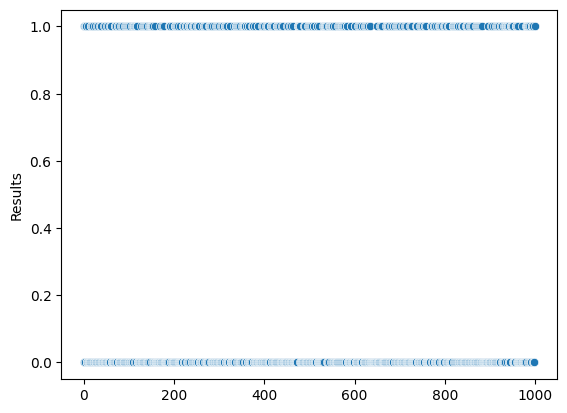

In [14]:
sns.scatterplot(df['Results'])